In [1]:
import numpy as np
import pandas as pd
import os
import re
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from itertools import product, combinations
from scipy.stats import spearmanr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import HuberRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import minimize
from numpy.random import rand
from tensorflow.keras.models import load_model
from os.path import exists

2024-04-28 00:44:37.682612: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
file_path = 'Nidf.csv'
df = pd.read_csv(file_path)

In [3]:
df

Density  Young's Modulus  Yield Strength  Tensile Strength  \
0     8.4400         0.209804       -0.841745         -0.500279   
1     8.1900        -2.574842       -0.494314         -1.497171   
2     8.4400         0.209804        1.031898          0.892439   
3     8.2000        -0.227003        1.875657          1.584399   
4     8.9000         0.046001       -1.032831         -0.940084   
..       ...              ...             ...               ...   
155   8.4326         0.307867       -0.586954         -0.261259   
156   8.4326         0.307867       -0.586954         -0.261259   
157   8.4505         0.209804       -0.611758         -0.385753   
158   8.4326         0.307867       -0.586954         -0.261259   
159   8.4326         0.307867       -0.499972         -0.205638   

     Specific Heat  Coefficient of Thermal Expansion  Aluminum, Al  Carbon, C  \
0        -0.714763                          0.267663        0.4000      0.100   
1         1.698169                          0.527369        1.6000      0.020   
2        -0.714763                         -0.596916        0.4000      0.100   
3         0.670069                         -0.598240        0.8000      0.080   
4         0.116136                         -2.849458        0.0000      0.004   
..             ...                               ...           ...        ...   
155      -0.686734                          0.722298        0.5747      0.068   
156      -0.686734                          0.722298        0.5747      0.068   
157      -0.714763                         -0.598240        0.4880      0.076   
158      -0.686734                          0.722298        0.5747      0.068   
159      -0.686734                          0.726006        0.5627      0.068   

     Chromium, Cr  Cobalt, Co  ...  Silicon, Si  Titanium, Ti  Boron, B  \
0           21.00       1.000  ...       0.5000        0.4000     0.000   
1           18.00      12.000  ...       0.7500        2.7500     0.003   
2           21.00       1.000  ...       0.5000        0.4000     0.000   
3           17.00       1.000  ...       0.3500        0.6500     0.006   
4           15.50       0.100  ...       0.0300        0.0000     0.000   
..            ...         ...  ...          ...           ...       ...   
155         13.42       0.859  ...       0.4096        0.4495     0.000   
156         13.42       0.859  ...       0.4096        0.4495     0.000   
157         12.71       0.849  ...       0.3943        0.4265     0.000   
158         13.42       0.859  ...       0.4096        0.4495     0.000   
159         13.42       0.859  ...       0.4096        0.4495     0.000   

     Copper, Cu  Phosphorus, P  Sulfur, S  Zirconium, Zr  Tungsten, W  \
0        0.0000        0.00000    0.00000           0.00          0.0   
1        0.5000        0.03000    0.03000           0.02          0.0   
2        0.0000        0.00000    0.00000           0.00          0.0   
3        0.3000        0.01500    0.01500           0.00          0.0   
4        0.0000        0.00500    0.00200           0.00          3.5   
..          ...            ...        ...            ...          ...   
155      0.0534        0.00315    0.00305           0.00          0.0   
156      0.0534        0.00315    0.00305           0.00          0.0   
157      0.0442        0.00320    0.00244           0.00          0.0   
158      0.0534        0.00315    0.00305           0.00          0.0   
159      0.0554        0.00315    0.00305           0.00          0.0   

     Vanadium, V  Beryllium, Be  
0           0.00            0.0  
1           0.00            0.0  
2           0.00            0.0  
3           0.00            0.0  
4           0.15            0.0  
..           ...            ...  
155         0.00            0.0  
156         0.00            0.0  
157         0.00            0.0  
158         0.00            0.0  
159         0.00            0.0  

[160 rows x 25 columns]

In [4]:
def extract_numeric(value):
    if pd.isna(value):
        return None
    # Ensure the input is treated as a string
    value = str(value)
    numeric_part = re.findall(r"[\d\.]+", value)
    return float(numeric_part[0]) if numeric_part else None

## Youngs Modulus

### Data Preperation

In [5]:
# Assuming df1 is your DataFrame and it contains the columns 'Young's Modulus' and 'Density'
df['Young\'s Modulus'] = df['Young\'s Modulus'].apply(extract_numeric)
df['Density'] = df['Density'].apply(extract_numeric)

# List all columns to keep (metal percentages and Young's modulus)
columns_to_keep = ['Young\'s Modulus'] + [col for col in df.columns if ',' in col]

# Create a new dataframe with only these columns
metals_and_modulus = df[columns_to_keep]

# Check for missing values in the new dataset
missing_values_metals = metals_and_modulus.isnull().sum()
missing_values_metals[missing_values_metals > 0], metals_and_modulus.head()

(Series([], dtype: int64),
    Young's Modulus  Aluminum, Al  Carbon, C  Chromium, Cr  Cobalt, Co  \
 0         0.209804           0.4      0.100          21.0         1.0   
 1         2.574842           1.6      0.020          18.0        12.0   
 2         0.209804           0.4      0.100          21.0         1.0   
 3         0.227003           0.8      0.080          17.0         1.0   
 4         0.046001           0.0      0.004          15.5         0.1   
 
    Iron, Fe  Manganese, Mn  Molybdenum, Mo  Nickel, Ni  \
 0       5.0           0.50             9.0        62.0   
 1       2.0           1.00             3.5        51.6   
 2       5.0           0.50             9.0        62.0   
 3      17.0           0.35             2.8        50.0   
 4       6.0           0.15            16.0        59.0   
 
    Niobium, Nb (Columbium, Cb)  Silicon, Si  Titanium, Ti  Boron, B  \
 0                         3.70         0.50          0.40     0.000   
 1                         

In [6]:
# Splitting the dataset into features and target variable
X = metals_and_modulus.drop("Young's Modulus", axis=1)
y = metals_and_modulus["Young's Modulus"]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head(), y_train.head()

(     Aluminum, Al  Carbon, C  Chromium, Cr  Cobalt, Co  Iron, Fe  \
 60            0.0      0.025          19.0        33.0       1.0   
 115           0.8      0.080          17.0         1.0      17.0   
 2             0.4      0.100          21.0         1.0       5.0   
 123           0.4      0.100          21.0         1.0       5.0   
 45            0.4      0.100          21.0         1.0       5.0   
 
      Manganese, Mn  Molybdenum, Mo  Nickel, Ni  Niobium, Nb (Columbium, Cb)  \
 60            0.15             9.0        33.0                         0.00   
 115           0.35             2.8        50.0                         4.75   
 2             0.50             9.0        62.0                         3.70   
 123           0.50             9.0        62.0                         3.70   
 45            0.50             9.0        62.0                         3.70   
 
      Silicon, Si  Titanium, Ti  Boron, B  Copper, Cu  Phosphorus, P  \
 60          0.15          1.0

### Feature Selection

#### Random Forest Feature Importance

In [7]:
def train_and_evaluate_simple_rf(X_train, y_train, X_test, y_test, output_dir, feature_name, metal="Nickel"):
    """
    Trains a Random Forest regressor, evaluates it, plots feature importances,
    and generates a LaTeX figure caption, with the ability to specify the target feature name.

    Parameters:
        X_train (DataFrame): Training data features.
        y_train (Series): Training data target.
        X_test (DataFrame): Test data features.
        y_test (Series): Test data target.
        output_dir (str): Directory to save output files.
        feature_name (str): The name of the target feature to use in titles and labels.
    """
    # Ensure the output directory exists
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Initialize the Random Forest Regressor
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

    # Train the model
    rf_model.fit(X_train, y_train)

    # Predict on the test set
    rf_predictions = rf_model.predict(X_test)

    # Calculate the mean squared error
    rf_mse = mean_squared_error(y_test, rf_predictions)

    # Get feature importances from the Random Forest model
    rf_feature_importances = rf_model.feature_importances_

    # Create a DataFrame for better visualization of feature importances
    features_importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': rf_feature_importances
    }).sort_values(by='Importance', ascending=False)

    # Plot feature importances
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=features_importance_df, color='blue')
    plt.title(f'Feature Importances in Predicting {feature_name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plot_path = os.path.join(output_dir, f'{metal}_{feature_name.replace(" ", "_")}_RandomForestFeatureImportance.png')
    plt.savefig(plot_path)
    plt.show()

    # LaTeX code for the figure
    latex_code = rf"""
    \begin{{figure}}[h]
        \centering
        \includegraphics[width=0.8\textwidth]{{{plot_path}}}
        \caption{{Random Forest Feature Importance for predicting {feature_name}}}
        \label{{fig:{metal}_{feature_name.replace(" ", "_")}_RandomForestFeatureImportance}}
    \end{{figure}}
    """
    latex_file_path = os.path.join(output_dir, f'{metal}_{feature_name.replace(" ", "_")}_RandomForestFeatureImportance.tex')
    with open(latex_file_path, 'w') as f:
        f.write(latex_code)

    return rf_mse, features_importance_df

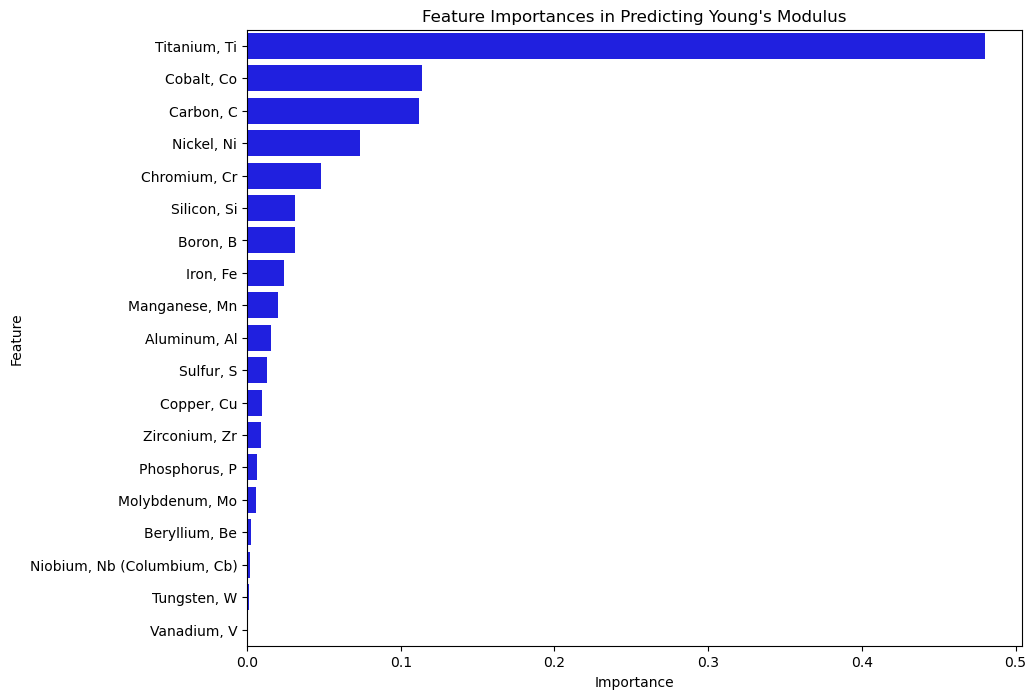

(0.1978275703450924,
                         Feature  Importance
 10                 Titanium, Ti    0.480229
 3                    Cobalt, Co    0.113891
 1                     Carbon, C    0.112144
 7                    Nickel, Ni    0.073747
 2                  Chromium, Cr    0.047961
 9                   Silicon, Si    0.031382
 11                     Boron, B    0.031036
 4                      Iron, Fe    0.024363
 5                 Manganese, Mn    0.019960
 0                  Aluminum, Al    0.015883
 14                    Sulfur, S    0.012957
 12                   Copper, Cu    0.009530
 15                Zirconium, Zr    0.009109
 13                Phosphorus, P    0.006248
 6                Molybdenum, Mo    0.005787
 18                Beryllium, Be    0.002508
 8   Niobium, Nb (Columbium, Cb)    0.002004
 16                  Tungsten, W    0.001258
 17                  Vanadium, V    0.000001)

In [8]:
output_dir = "Images/Nickel/Young Modulus"
train_and_evaluate_simple_rf(X_train, y_train, X_test, y_test, output_dir, "Young's Modulus")

#### Combination Neural Network Feature Combination Importance

In [9]:
def needs_analysis(filename, expected_combinations):
    if os.path.exists(filename):
        existing_df = pd.read_csv(filename)
        existing_combos = set(tuple(row) for row in existing_df['Combination'].apply(eval))
        # Convert expected_combinations to a set
        expected_combos_set = set(expected_combinations)
        if existing_combos >= expected_combos_set:
            print("All combinations have already been evaluated.")
            return False
    return True

In [10]:
def process2VariableMLP(data, top_features, fixed_feature, modulus_feature, file_path, plot_dir, metal="Nickel"):
    """
    Processes alloy data to train a neural network model and visualize the results.
    
    Parameters:
    - data (DataFrame): The dataset containing alloy compositions.
    - top_features (list): List of the alloy elements to consider in combinations.
    - fixed_feature (str): The fixed feature in all combinations.
    - modulus_feature (str): The name of the column for Young's modulus.
    - file_path (str): Path to save or load the MSE results.
    - plot_dir (str): Directory to save plots and LaTeX files.
    """
    # Extract features and target based on provided column names
    X = data[top_features + [fixed_feature]]
    y = data[modulus_feature]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    if os.path.exists(file_path):
        print("Loading existing results...")
        results_df = pd.read_csv(file_path)
        results_df['Combination'] = results_df['Combination'].apply(ast.literal_eval)
        best_combination = results_df.loc[results_df['MSE'].idxmin(), 'Combination']
    else:
        print("Processing new combinations...")
        mse_scores = {}
        full_combinations = [combo + (fixed_feature,) for combo in combinations(top_features, 1)]
        for combo in full_combinations:
            print(f'Processing combination: {combo}')
            X_train_sub = X_train[list(combo)]
            X_test_sub = X_test[list(combo)]

            # Define and compile the neural network
            nn_model = Sequential([
                Dense(3, input_dim=len(combo), activation='relu'),
                Dense(3, activation='relu'),
                Dense(3, activation='relu'),
                Dense(1)
            ])
            nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
            nn_model.fit(X_train_sub, y_train, epochs=200, batch_size=10, verbose=0, validation_split=0.2)
            mse = nn_model.evaluate(X_test_sub, y_test, verbose=0)
            mse_scores[combo] = mse

        results_df = pd.DataFrame(list(mse_scores.items()), columns=['Combination', 'MSE'])
        results_df.to_csv(file_path, index=False)
        best_combination = min(mse_scores, key=mse_scores.get)

    # Fit the best combination model for visualization
    nn_model = Sequential([
        Dense(3, input_dim=len(best_combination), activation='relu'),
        Dense(3, activation='relu'),
        Dense(3, activation='relu'),
        Dense(1)
    ])
    nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    nn_model.fit(X_train[list(best_combination)], y_train, epochs=200, batch_size=10, verbose=0, validation_split=0.2)
    y_pred = nn_model.predict(X_test[list(best_combination)]).flatten()

    # Visualization
    element_name = ', '.join(best_combination)
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', marker='o', alpha=0.5, label='Predicted Values')  # Predicted values as blue circles
    plt.scatter(y_test, y_test, color='red', marker='x', label='Actual Values')  # Actual values as red x's
    plt.title(f"Actual vs. Predicted {modulus_feature} Values (2 Variables - {element_name})")
    plt.xlabel(f"Actual {modulus_feature}")
    plt.ylabel(f"Predicted {modulus_feature}")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1, label='Ideal Prediction Line')  # Ideal prediction line
    plt.legend()  # Add a legend to clarify the plot symbols

    # Ensure directory exists
    if not os.path.exists(plot_dir):
        os.makedirs(plot_dir)
    
    plot_path = os.path.join(plot_dir, f'{metal}_{modulus_feature.replace(" ", "_")}_2VariableMLP.png')
    plt.savefig(plot_path)
    plt.show()
    fixed_feature
    
    latex_code = rf"""
    \begin{{figure}}[h]
        \centering
        \includegraphics[width=0.8\textwidth]{{{plot_path}}}
        \caption{{2 Variable Simple MLP for predicting {modulus_feature} (Featuring: {element_name})}}
        \label{{fig:{metal}_{modulus_feature.replace(" ", "_")}_2VariableMLP}}
    \end{{figure}}
    """

    # Write the LaTeX code to a .tex file
    tex_path = os.path.join(plot_dir, f'{metal}_{modulus_feature.replace(" ", "_")}_2VariableMLP.tex')
    with open(tex_path, 'w') as f:
        f.write(latex_code)

    print(f"Best combination including {fixed_feature}: {best_combination}, MSE: {results_df['MSE'].min()}")
    print(f"Graph and LaTeX file saved with element pair in names: {plot_path} and {tex_path}")

In [11]:
def process3VariableMLP(data, top_features, fixed_feature, modulus_feature, file_path, plot_dir, metal="Nickel"):
    """
    Processes alloy data to train a neural network model and visualize the results.
    
    Parameters:
    - data (DataFrame): The dataset containing alloy compositions.
    - top_features (list): List of the alloy elements to consider in combinations.
    - fixed_feature (str): The fixed feature in all combinations.
    - modulus_feature (str): The name of the column for Young's modulus.
    - file_path (str): Path to save or load the MSE results.
    - plot_dir (str): Directory to save plots and LaTeX files.
    """
    # Extract features and target based on provided column names
    X = data[top_features + [fixed_feature]]
    y = data[modulus_feature]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    if os.path.exists(file_path):
        print("Loading existing results...")
        results_df = pd.read_csv(file_path)
        results_df['Combination'] = results_df['Combination'].apply(ast.literal_eval)
        best_combination = results_df.loc[results_df['MSE'].idxmin(), 'Combination']
    else:
        print("Processing new combinations...")
        mse_scores = {}
        full_combinations = [combo + (fixed_feature,) for combo in combinations(top_features, 2)]
        for combo in full_combinations:
            print(f'Processing combination: {combo}')
            X_train_sub = X_train[list(combo)]
            X_test_sub = X_test[list(combo)]

            # Define and compile the neural network
            nn_model = Sequential([
                Dense(3, input_dim=len(combo), activation='relu'),
                Dense(3, activation='relu'),
                Dense(3, activation='relu'),
                Dense(1)
            ])
            nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
            nn_model.fit(X_train_sub, y_train, epochs=200, batch_size=10, verbose=0, validation_split=0.2)
            mse = nn_model.evaluate(X_test_sub, y_test, verbose=0)
            mse_scores[combo] = mse

        results_df = pd.DataFrame(list(mse_scores.items()), columns=['Combination', 'MSE'])
        results_df.to_csv(file_path, index=False)
        best_combination = min(mse_scores, key=mse_scores.get)

    # Fit the best combination model for visualization
    nn_model = Sequential([
        Dense(3, input_dim=len(best_combination), activation='relu'),
        Dense(3, activation='relu'),
        Dense(3, activation='relu'),
        Dense(1)
    ])
    nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    nn_model.fit(X_train[list(best_combination)], y_train, epochs=200, batch_size=10, verbose=0, validation_split=0.2)
    y_pred = nn_model.predict(X_test[list(best_combination)]).flatten()

    # Visualization
    element_name = ', '.join(best_combination)
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', marker='o', alpha=0.5, label='Predicted Values')  # Predicted values as blue circles
    plt.scatter(y_test, y_test, color='red', marker='x', label='Actual Values')  # Actual values as red x's
    plt.title(f"Actual vs. Predicted {modulus_feature} Values (3 Variables - {element_name})")
    plt.xlabel(f"Actual {modulus_feature}")
    plt.ylabel(f"Predicted {modulus_feature}")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1, label='Ideal Prediction Line')  # Ideal prediction line
    plt.legend()  # Add a legend to clarify the plot symbols

    # Ensure directory exists
    if not os.path.exists(plot_dir):
        os.makedirs(plot_dir)
    
    plot_path = os.path.join(plot_dir, f'{metal}_{modulus_feature.replace(" ", "_")}_3VariableMLP.png')
    plt.savefig(plot_path)
    plt.show()
    fixed_feature
    
    latex_code = rf"""
    \begin{{figure}}[h]
        \centering
        \includegraphics[width=0.8\textwidth]{{{plot_path}}}
        \caption{{3 Variable Simple MLP for predicting {modulus_feature} (Featuring: {element_name})}}
        \label{{fig:{metal}_{modulus_feature.replace(" ", "_")}_3VariableMLP}}
    \end{{figure}}
    """

    # Write the LaTeX code to a .tex file
    tex_path = os.path.join(plot_dir, f'{metal}_{modulus_feature.replace(" ", "_")}_3VariableMLP.tex')
    with open(tex_path, 'w') as f:
        f.write(latex_code)

    print(f"Best combination including {fixed_feature}: {best_combination}, MSE: {results_df['MSE'].min()}")
    print(f"Graph and LaTeX file saved with element pair in names: {plot_path} and {tex_path}")

Loading existing results...
1/1 [==============================] - 0s 167ms/step


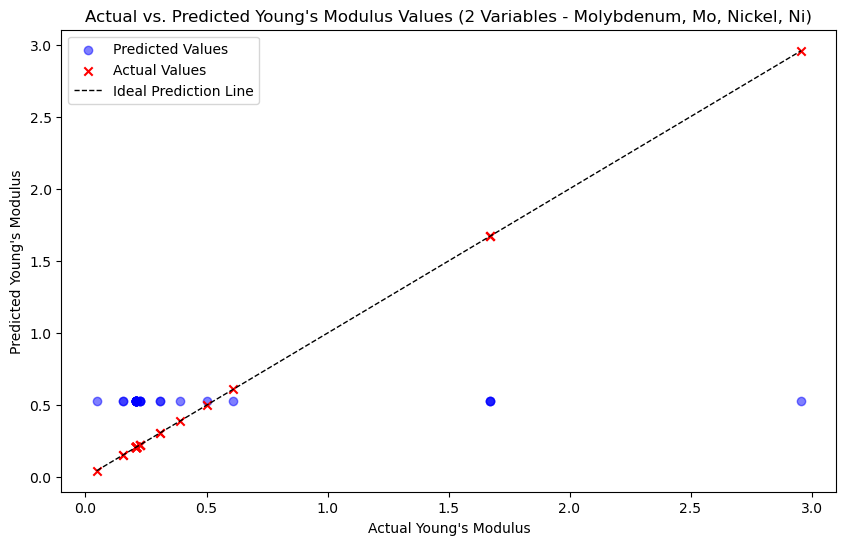

Best combination including Nickel, Ni: ('Molybdenum, Mo', 'Nickel, Ni'), MSE: 0.3389503359794616
Graph and LaTeX file saved with element pair in names: Images/Nickel/Young Modulus/Nickel_Young's_Modulus_2VariableMLP.png and Images/Nickel/Young Modulus/Nickel_Young's_Modulus_2VariableMLP.tex


In [12]:
top_features = ['Silicon, Si', 'Chromium, Cr', 'Aluminum, Al', 'Beryllium, Be', 'Molybdenum, Mo', 'Niobium, Nb (Columbium, Cb)', 
                'Iron, Fe', 'Boron, B', 'Manganese, Mn', 'Carbon, C', 'Cobalt, Co', 'Titanium, Ti', 'Copper, Cu', 'Phosphorus, P', 
                'Zirconium, Zr', 'Vanadium, V', 'Sulfur, S', 'Tungsten, W']
fixed_feature = 'Nickel, Ni'
file_path = 'Ni_model_data/mse_scores_with_nickel_2_features_modulus.csv'
plotdir = 'Images/Nickel/Young Modulus'
process2VariableMLP(metals_and_modulus, top_features, fixed_feature, "Young's Modulus", file_path, plotdir)

Loading existing results...
1/1 [==============================] - 0s 138ms/step


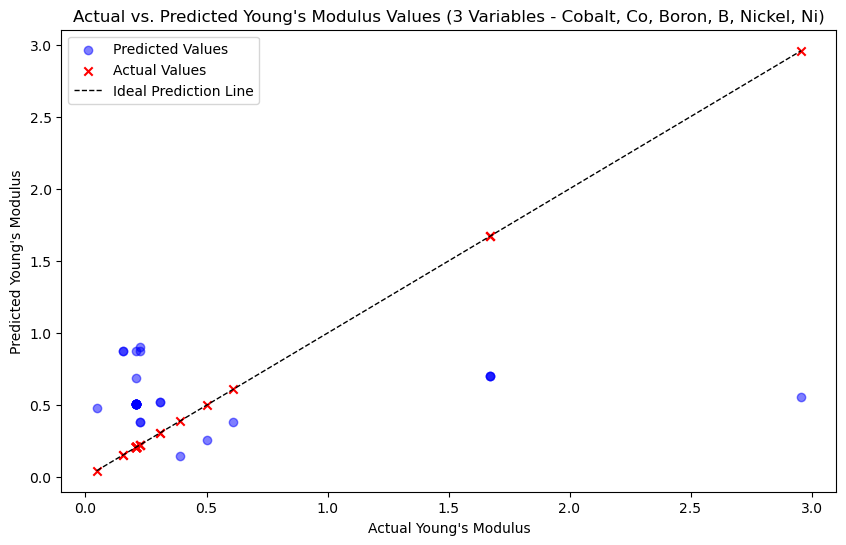

Best combination including Nickel, Ni: ('Cobalt, Co', 'Boron, B', 'Nickel, Ni'), MSE: 0.1040388643741607
Graph and LaTeX file saved with element pair in names: Images/Nickel/Young Modulus/Nickel_Young's_Modulus_3VariableMLP.png and Images/Nickel/Young Modulus/Nickel_Young's_Modulus_3VariableMLP.tex


In [13]:
top_features = ['Titanium, Ti', 'Carbon, C', 'Cobalt, Co', 'Chromium, Cr', 'Silicon, Si', 'Iron, Fe', 'Manganese, Mn', 'Boron, B', 'Aluminum, Al']
fixed_feature = 'Nickel, Ni'
file_path = 'Ni_model_data/mse_scores_with_nickel_3_features_modulus.csv'
plotdir = 'Images/Nickel/Young Modulus'
process3VariableMLP(metals_and_modulus, top_features, fixed_feature, "Young's Modulus", file_path, plotdir)

#### Correlation Matrix 

In [14]:
def visualize_correlation(data, target_feature, output_dir, metal="Nickel"):
    """
    Calculates the correlation matrix for a given dataset and target feature, 
    visualizes the correlation, and generates a LaTeX document for the plot.

    Parameters:
        data (DataFrame): The dataset containing the features and target.
        target_feature (str): The target feature for which to calculate correlations.
        metal (str): The specific metal or alloy being analyzed, used for file naming.
        output_dir (str): The directory to save the plot and LaTeX file.
    """
    # Calculate the correlation matrix
    corr_matrix = data.corr()

    # Isolate the correlation of the target feature with other features
    target_corr = corr_matrix[target_feature].drop(target_feature).sort_values(ascending=False)

    # Ensure the output directory exists
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Visualization
    plt.figure(figsize=(10, 8))
    sns.barplot(x=target_corr.index, y=target_corr.values)
    plt.xticks(rotation=90)
    plt.title(f"Correlation with {target_feature}")
    plt.ylabel("Correlation Coefficient")
    plot_path = os.path.join(output_dir, f'{metal}_{target_feature.replace(" ", "_")}_CorrelationMatrix.png')
    plt.savefig(plot_path)
    plt.show()

    # LaTeX code for the figure
    latex_code = rf"""
    \begin{{figure}}[h]
        \centering
        \includegraphics[width=0.8\textwidth]{{{plot_path}}}
        \caption{{Correlation Matrix of {metal} based alloys predicting the {target_feature}}}
        \label{{fig:{metal}_{target_feature.replace(" ", "_")}_CorrelationMatrix}}
    \end{{figure}}
    """
    latex_file_path = os.path.join(output_dir, f'{metal}_{target_feature.replace(" ", "_")}_CorrelationMatrix.tex')
    with open(latex_file_path, 'w') as f:
        f.write(latex_code)

    return target_corr

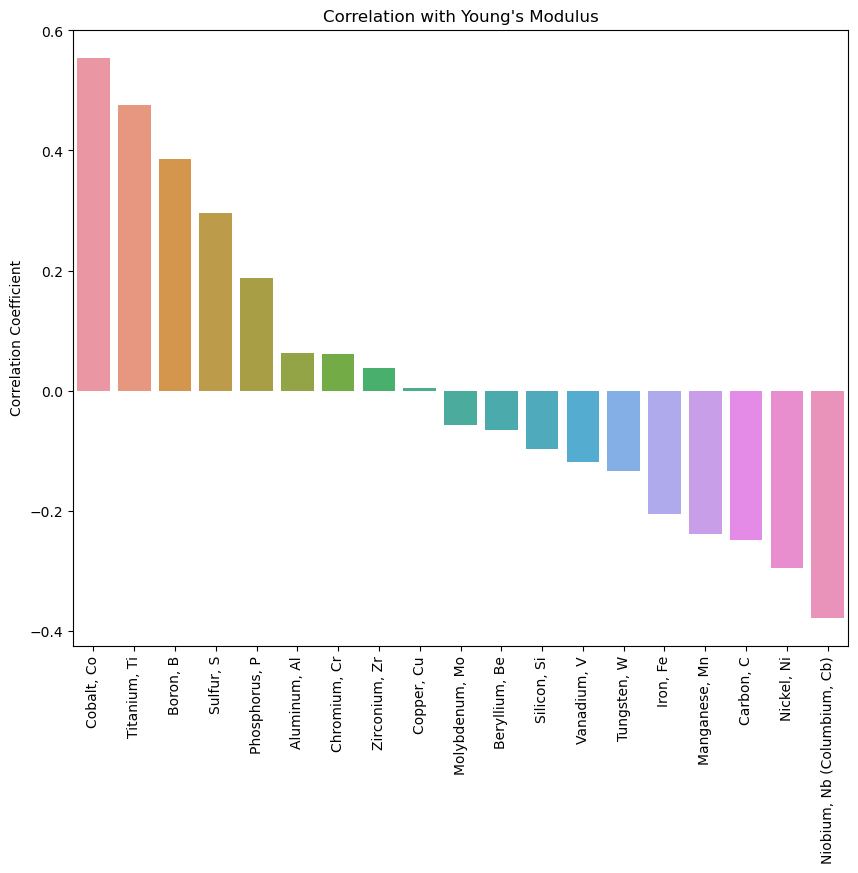

Cobalt, Co                     0.554664
Titanium, Ti                   0.475129
Boron, B                       0.385828
Sulfur, S                      0.295718
Phosphorus, P                  0.187926
Aluminum, Al                   0.062930
Chromium, Cr                   0.061079
Zirconium, Zr                  0.038307
Copper, Cu                     0.003900
Molybdenum, Mo                -0.057519
Beryllium, Be                 -0.065216
Silicon, Si                   -0.097644
Vanadium, V                   -0.118975
Tungsten, W                   -0.133226
Iron, Fe                      -0.205086
Manganese, Mn                 -0.237859
Carbon, C                     -0.247832
Nickel, Ni                    -0.295653
Niobium, Nb (Columbium, Cb)   -0.377524
Name: Young's Modulus, dtype: float64

In [15]:
target_feature = "Young's Modulus"
output_dir = "Images/Nickel/Young Modulus"
visualize_correlation(metals_and_modulus, target_feature, output_dir)

#### Regression

In [16]:
def evaluate_feature(data, feature, target, degree):
    """Evaluate and return a statsmodels regression model."""
    poly = PolynomialFeatures(degree)
    X = data[[feature]].values
    X_poly = poly.fit_transform(X)
    X_poly = sm.add_constant(X_poly)
    y = data[target]
    return sm.OLS(y, X_poly).fit()

def determine_better_model(linear_model, poly_model):
    """Return the better model based on AIC comparison."""
    if linear_model.aic < poly_model.aic:
        return linear_model, 'Linear'
    return poly_model, 'Polynomial'

Positive coefficients indicate an increase in Young's Modulus with an increase in the metal's concentration.

Negative coefficients suggest a decrease in Young's Modulus as the metal's concentration increases.

In [17]:
def evaluate_and_visualize_impact(data, metals, target_feature, plot_dir, threshold=0.1, main_metal="Nickel"):
    """
    Evaluates the impact of different metals on a target feature, visualizes
    regression models, and generates a LaTeX figure documentation.

    Parameters:
        data (DataFrame): Dataset containing alloy compositions and target feature.
        metals (list): List of metals to consider.
        target_feature (str): Target feature for regression.
        plot_dir (str): Directory to save plots and LaTeX file.
        threshold (float): Minimum content threshold to consider a metal for evaluation.
    """
    models = {}
    linear_vs_poly = {}
    impact_summary = pd.DataFrame(columns=['Metal', 'Coefficient', 'Effect'])

    for metal in metals:
        if data[metal].max() < threshold:
            continue
        
        # Decide on the model type based on metal content
        if data[metal].max() <= 1:
            model = evaluate_feature(data, metal, target_feature, 1)
            linear_vs_poly[metal] = 'Linear'
        else:
            linear_model = evaluate_feature(data, metal, target_feature, 1)
            poly_model = evaluate_feature(data, metal, target_feature, 2)
            model = linear_model if linear_model.aic < poly_model.aic else poly_model
            linear_vs_poly[metal] = 'Linear' if model is linear_model else 'Polynomial'
        
        models[metal] = model
        coeff = model.params[1 if linear_vs_poly[metal] == 'Linear' else 2]
        effect = 'Increases' if coeff > 0 else 'Decreases'
        new_row = pd.DataFrame({'Metal': [metal], 'Coefficient': [coeff], 'Effect': [effect]})
        impact_summary = pd.concat([impact_summary, new_row], ignore_index=True)

    # Visualization
    num_cols = 3
    num_rows = (len(models) + num_cols - 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 4))
    axes = axes.flatten()
    
    for idx, metal in enumerate(models):
        ax = axes[idx]
        model = models[metal]
        X = np.linspace(data[metal].min(), data[metal].max(), 100).reshape(-1, 1)
        preds = model.predict(sm.add_constant(PolynomialFeatures(1 if linear_vs_poly[metal] == 'Linear' else 2).fit_transform(X)))
        ax.plot(X.flatten(), preds, label=f'{metal} {linear_vs_poly[metal]} Regression', color=plt.cm.viridis(np.linspace(0, 1, len(models)))[idx])
        ax.scatter(data[metal], data[target_feature], color='gray', alpha=0.5)
        ax.set(title=f'{metal} - {linear_vs_poly[metal]}', xlabel='Metal Content', ylabel=target_feature)
        ax.legend()

    for i in range(idx + 1, len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plot_path = os.path.join(plot_dir, f'{main_metal}_{target_feature.replace(" ", "_")}_IndividualElementRegression.png')
    plt.savefig(plot_path)
    plt.show()

    # LaTeX documentation
    latex_code = rf"""
    \begin{{figure}}[h]
        \centering
        \includegraphics[width=0.8\textwidth]{{{plot_path}}}
        \caption{{Individual Element Regression of {metal} based alloys predicting the {target_feature}}}
        \label{{fig:{main_metal}_{target_feature.replace(" ", "_")}IndividualElementRegression}}
    \end{{figure}}
    """
    tex_path = os.path.join(plot_dir, f'{main_metal}_{target_feature.replace(" ", "_")}_IndividualElementRegression.tex')
    with open(tex_path, 'w') as f:
        f.write(latex_code)

    return impact_summary, plot_path

# Helper function to evaluate the feature with linear or polynomial regression
def evaluate_feature(data, feature, target, degree):
    X = data[[feature]]
    y = data[target]
    X_poly = PolynomialFeatures(degree=degree).fit_transform(X)
    model = sm.OLS(y, sm.add_constant(X_poly)).fit()
    return model

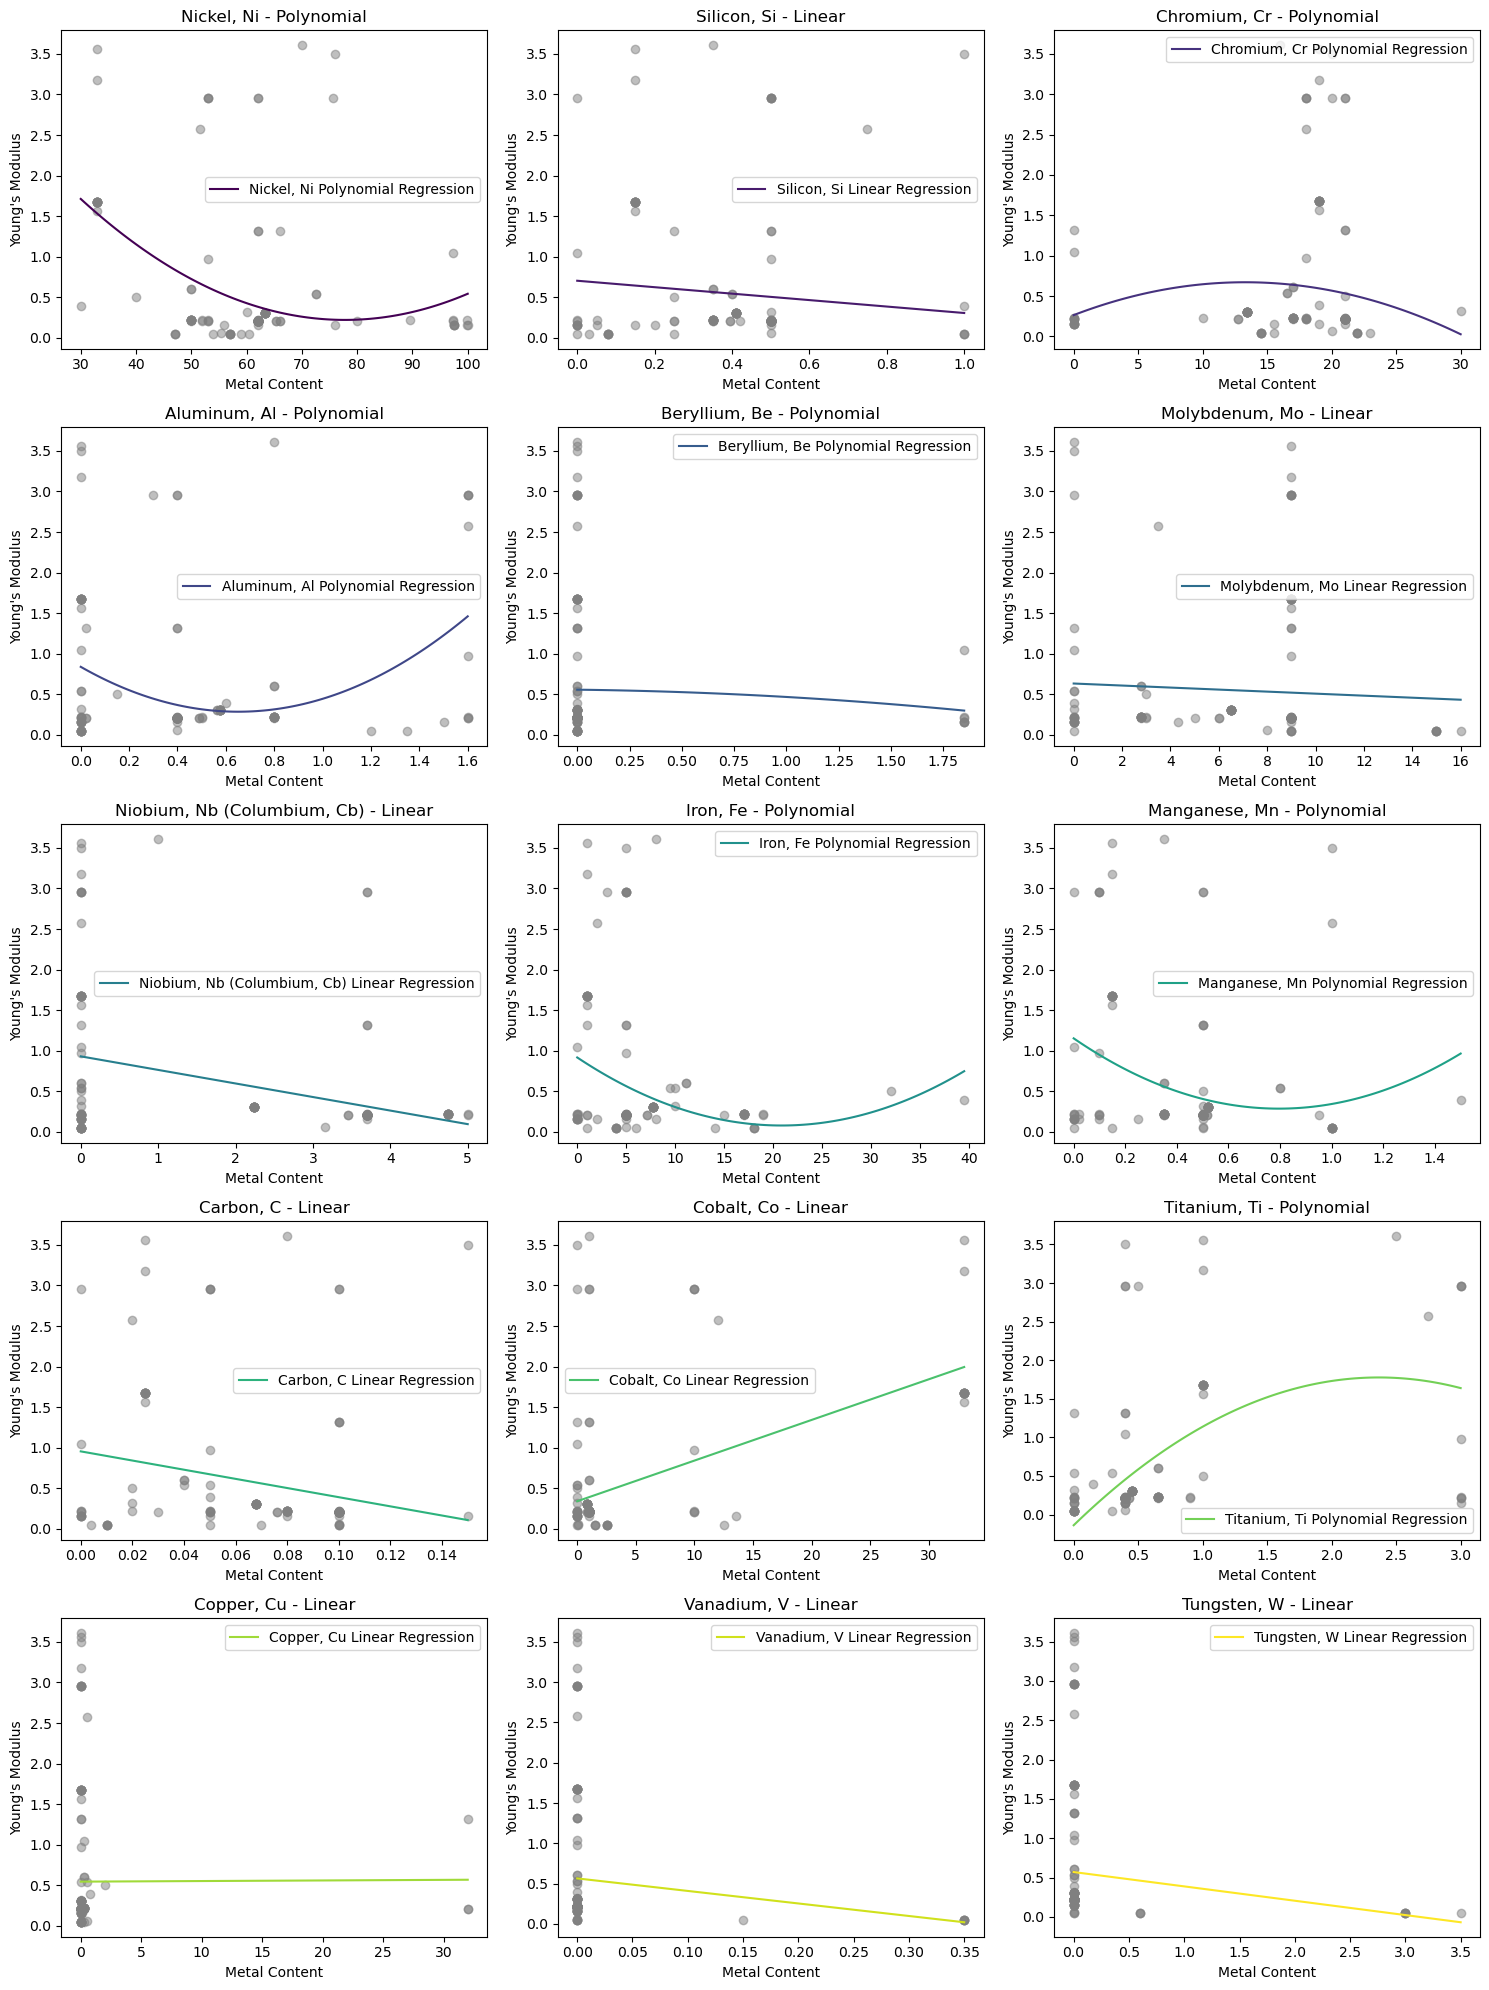

(                          Metal  Coefficient     Effect
 0                    Nickel, Ni     0.000653  Increases
 1                   Silicon, Si    -0.397475  Decreases
 2                  Chromium, Cr    -0.002306  Decreases
 3                  Aluminum, Al     1.304850  Increases
 4                 Beryllium, Be    -0.058259  Decreases
 5                Molybdenum, Mo    -0.012482  Decreases
 6   Niobium, Nb (Columbium, Cb)    -0.167040  Decreases
 7                      Iron, Fe     0.001926  Increases
 8                 Manganese, Mn     1.367881  Increases
 9                     Carbon, C    -5.643595  Decreases
 10                   Cobalt, Co     0.050122  Increases
 11                 Titanium, Ti    -0.342369  Decreases
 12                   Copper, Cu     0.000727  Increases
 13                  Vanadium, V    -1.553959  Decreases
 14                  Tungsten, W    -0.182375  Decreases,
 "Images/Nickel/Young Modulus/Nickel_Young's_Modulus_IndividualElementRegression.png")

In [18]:
metals = ['Nickel, Ni', 'Silicon, Si', 'Chromium, Cr', 'Aluminum, Al', 'Beryllium, Be', 'Molybdenum, Mo', 'Niobium, Nb (Columbium, Cb)', 
            'Iron, Fe', 'Boron, B', 'Manganese, Mn', 'Carbon, C', 'Cobalt, Co', 'Titanium, Ti', 'Copper, Cu', 'Phosphorus, P', 
            'Zirconium, Zr', 'Vanadium, V', 'Sulfur, S', 'Tungsten, W']
target_feature = "Young's Modulus"
plot_dir = "Images/Nickel/Young Modulus"
evaluate_and_visualize_impact(metals_and_modulus, metals, target_feature, plot_dir)

In [19]:
## Splitting the DataFrame into positive and negative subsets
#positive_df = impact_summary[impact_summary['Coefficient'] > 0].copy()
#negative_df = impact_summary[impact_summary['Coefficient'] < 0].copy()
#
## Sorting each subset
#positive_df.sort_values(by='Coefficient', ascending=False, inplace=True)
#negative_df.sort_values(by='Coefficient', ascending=False, inplace=True)  # Sort negatives in descending order by value
#
## Concatenating back into a single DataFrame
#sorted_impact_summary = pd.concat([positive_df, negative_df], axis=0)
#
## Define colors based on coefficient sign and set edge colors for better visibility
#colors = ['green' if x > 0 else 'red' for x in sorted_impact_summary['Coefficient']]
#edge_colors = ['darkgreen' if x > 0 else 'darkred' for x in sorted_impact_summary['Coefficient']]
#
## Set up the plot
#plt.figure(figsize=(10, 8))
#bars = plt.barh(sorted_impact_summary['Metal'], sorted_impact_summary['Coefficient'], color=colors, edgecolor=edge_colors)
#plt.xlabel('Coefficient Value')
#plt.title('Impact of Each Metal on Young\'s Modulus')
#
## Invert y-axis to have the largest impact at the top
#plt.gca().invert_yaxis()
#
## Add text labels to bars for exact coefficient values
#for bar, value in zip(bars, sorted_impact_summary['Coefficient']):
#    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{value:.2f}', va='center', 
#             ha='right' if value < 0 else 'left')
#
## Show the plot
#plt.show()
#
## Optionally, print the DataFrame for a tabular view
#print(sorted_impact_summary[['Metal', 'Coefficient', 'Effect']])

### <span style="color:lime">Optimizing Youngs Modulus</span>

#### <span style="color:red">Random Forest</span>

In [20]:
def analyze_alloy_strength(data, features, target, al_min=75, al_max=100):
    """
    Analyzes alloy data to find the composition with the highest predicted Young's Modulus,
    focusing on a specified range of Aluminum content.

    Parameters:
        data (DataFrame): The dataset containing alloy compositions.
        features (list): List of feature columns to consider.
        target (str): Target feature column name (Young's Modulus).
        al_min (float): Minimum Aluminum content percentage to filter data.
        al_max (float): Maximum Aluminum content percentage to filter data.

    Returns:
        dict: A dictionary containing MSE, RMSE, maximum Young's Modulus, and the composition of the alloy with the highest modulus.
    """
    # Filter data based on Aluminum content
    filtered_data = data[(data['Nickel, Ni'] >= al_min) & (data['Nickel, Ni'] <= al_max)]

    # Split data into training and testing sets
    X = filtered_data[features]
    y = filtered_data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the Random Forest Regressor
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Predict the Young's Modulus on the test set
    y_pred = rf_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5

    # Find the index and value of the maximum predicted Young's Modulus
    max_index = y_pred.argmax()
    max_youngs_modulus = y_pred[max_index]
    strongest_composition = X_test.iloc[max_index]

    return {
        'mse': mse,
        'rmse': rmse,
        'max_youngs_modulus': max_youngs_modulus,
        'strongest_composition': strongest_composition,
        'model': rf_model
    }

In [21]:
selected_features = ['Nickel, Ni', 'Titanium, Ti', 'Carbon, C', 'Cobalt, Co', 'Chromium, Cr', 'Silicon, Si', 'Iron, Fe', 'Manganese, Mn', 'Boron, B', 'Aluminum, Al']
target_variable = 'Young\'s Modulus'
results = analyze_alloy_strength(metals_and_modulus, selected_features, target_variable)
print(results)

{'mse': 0.06221525587905464, 'rmse': 0.24942986164261616, 'max_youngs_modulus': 0.6404168235581414, 'strongest_composition': Nickel, Ni       97.3
Titanium, Ti      0.4
Carbon, C         0.0
Cobalt, Co        0.0
Chromium, Cr      0.0
Silicon, Si       0.0
Iron, Fe          0.0
Manganese, Mn     0.0
Boron, B          0.0
Aluminum, Al      0.0
Name: 128, dtype: float64, 'model': RandomForestRegressor(random_state=42)}


In [22]:
model = results['model']

In [23]:
def generate_and_predict_alloy_strength(model, output_file_path, metals, al_increments, other_increments, target_variable, metal='Nickel, Ni'):
    """
    Generates hypothetical alloy compositions and predicts their specified property using a pre-trained model.
    
    Parameters:
        model (RandomForestRegressor): A pre-trained Random Forest model.
        output_file_path (str): Path to the output CSV file.
        metals (list): List of metals other than Aluminum to include in the combinations.
        al_increments (np.array): Array of percentage increments for Aluminum.
        other_increments (np.array): Array of possible percentage values for other metals.
        target_variable (str): The property to predict, e.g., 'Young's Modulus'.
        metal (str): The primary metal, default 'Nickel, Ni'.
        
    Returns:
        DataFrame: The top 10 combinations with the highest predicted value of the specified property.
    """
    if exists(output_file_path):
        # Load existing results from file
        hypothetical_results = pd.read_csv(output_file_path)
        print("Loaded results from existing file.")
    else:
        # Generate all valid combinations where the total percentage is 100
        valid_combinations = []
        for al_percent in al_increments:
            for combo in product(other_increments, repeat=len(metals)):
                if sum(combo) == (100 - al_percent):  # Ensure the total sum with Aluminum is 100%
                    valid_combinations.append((al_percent,) + combo)
        
        # Convert the list of combinations into a DataFrame
        hypothetical_metals_df = pd.DataFrame(valid_combinations, columns=[metal] + metals)
        
        # Predict the specified property for these hypothetical alloys
        hypothetical_youngs_modulus = model.predict(hypothetical_metals_df)
        
        # Combining the compositions and their predicted property
        hypothetical_results = hypothetical_metals_df.copy()
        hypothetical_results[target_variable] = hypothetical_youngs_modulus
        
        # Save all combinations and their predicted property to a CSV file
        hypothetical_results.to_csv(output_file_path, index=False)
        print("Predictions performed and results saved.")

    # Find the top 10 combinations with the highest predicted property value
    print(hypothetical_results)
    top_10_modulus_combinations = hypothetical_results.nlargest(10, target_variable)
    
    return top_10_modulus_combinations

In [24]:
output_path = "Ni_model_data/all_hypothetical_combinations_with_predictions_nickel_modulus.csv"
metals = ['Titanium, Ti', 'Carbon, C', 'Cobalt, Co', 'Chromium, Cr', 'Silicon, Si', 'Iron, Fe', 'Manganese, Mn', 'Boron, B', 'Aluminum, Al']
al_increments = np.arange(75, 101, 5)
other_increments = np.arange(0, 26, 5)

top_combinations = generate_and_predict_alloy_strength(model, output_path, metals, al_increments, other_increments, 'Young\'s Modulus')
print("Top 10 Young's Modulus Combinations:")
print(top_combinations.head(10))  # Print only the top 10

Loaded results from existing file.
      Nickel, Ni  Titanium, Ti  Carbon, C  Cobalt, Co  Chromium, Cr  \
0             75             0          0           0             0   
1             75             0          0           0             0   
2             75             0          0           0             0   
3             75             0          0           0             0   
4             75             0          0           0             0   
...          ...           ...        ...         ...           ...   
1997          95             0          0           0             5   
1998          95             0          0           5             0   
1999          95             0          5           0             0   
2000          95             5          0           0             0   
2001         100             0          0           0             0   

      Silicon, Si  Iron, Fe  Manganese, Mn  Boron, B  Aluminum, Al  \
0               0         0              0

#### <span style="color:red">MLP</span>

In [25]:
def perform_grid_search_nn(data, features, target, layer_configurations, max_iter_options, results_csv_path):
    """
    Performs a grid search to find the best MLPRegressor configuration.
    
    Parameters:
        data (DataFrame): The dataset containing all relevant data.
        features (list): List of feature column names.
        target (str): Name of the target variable.
        layer_configurations (list of tuples): Hidden layer configurations.
        max_iter_options (list of int): Maximum iteration options.
        results_csv_path (str): Path to save the grid search results.
        
    Returns:
        dict: Contains DataFrame of results and train/test splits.
    """
    X = data[features]
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    if os.path.exists(results_csv_path):
        results_df = pd.read_csv(results_csv_path)
        print("Loaded existing results from file.")
    else:
        results = []
        best_mse = float('inf')
        best_configuration = None

        for layers in layer_configurations:
            for max_iter in max_iter_options:
                nn_model = MLPRegressor(hidden_layer_sizes=layers, activation='relu', solver='adam', max_iter=max_iter)
                bagging_model = BaggingRegressor(nn_model, n_estimators=10, random_state=42)
                bagging_model.fit(X_train, y_train)

                y_pred = bagging_model.predict(X_test)
                mse = mean_squared_error(y_test, y_pred)
                results.append({'Layers': layers, 'Max_iter': max_iter, 'MSE': mse})

                if mse < best_mse:
                    best_mse = mse
                    best_configuration = (layers, max_iter)

                print(f"Configuration: Layers={layers}, Max_iter={max_iter}, MSE={mse}")

        results_df = pd.DataFrame(results)
        results_df.to_csv(results_csv_path, index=False)
        print("Grid search results saved to:", results_csv_path)
        print(f"Best Configuration: Layers={best_configuration[0]}, Max_iter={best_configuration[1]}, Best MSE={best_mse}")

    return {
        "results_df": results_df,
        "X_train": X_train,
        "X_test": X_test,
        "y_train": y_train,
        "y_test": y_test
    }

In [26]:
selected_features = ['Nickel, Ni', 'Titanium, Ti', 'Carbon, C', 'Cobalt, Co', 'Chromium, Cr', 'Silicon, Si', 'Iron, Fe', 'Manganese, Mn', 'Boron, B', 'Aluminum, Al']
target_variable = "Young's Modulus"
layer_configurations = [
    (30, 3, 1), (40, 2), (10, 10), (3, 10, 2),
    (10,), (20,), (30,), (40,), (50,),
    (8,), (8, 8), (8, 5, 2),
    (5, 5), (10, 10), (20, 5), (5, 20),
    (15, 6), (6, 6), (6, 6, 2),
    (5,), (5, 10, 2), (10, 10), (5, 10),
    (2,), (2,2), (2,2,2), (2,2,2,2)
]
max_iter_options = [4000]
results_path = 'Ni_model_data/grid_search_nickel_modulus_results.csv'

# Call the grid search function
result = perform_grid_search_nn(metals_and_modulus, selected_features, target_variable, layer_configurations, max_iter_options, results_path)
X_train, X_test, y_train, y_test = result['X_train'], result['X_test'], result['y_train'], result['y_test']
grid_search_results = result['results_df']
print("Grid search results DataFrame:")
print(grid_search_results)

# Sort the results DataFrame by the 'MSE' column in ascending order
sorted_results = grid_search_results.sort_values(by='MSE', ascending=True)

# Print the sorted results
print("Sorted Grid Search Results by MSE:")
print(sorted_results)

Loaded existing results from file.
Grid search results DataFrame:
          Layers  Max_iter       MSE
0     (30, 3, 1)      4000  0.262702
1        (40, 2)      4000  0.375503
2       (10, 10)      4000  0.353525
3     (3, 10, 2)      4000  0.385596
4          (10,)      4000  0.244576
5          (20,)      4000  0.202789
6          (30,)      4000  0.872666
7          (40,)      4000  0.359762
8          (50,)      4000  0.466035
9           (8,)      4000  0.187761
10        (8, 8)      4000  0.242423
11     (8, 5, 2)      4000  0.263882
12        (5, 5)      4000  0.288798
13      (10, 10)      4000  0.353525
14       (20, 5)      4000  0.180980
15       (5, 20)      4000  0.272569
16       (15, 6)      4000  0.265250
17        (6, 6)      4000  0.231239
18     (6, 6, 2)      4000  0.254890
19          (5,)      4000  0.273026
20    (5, 10, 2)      4000  0.318638
21      (10, 10)      4000  0.353525
22       (5, 10)      4000  0.343378
23          (2,)      4000  0.241195
24       

In [27]:
def compare_bagging_huber(X_train, y_train, X_test, y_test, best_layers, best_max_iter, output_dir, target_variable, metal="Nickel"):
    """
    Trains a bagging regressor with an MLP base and a Huber regressor, compares their performance on test data,
    plots the results, and saves the plot and LaTeX code based on the specified target variable.

    Parameters:
        X_train, y_train, X_test, y_test (DataFrame): Training and testing data.
        best_layers (tuple): Best layer configuration for MLP.
        best_max_iter (int): Maximum iterations for MLP training.
        output_dir (str): Directory to save outputs.
        target_variable (str): The target variable to predict and plot.
        metal (str): The type of metal being analyzed, defaults to "Aluminum".

    Returns:
        mse_huber (float): Mean squared error of the Huber regressor.
    """

    # Train the bagging model with the best MLP
    best_base_nn = MLPRegressor(hidden_layer_sizes=best_layers, activation='relu', solver='adam', max_iter=best_max_iter)
    best_bagging_model = BaggingRegressor(estimator=best_base_nn, n_estimators=10, random_state=42)
    best_bagging_model.fit(X_train, y_train)
    best_preds = best_bagging_model.predict(X_test)

    # Initialize and train the Huber regressor
    huber_reg = HuberRegressor()
    huber_reg.fit(X_train, y_train)
    y_pred_huber = huber_reg.predict(X_test)

    # Calculate MSE for Huber Regressor
    mse_huber = mean_squared_error(y_test, y_pred_huber)
    print(f"Mean Squared Error - Huber Regressor: {mse_huber}")

    # Plot results
    plt.figure(figsize=(10, 6))
    
    # Scatter plots
    plt.scatter(y_test, best_preds, alpha=0.5, label='Bagging MLP')
    plt.scatter(y_test, y_pred_huber, alpha=0.5, label='Huber Regressor')
    
    # Identity line
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    
    # Regression line for best_preds
    z = np.polyfit(y_test, best_preds, 1)
    p = np.poly1d(z)
    plt.plot(y_test, p(y_test), "r--", label='Regression line - Bagging MLP', color='blue' )
    
    # Regression line for y_pred_huber
    z_huber = np.polyfit(y_test, y_pred_huber, 1)
    p_huber = np.poly1d(z_huber)
    plt.plot(y_test, p_huber(y_test), "b--", label='Regression line - Huber Regressor', color='orange')
    
    # Adding titles and labels
    plt.title(f'Actual vs. Predicted {target_variable} - Best Model with Bagging vs. Huber Regressor')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    
    # Legend
    plt.legend()
    
    # Saving and showing the plot
    plot_path = f"{output_dir}/{metal}_{target_variable.replace(' ', '_')}_BaggingvsHuberRegressor"
    plt.savefig(plot_path)
    plt.show()
    # Generate LaTeX code
    latex_code = rf"""
    \begin{{figure}}[h]
        \centering
        \includegraphics[width=0.8\textwidth]{{{plot_path}}}
        \caption{{Comparison of Bagging and Huber Regressor on {metal} predicting {target_variable}}}
        \label{{fig:{metal}_{target_variable.replace(' ', '_')}_BaggingvsHuberRegressor}}
    \end{{figure}}
    """

    # Save LaTeX code to a file
    tex_path = f"{output_dir}/{metal}_{target_variable.replace(' ', '_')}_BaggingvsHuberRegressor.tex"
    with open(tex_path, 'w') as f:
        f.write(latex_code)

    return {
        'actual': y_test,
        'predbag': best_preds,
        'predhuber': y_pred_huber,
        'mse_huber': mse_huber,
        'model': best_bagging_model
    }

Mean Squared Error - Huber Regressor: 0.10796241908439018


/var/folders/23/prfh1l6n7pxb55snfqs3862m0000gn/T/ipykernel_65554/4064323175.py:46: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(y_test, p(y_test), "r--", label='Regression line - Bagging MLP', color='blue' )
/var/folders/23/prfh1l6n7pxb55snfqs3862m0000gn/T/ipykernel_65554/4064323175.py:51: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  plt.plot(y_test, p_huber(y_test), "b--", label='Regression line - Huber Regressor', color='orange')


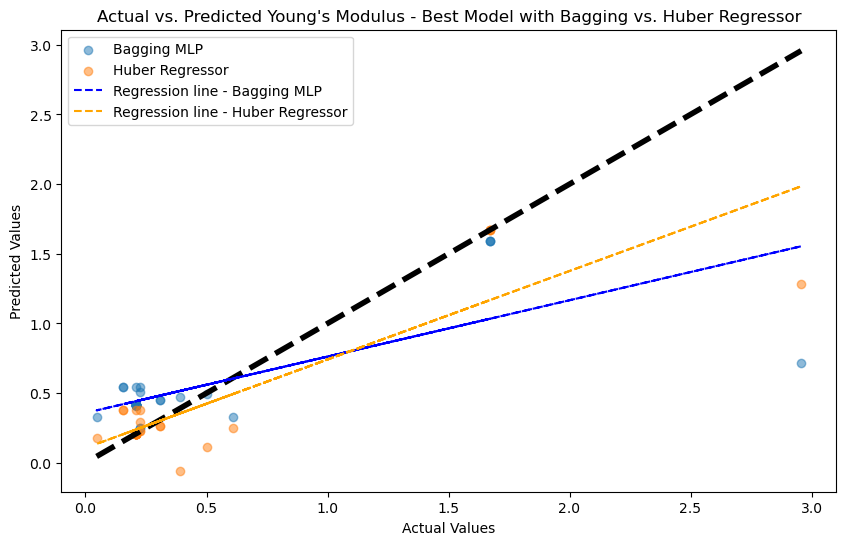

MSE for Huber Regressor: 0.10796241908439018


In [28]:
best_layers = (20, 5)
best_max_iter = 4000
output_dir = 'Images/Nickel/Young Modulus'
target_variable = "Young's Modulus"
results = compare_bagging_huber(X_train, y_train, X_test, y_test, best_layers, best_max_iter, output_dir, target_variable)
mse_huber = results['mse_huber']
actual = results['actual']
predbag = results['predbag']
predhuber = results['predhuber']
best_model = results['model']
print("MSE for Huber Regressor:", mse_huber)

In [29]:
def evaluate_rank_correlation(actuals, preds):
    """
    Computes the Spearman's rank correlation coefficient between actual and predicted values.

    Parameters:
    - actuals (np.array): Array of actual values.
    - preds (np.array): Array of predicted values.

    Returns:
    - float: Spearman's rank correlation coefficient.
    """
    # Calculate Spearman's rank correlation
    correlation, p_value = spearmanr(actuals, preds)

    print("Spearman's rank correlation coefficient:", correlation)
    print("P-value of the correlation coefficient:", p_value)

    return correlation

In [30]:
def plot_rank_correlation(actuals, preds, save_path=None):
    """
    Plots a scatter plot of actual vs. predicted values and calculates Spearman's rank correlation.
    Optionally saves the plot to a file.

    Parameters:
    - actuals (np.array): Array of actual values.
    - preds (np.array): Array of predicted values.
    - save_path (str, optional): Path to save the plot image file. If None, the plot is not saved.
    """
    # Calculate Spearman's rank correlation
    correlation, _ = spearmanr(actuals, preds)
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=actuals, y=preds, color='blue', edgecolor='w', s=100, alpha=0.7)

    # Plot a 45-degree line
    max_val = max(actuals.max(), preds.max())
    min_val = min(actuals.min(), preds.min())
    plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='Perfect Prediction Line')

    # Optional: add a regression line
    sns.regplot(x=actuals, y=preds, scatter=False, color='red', label='Regression Line')
    
    plt.title(f'Scatter Plot of Actual vs. Predicted with Spearman Correlation: {correlation:.2f}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.grid(True)

    if save_path:
        plt.savefig(save_path, format='png', dpi=300)  # Adjust format and dpi as needed
        print(f"Plot saved to {save_path}")
    plt.show()

In [31]:
def show_correlation(model_type, file_path, actuals, preds, target_variable, metal="Nickel"):
    """General function to evaluate correlation, generate plot, and write LaTeX documentation."""
    rank_correlation = evaluate_rank_correlation(actuals, preds)
    plot_filename = f"{file_path}/{metal}_{target_variable.replace(' ', '_')}_{model_type}MLP.png"
    plot_rank_correlation(actuals, preds, plot_filename)

    latex_code = rf"""
    \begin{{figure}}[h]
        \centering
        \includegraphics[width=0.8\textwidth]{{{plot_filename}}}
        \caption{{Correlation of {model_type} MLP model for {metal} predicting {target_variable}, Spearman Correlation: {rank_correlation:.2f}}}
        \label{{fig:{metal}_{target_variable.replace(' ', '_')}_{model_type}MLP}}
    \end{{figure}}
    """

    # Save the LaTeX code to a file
    tex_filename = plot_filename.replace('.png', '.tex')
    with open(tex_filename, 'w') as f:
        f.write(latex_code)

    return rank_correlation

Spearman's rank correlation coefficient: 0.3778377674809534
P-value of the correlation coefficient: 0.032999804276786206
Plot saved to Images/Nickel/Young Modulus/Nickel_Young's_Modulus_BaggingMLP.png


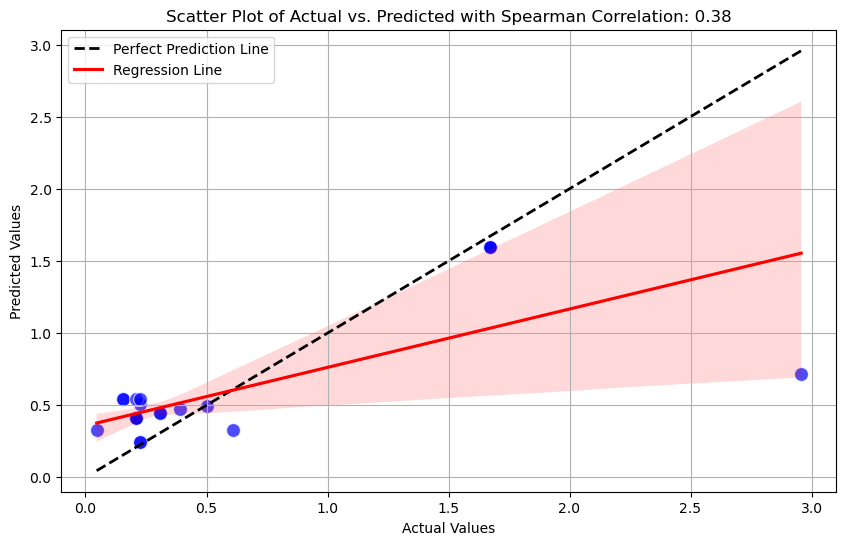

Spearman's rank correlation coefficient: 0.41455490123724575
P-value of the correlation coefficient: 0.01832266808081968
Plot saved to Images/Nickel/Young Modulus/Nickel_Young's_Modulus_HuberMLP.png


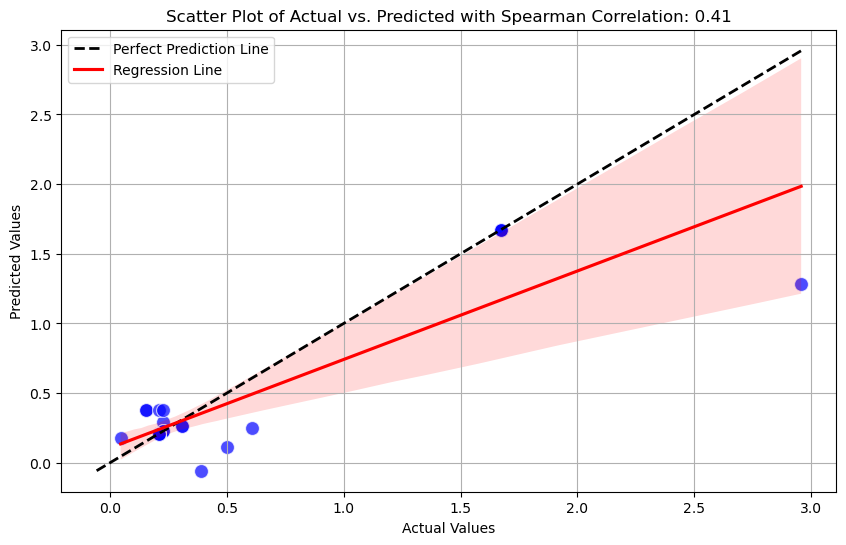

Bagging Model Spearman Correlation: 0.3778377674809534
Huber Model Spearman Correlation: 0.41455490123724575


In [32]:
# Example usage of the generalized function
output_dir = 'Images/Nickel/Young Modulus'
actuals = actual  # Example actual values from your test set
preds_bagging = predbag  # Example prediction values from the Bagging model
preds_huber = predhuber  # Example prediction values from the Huber model

# For Bagging MLP
correlation_bagging = show_correlation("Bagging", output_dir, actuals, preds_bagging, "Young's Modulus")

# For Huber MLP
correlation_huber = show_correlation("Huber", output_dir, actuals, preds_huber, "Young's Modulus")

print("Bagging Model Spearman Correlation:", correlation_bagging)
print("Huber Model Spearman Correlation:", correlation_huber)

In [33]:
def objective_function(composition):
    # Convert the composition list to a DataFrame with appropriate column names
    composition_df = pd.DataFrame([composition], columns=X_train.columns)
    
    # Predict the Young's modulus for the given composition
    predicted_modulus = best_model.predict(composition_df).flatten()[0]
    
    # Calculate the diversity penalty as the variance of component proportions, excluding the first
    diversity_penalty = np.sum((np.array(composition[1:]) - np.mean(composition[1:]))**2)
    
    # Calculate the final adjusted score (negative for maximization in minimize function)
    adjusted_score = predicted_modulus

    # Return the negated adjusted score
    return -adjusted_score

In [34]:
def optimize_alloy_composition(X_train, output_dir,target_property , metal="Aluminum"):
    """
    Optimizes the composition of an alloy for the best performance based on an objective function.
    
    Parameters:
        X_train (DataFrame): Training data features used for generating initial guesses.
        output_dir (str): Directory to save outputs.
        metal (str): Type of metal being analyzed.
        target_property (str): The property being optimized, e.g., "Young's Modulus".
    
    Returns:
        tuple: Best composition and its score.
    """
    # Setting constraints and bounds
    bounds = [(75, 100)] + [(0, 100) for _ in range(len(X_train.columns) - 1)]
    cons = {'type': 'eq', 'fun': lambda x: 100 - np.sum(x)}

    results = []
    best_score = -np.inf
    best_composition = None

    # Perform optimization multiple times
    for i in range(25):
        initial_composition = [75] + [np.random.rand() * 25 for _ in range(len(X_train.columns) - 1)]
        initial_composition = np.array(initial_composition)
        initial_composition *= 100 / np.sum(initial_composition)

        result = minimize(
            objective_function,
            initial_composition,
            method='SLSQP',
            bounds=bounds,
            constraints=cons,
            options={'disp': False, 'maxiter': 1000}
        )

        if result.success:
            adjusted_score = -result.fun  # Assume maximization
            results.append((result.x, adjusted_score))
            if adjusted_score > best_score:
                best_score = adjusted_score
                best_composition = result.x

    # Save results
    results_path = f'Al_model_data/modulus_optimization_results.csv'
    os.makedirs(os.path.dirname(results_path), exist_ok=True)
    with open(results_path, 'w') as f:
        for idx, (composition, score) in enumerate(results):
            f.write(f"Alloy {idx+1}: Composition = {composition}, Score = {score}\n")

    # Plot the best alloy composition
    plt.figure(figsize=(10, 6))
    bars = plt.bar(X_train.columns, best_composition, color='blue')
    plt.xlabel('Element')
    plt.ylabel('Percentage')
    plt.title(f'Best Alloy Composition - Score: {best_score:.4f}')
    plt.xticks(rotation=45)
    for bar, percentage in zip(bars, best_composition):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{percentage:.2f}', va='bottom')
    plt.tight_layout()
    plot_path = f"{output_dir}/{metal}_{target_property.replace(' ', '_')}_BestAlloyComposition.png"
    plt.savefig(plot_path)
    plt.show()

    # LaTeX figure
    latex_code = rf"""
    \begin{{figure}}[h]
        \centering
        \includegraphics[width=0.8\textwidth]{{{plot_path}}}
        \caption{{Best Alloy Composition of {metal} based alloys predicting the {target_property}}}
        \label{{fig:{metal}_{target_property.replace(' ', '_')}_BestAlloyComposition}}
    \end{{figure}}
    """
    tex_path = f"{output_dir}/{metal}_{target_property.replace(' ', '_')}_BestAlloyComposition.tex"
    with open(tex_path, 'w') as f:
        f.write(latex_code)

    return best_composition, best_score

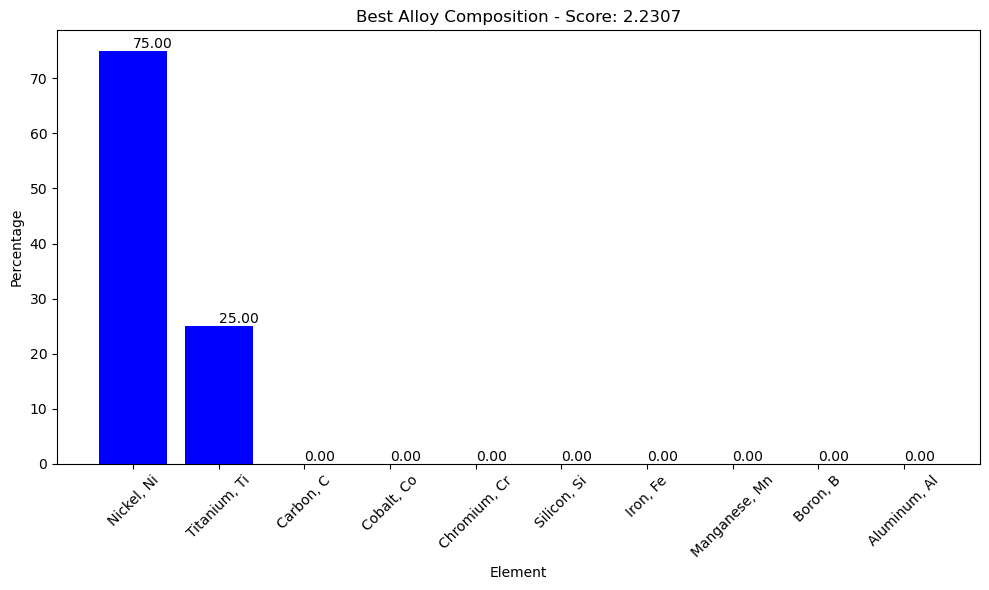

Best Composition: [7.50000000e+01 2.50000000e+01 0.00000000e+00 0.00000000e+00
 1.51528299e-11 0.00000000e+00 0.00000000e+00 2.22592270e-11
 0.00000000e+00 0.00000000e+00]
Best Score: 2.2307490158082652


In [35]:
output_dir = 'Images/Aluminum/Young Modulus'
metal = "Nickel"
target_property = "Young's Modulus"
best_composition, best_score = optimize_alloy_composition(X_train, output_dir, target_property, metal)
print("Best Composition:", best_composition)
print("Best Score:", best_score)

## Yield Strength

### Data Preperation

In [36]:
# Assuming df is your DataFrame and it contains the columns 'Yield Strength' and 'Density'
df['Yield Strength'] = df['Yield Strength'].apply(extract_numeric)

# List all columns to keep (metal percentages and Yield Strength)
columns_to_keep = ['Yield Strength'] + [col for col in df.columns if ',' in col]

# Create a new dataframe with only these columns
metals_and_yield = df[columns_to_keep]

# Check for missing values in the new dataset
missing_values_metals = metals_and_yield.isnull().sum()
missing_values_metals[missing_values_metals > 0], metals_and_yield.head()

(Series([], dtype: int64),
    Yield Strength  Aluminum, Al  Carbon, C  Chromium, Cr  Cobalt, Co  \
 0        0.841745           0.4      0.100          21.0         1.0   
 1        0.494314           1.6      0.020          18.0        12.0   
 2        1.031898           0.4      0.100          21.0         1.0   
 3        1.875657           0.8      0.080          17.0         1.0   
 4        1.032831           0.0      0.004          15.5         0.1   
 
    Iron, Fe  Manganese, Mn  Molybdenum, Mo  Nickel, Ni  \
 0       5.0           0.50             9.0        62.0   
 1       2.0           1.00             3.5        51.6   
 2       5.0           0.50             9.0        62.0   
 3      17.0           0.35             2.8        50.0   
 4       6.0           0.15            16.0        59.0   
 
    Niobium, Nb (Columbium, Cb)  Silicon, Si  Titanium, Ti  Boron, B  \
 0                         3.70         0.50          0.40     0.000   
 1                         0.00  

In [37]:
# Splitting the dataset into features and target variable
X = metals_and_yield.drop('Yield Strength', axis=1)
y = metals_and_yield['Yield Strength']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head(), y_train.head()

(     Aluminum, Al  Carbon, C  Chromium, Cr  Cobalt, Co  Iron, Fe  \
 60            0.0      0.025          19.0        33.0       1.0   
 115           0.8      0.080          17.0         1.0      17.0   
 2             0.4      0.100          21.0         1.0       5.0   
 123           0.4      0.100          21.0         1.0       5.0   
 45            0.4      0.100          21.0         1.0       5.0   
 
      Manganese, Mn  Molybdenum, Mo  Nickel, Ni  Niobium, Nb (Columbium, Cb)  \
 60            0.15             9.0        33.0                         0.00   
 115           0.35             2.8        50.0                         4.75   
 2             0.50             9.0        62.0                         3.70   
 123           0.50             9.0        62.0                         3.70   
 45            0.50             9.0        62.0                         3.70   
 
      Silicon, Si  Titanium, Ti  Boron, B  Copper, Cu  Phosphorus, P  \
 60          0.15          1.0

### Feature Selection

#### Random Forest Feature Importance

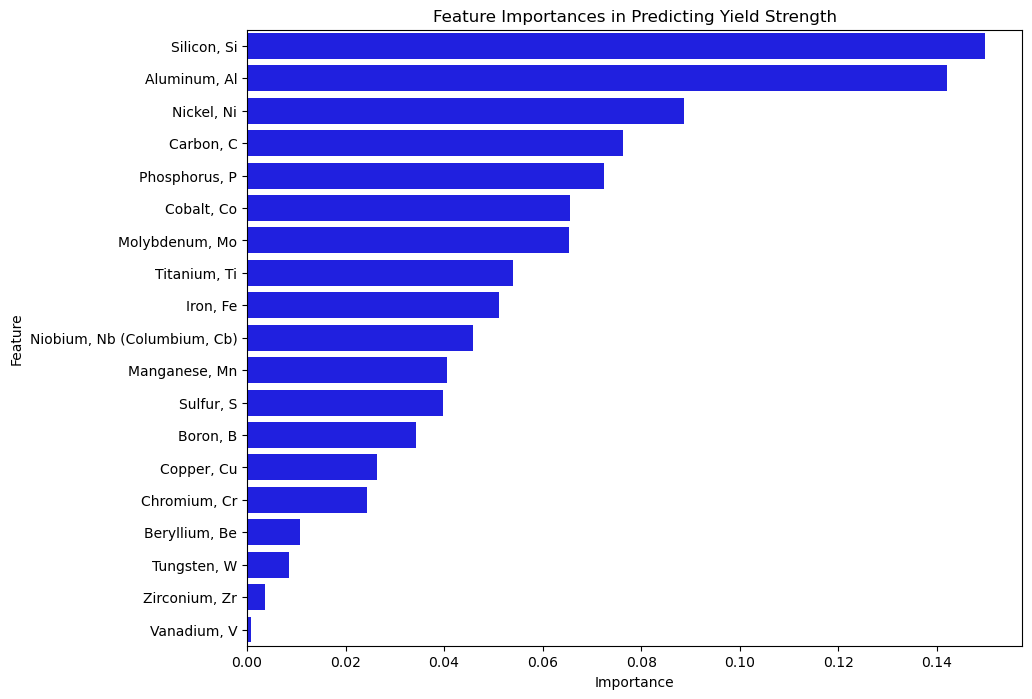

(0.3821978052664057,
                         Feature  Importance
 9                   Silicon, Si    0.149806
 0                  Aluminum, Al    0.141993
 7                    Nickel, Ni    0.088612
 1                     Carbon, C    0.076377
 13                Phosphorus, P    0.072512
 3                    Cobalt, Co    0.065459
 6                Molybdenum, Mo    0.065275
 10                 Titanium, Ti    0.053889
 4                      Iron, Fe    0.051071
 8   Niobium, Nb (Columbium, Cb)    0.045871
 5                 Manganese, Mn    0.040685
 14                    Sulfur, S    0.039758
 11                     Boron, B    0.034383
 12                   Copper, Cu    0.026446
 2                  Chromium, Cr    0.024288
 18                Beryllium, Be    0.010780
 16                  Tungsten, W    0.008439
 15                Zirconium, Zr    0.003558
 17                  Vanadium, V    0.000799)

In [38]:
output_dir = "Images/Nickel/Yield Strength"
train_and_evaluate_simple_rf(X_train, y_train, X_test, y_test, output_dir, "Yield Strength")

#### Combination Neural Network Feature Combination Importance

Loading existing results...
1/1 [==============================] - 0s 121ms/step


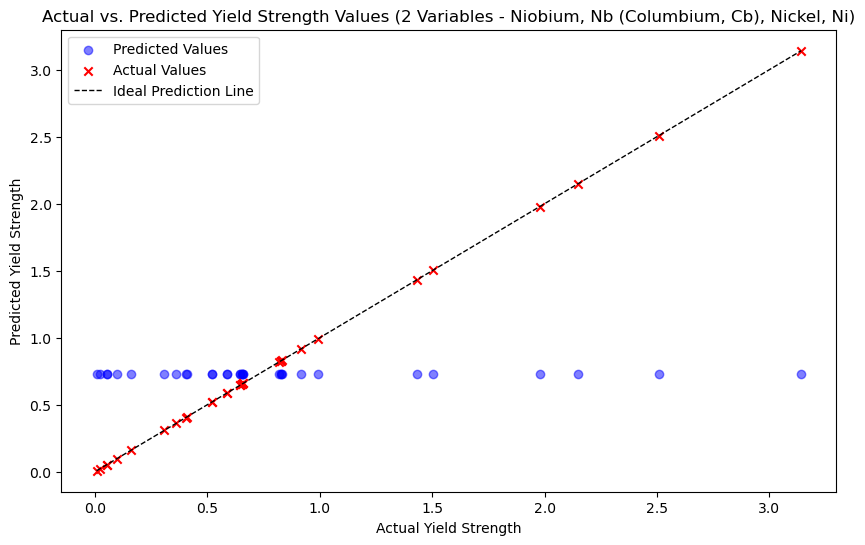

Best combination including Nickel, Ni: ('Niobium, Nb (Columbium, Cb)', 'Nickel, Ni'), MSE: 0.5222212076187134
Graph and LaTeX file saved with element pair in names: Images/Nickel/Yield Strength/Nickel_Yield_Strength_2VariableMLP.png and Images/Nickel/Yield Strength/Nickel_Yield_Strength_2VariableMLP.tex


In [39]:
top_features = ['Silicon, Si', 'Chromium, Cr', 'Aluminum, Al', 'Beryllium, Be', 'Molybdenum, Mo', 'Niobium, Nb (Columbium, Cb)', 
                'Iron, Fe', 'Boron, B', 'Manganese, Mn', 'Carbon, C', 'Cobalt, Co', 'Titanium, Ti', 'Copper, Cu', 'Phosphorus, P', 
                'Zirconium, Zr', 'Vanadium, V', 'Sulfur, S', 'Tungsten, W']
fixed_feature = 'Nickel, Ni'
file_path = 'Ni_model_data/mse_scores_with_nickel_2_features_yield.csv'
plotdir = 'Images/Nickel/Yield Strength'
process2VariableMLP(metals_and_yield, top_features, fixed_feature, "Yield Strength", file_path, plotdir)

Loading existing results...
1/1 [==============================] - 0s 123ms/step


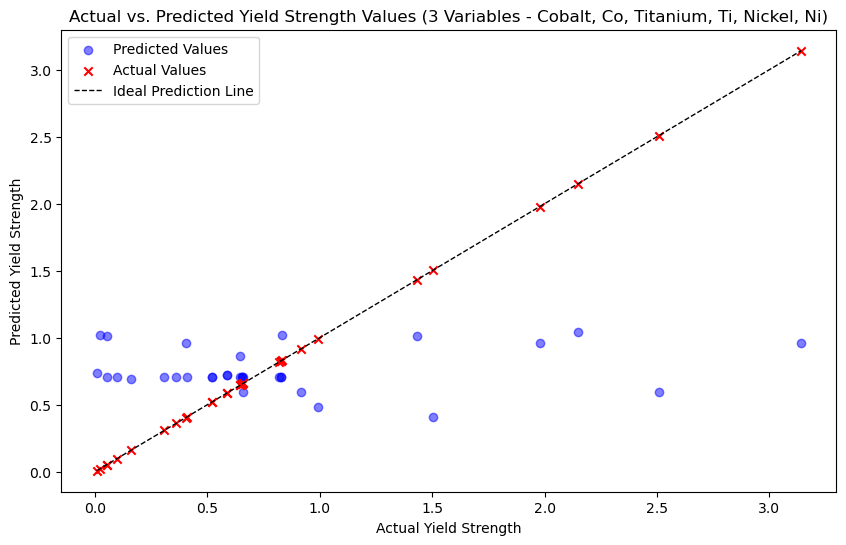

Best combination including Nickel, Ni: ('Cobalt, Co', 'Titanium, Ti', 'Nickel, Ni'), MSE: 0.4904137849807739
Graph and LaTeX file saved with element pair in names: Images/Nickel/Yield Strength/Nickel_Yield_Strength_3VariableMLP.png and Images/Nickel/Yield Strength/Nickel_Yield_Strength_3VariableMLP.tex


In [40]:
top_features = ['Chromium, Cr', 'Aluminum, Al', 'Silicon, Si', 'Phosphorus, P', 'Carbon, C', 'Cobalt, Co', 'Molybdenum, Mo', 'Titanium, Ti', 'Niobium, Nb (Columbium, Cb)', 'Iron, Fe', 'Copper, Cu']
fixed_feature = 'Nickel, Ni'
file_path = 'Ni_model_data/mse_scores_with_nickel_3_features_yield.csv'
plotdir = 'Images/Nickel/Yield Strength'
process3VariableMLP(metals_and_yield, top_features, fixed_feature, "Yield Strength", file_path, plotdir)

#### Correlation Matrix

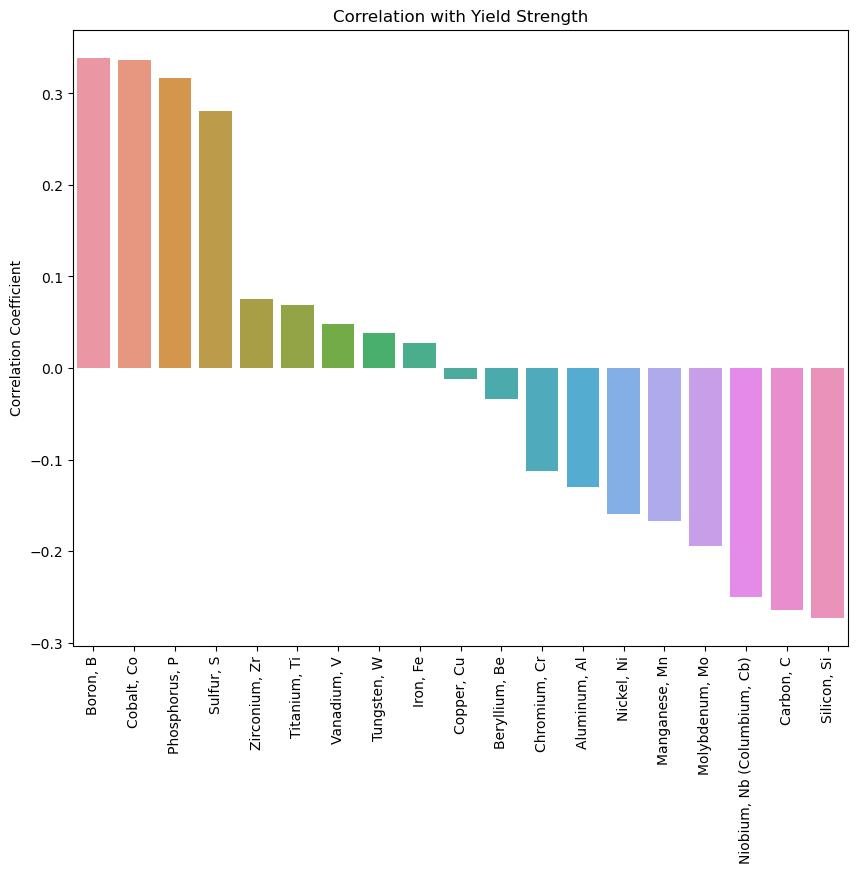

Boron, B                       0.339029
Cobalt, Co                     0.336470
Phosphorus, P                  0.316501
Sulfur, S                      0.280169
Zirconium, Zr                  0.075213
Titanium, Ti                   0.069256
Vanadium, V                    0.047679
Tungsten, W                    0.038067
Iron, Fe                       0.027458
Copper, Cu                    -0.011989
Beryllium, Be                 -0.034302
Chromium, Cr                  -0.112536
Aluminum, Al                  -0.130263
Nickel, Ni                    -0.159884
Manganese, Mn                 -0.167061
Molybdenum, Mo                -0.194297
Niobium, Nb (Columbium, Cb)   -0.249918
Carbon, C                     -0.264246
Silicon, Si                   -0.272594
Name: Yield Strength, dtype: float64

In [41]:
target_feature = "Yield Strength"
output_dir = "Images/Nickel/Yield Strength"
visualize_correlation(metals_and_yield, target_feature, output_dir)

#### Regression

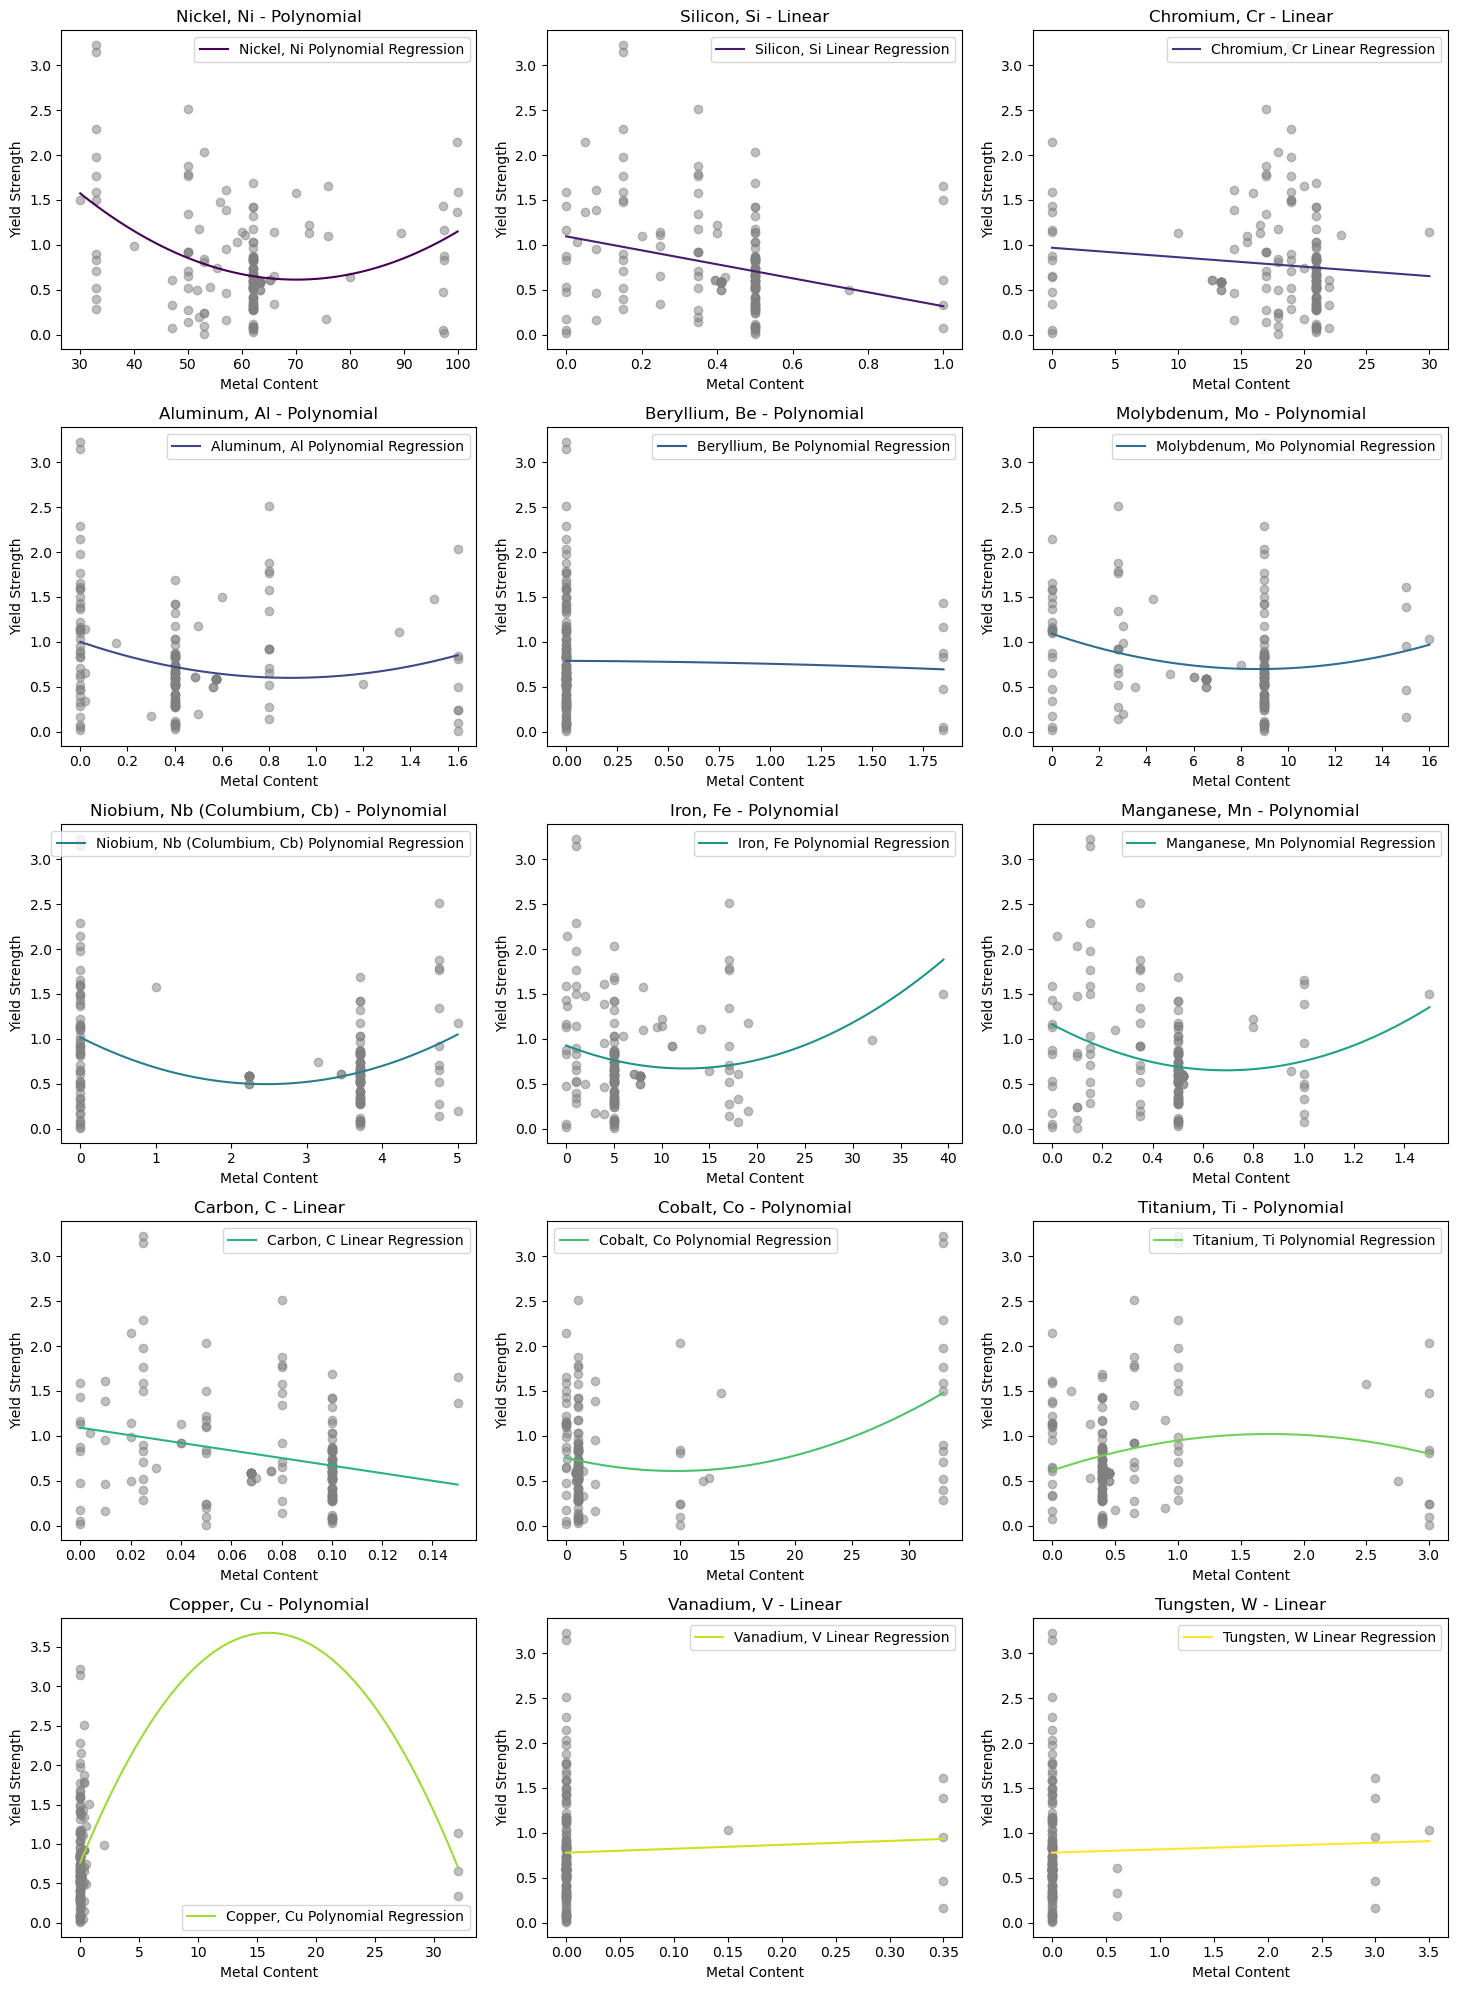

(                          Metal  Coefficient     Effect
 0                    Nickel, Ni     0.000597  Increases
 1                   Silicon, Si    -0.777305  Decreases
 2                  Chromium, Cr    -0.010507  Decreases
 3                  Aluminum, Al     0.502988  Increases
 4                 Beryllium, Be    -0.021466  Decreases
 5                Molybdenum, Mo     0.005133  Increases
 6   Niobium, Nb (Columbium, Cb)     0.085757  Increases
 7                      Iron, Fe     0.001653  Increases
 8                 Manganese, Mn     1.070517  Increases
 9                     Carbon, C    -4.215193  Decreases
 10                   Cobalt, Co     0.001590  Increases
 11                 Titanium, Ti    -0.136407  Decreases
 12                   Copper, Cu    -0.011486  Decreases
 13                  Vanadium, V     0.436238  Increases
 14                  Tungsten, W     0.036504  Increases,
 'Images/Nickel/Yield Strength/Nickel_Yield_Strength_IndividualElementRegression.png')

In [42]:
metals = ['Nickel, Ni', 'Silicon, Si', 'Chromium, Cr', 'Aluminum, Al', 'Beryllium, Be', 'Molybdenum, Mo', 'Niobium, Nb (Columbium, Cb)', 
            'Iron, Fe', 'Boron, B', 'Manganese, Mn', 'Carbon, C', 'Cobalt, Co', 'Titanium, Ti', 'Copper, Cu', 'Phosphorus, P', 
            'Zirconium, Zr', 'Vanadium, V', 'Sulfur, S', 'Tungsten, W']
target_feature = "Yield Strength"
plot_dir = "Images/Nickel/Yield Strength"
evaluate_and_visualize_impact(metals_and_yield, metals, target_feature, plot_dir)

In [43]:
## Splitting the DataFrame into positive and negative subsets
#positive_df = impact_summary[impact_summary['Coefficient'] > 0].copy()
#negative_df = impact_summary[impact_summary['Coefficient'] < 0].copy()
#
## Sorting each subset
#positive_df.sort_values(by='Coefficient', ascending=False, inplace=True)
#negative_df.sort_values(by='Coefficient', ascending=False, inplace=True)  # Sort negatives in descending order by value
#
## Concatenating back into a single DataFrame
#sorted_impact_summary = pd.concat([positive_df, negative_df], axis=0)
#
## Define colors based on coefficient sign and set edge colors for better visibility
#colors = ['green' if x > 0 else 'red' for x in sorted_impact_summary['Coefficient']]
#edge_colors = ['darkgreen' if x > 0 else 'darkred' for x in sorted_impact_summary['Coefficient']]
#
## Set up the plot
#plt.figure(figsize=(10, 8))
#bars = plt.barh(sorted_impact_summary['Metal'], sorted_impact_summary['Coefficient'], color=colors, edgecolor=edge_colors)
#plt.xlabel('Coefficient Value')
#plt.title('Impact of Each Metal on Yield Strength')
#
## Invert y-axis to have the largest impact at the top
#plt.gca().invert_yaxis()
#
## Add text labels to bars for exact coefficient values
#for bar, value in zip(bars, sorted_impact_summary['Coefficient']):
#    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{value:.2f}', va='center', 
#             ha='right' if value < 0 else 'left')
#
## Show the plot
#plt.show()
#
## Optionally, print the DataFrame for a tabular view
#print(sorted_impact_summary[['Metal', 'Coefficient', 'Effect']])

### <span style="color:lime">Optimizing Yield Strength</span>

#### <span style="color:red">Random Forest</span>

In [44]:
selected_features = ['Nickel, Ni', 'Chromium, Cr', 'Aluminum, Al', 'Silicon, Si', 'Phosphorus, P', 'Carbon, C', 'Cobalt, Co', 'Molybdenum, Mo', 'Titanium, Ti', 'Niobium, Nb (Columbium, Cb)']
target_variable = 'Yield Strength'
results = analyze_alloy_strength(metals_and_yield, selected_features, target_variable)
print(results)
model = results['model']

{'mse': 0.23416107530722205, 'rmse': 0.483901927364649, 'max_youngs_modulus': 1.3566849615865368, 'strongest_composition': Nickel, Ni                     100.0
Chromium, Cr                     0.0
Aluminum, Al                     0.0
Silicon, Si                      0.0
Phosphorus, P                    0.0
Carbon, C                        0.0
Cobalt, Co                       0.0
Molybdenum, Mo                   0.0
Titanium, Ti                     0.0
Niobium, Nb (Columbium, Cb)      0.0
Name: 8, dtype: float64, 'model': RandomForestRegressor(random_state=42)}


In [45]:
#output_path = "Ni_model_data/all_hypothetical_combinations_with_predictions_nickel_yield.csv"
#selected_features = ['Chromium, Cr', 'Aluminum, Al', 'Silicon, Si', 'Phosphorus, P', 'Carbon, C', 'Cobalt, Co', 'Molybdenum, Mo', 'Titanium, Ti', 'Niobium, Nb (Columbium, Cb)']
#al_increments = np.arange(75, 101, 5)
#other_increments = np.arange(0, 26, 5)
#
#top_combinations = generate_and_predict_alloy_strength(model, output_path, metals, al_increments, other_increments, 'Yield Strength')
#print("Top 10 Yield Strength Combinations:")
#print(top_combinations.head(10))  # Print only the top 10

#### <span style="color:red">MLP</span>

In [46]:
selected_features = ['Nickel, Ni', 'Chromium, Cr', 'Aluminum, Al', 'Silicon, Si', 'Phosphorus, P', 'Carbon, C', 'Cobalt, Co', 'Molybdenum, Mo', 'Titanium, Ti', 'Niobium, Nb (Columbium, Cb)', 'Iron, Fe', 'Copper, Cu']
target_variable = "Yield Strength"
layer_configurations = [
    (30, 3, 1), (40, 2), (10, 10), (3, 10, 2),
    (10,), (20,), (30,), (40,), (50,),
    (8,), (8, 8), (8, 5, 2),
    (5, 5), (10, 10), (20, 5), (5, 20),
    (15, 6), (6, 6), (6, 6, 2),
    (5,), (5, 10, 2), (10, 10), (5, 10),
    (2,), (2,2), (2,2,2), (2,2,2,2)
]
max_iter_options = [4000]
results_path = 'Al_model_data/grid_search_Nickel_yield_results.csv'

# Call the grid search function
result = perform_grid_search_nn(metals_and_yield, selected_features, target_variable, layer_configurations, max_iter_options, results_path)
X_train, X_test, y_train, y_test = result['X_train'], result['X_test'], result['y_train'], result['y_test']
grid_search_results = result['results_df']
print("Grid search results DataFrame:")
print(grid_search_results)

# Sort the results DataFrame by the 'MSE' column in ascending order
sorted_results = grid_search_results.sort_values(by='MSE', ascending=True)

# Print the sorted results
print("Sorted Grid Search Results by MSE:")
print(sorted_results)

Loaded existing results from file.
Grid search results DataFrame:
          Layers  Max_iter       MSE
0     (30, 3, 1)      4000  0.561920
1        (40, 2)      4000  0.570479
2       (10, 10)      4000  0.471257
3     (3, 10, 2)      4000  0.553360
4          (10,)      4000  0.455562
5          (20,)      4000  0.425568
6          (30,)      4000  0.574450
7          (40,)      4000  0.448769
8          (50,)      4000  0.643054
9           (8,)      4000  0.420747
10        (8, 8)      4000  0.459620
11     (8, 5, 2)      4000  0.442801
12        (5, 5)      4000  0.461323
13      (10, 10)      4000  0.471257
14       (20, 5)      4000  0.637475
15       (5, 20)      4000  0.711452
16       (15, 6)      4000  0.585545
17        (6, 6)      4000  0.468976
18     (6, 6, 2)      4000  0.498673
19          (5,)      4000  0.500963
20    (5, 10, 2)      4000  0.453597
21      (10, 10)      4000  0.471257
22       (5, 10)      4000  0.471709
23          (2,)      4000  0.459257
24       

/Users/lukerickard/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/var/folders/23/prfh1l6n7pxb55snfqs3862m0000gn/T/ipykernel_65554/4064323175.py:46: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(y_test, p(y_test), "r--", label='Regression line - Bagging MLP', color='blue' )
/var/folders/23/prfh1l6n7pxb55snfqs3862m0000gn/T/ipykernel_65554/4064323175.py:51: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  plt.plot(y_te

Mean Squared Error - Huber Regressor: 0.43074806167922985


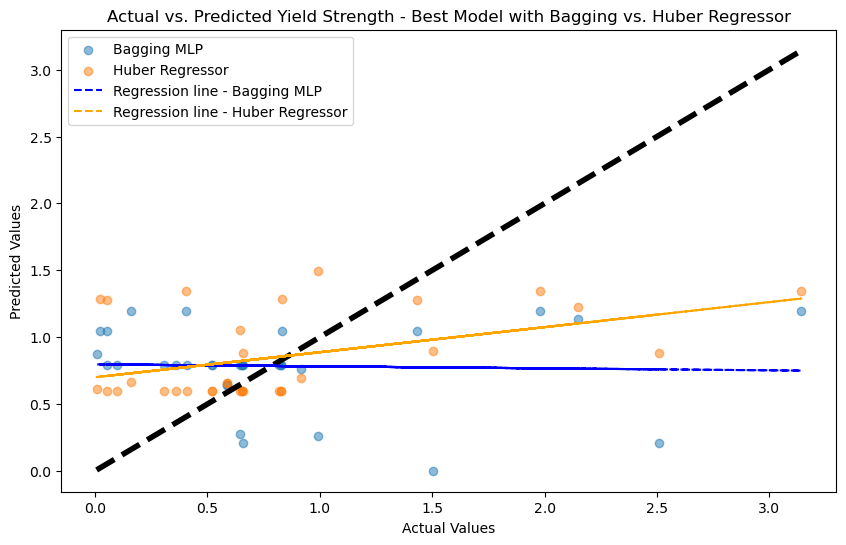

MSE for Huber Regressor: 0.43074806167922985


In [47]:
best_layers = (20, 5)
best_max_iter = 4000
output_dir = 'Images/Nickel/Yield Strength'
target_variable = "Yield Strength"
results = compare_bagging_huber(X_train, y_train, X_test, y_test, best_layers, best_max_iter, output_dir, target_variable)
mse_huber = results['mse_huber']
actual = results['actual']
predbag = results['predbag']
predhuber = results['predhuber']
best_model = results['model']
print("MSE for Huber Regressor:", mse_huber)

Spearman's rank correlation coefficient: -0.14330851970636785
P-value of the correlation coefficient: 0.4339363111260699
Plot saved to Images/Nickel/Yield Strength/Nickel_Yield_Strength_BaggingMLP.png


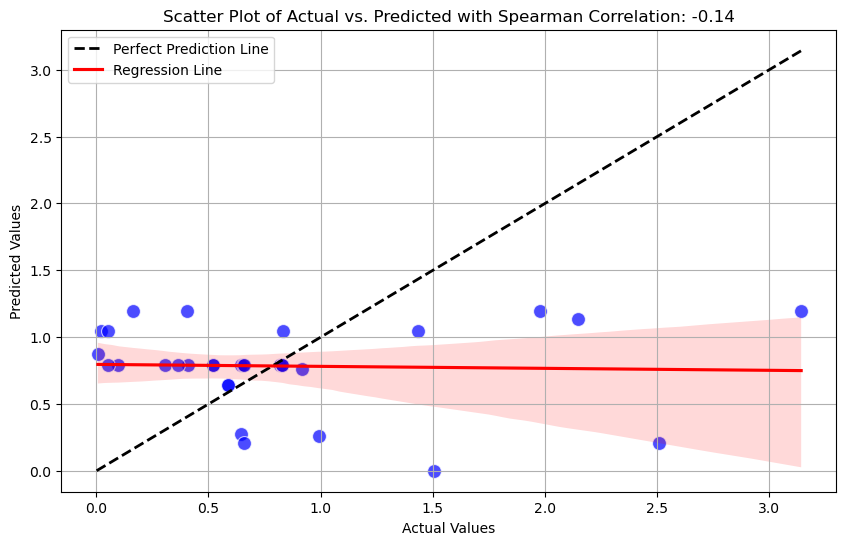

Spearman's rank correlation coefficient: 0.3557310479132649
P-value of the correlation coefficient: 0.04569964116915483
Plot saved to Images/Nickel/Yield Strength/Nickel_Yield_Strength_HuberMLP.png


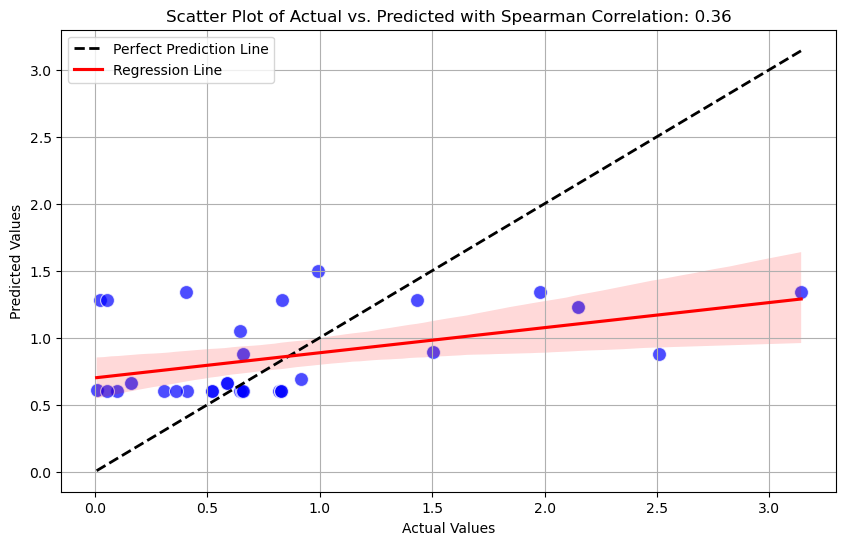

Bagging Model Spearman Correlation: -0.14330851970636785
Huber Model Spearman Correlation: 0.3557310479132649


In [48]:
# Example usage of the generalized function
output_dir = 'Images/Nickel/Yield Strength'
actuals = actual  # Example actual values from your test set
preds_bagging = predbag  # Example prediction values from the Bagging model
preds_huber = predhuber  # Example prediction values from the Huber model

# For Bagging MLP
correlation_bagging = show_correlation("Bagging", output_dir, actuals, preds_bagging, "Yield Strength")

# For Huber MLP
correlation_huber = show_correlation("Huber", output_dir, actuals, preds_huber, "Yield Strength")

print("Bagging Model Spearman Correlation:", correlation_bagging)
print("Huber Model Spearman Correlation:", correlation_huber)

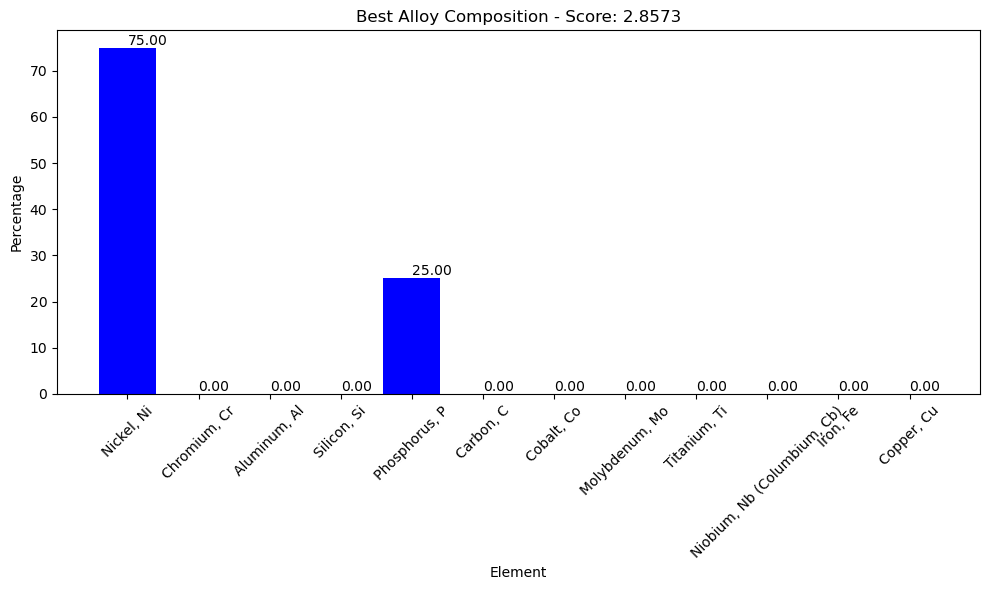

Best Composition: [7.50000000e+01 1.52920111e-09 2.29326016e-09 2.12725548e-09
 2.50000003e+01 3.30296660e-12 0.00000000e+00 7.02531851e-12
 3.50524823e-10 4.41302391e-10 0.00000000e+00 0.00000000e+00]
Best Score: 2.857251086535537


In [49]:

output_dir = 'Images/Nickel/Yield Strength'
target_property = "Yield Strength"
best_composition, best_score = optimize_alloy_composition(X_train, output_dir, target_property, metal)
print("Best Composition:", best_composition)
print("Best Score:", best_score)

## Tensile Strength

### Data Preperation

In [50]:
# Assuming df1 is your DataFrame and it contains the columns 'Tensile Strength'
df['Tensile Strength'] = df['Tensile Strength'].apply(extract_numeric)

# List all columns to keep (metal percentages and Tensile Strength)
columns_to_keep = ['Tensile Strength'] + [col for col in df.columns if ',' in col]

# Create a new dataframe with only these columns
metals_and_tensile = df[columns_to_keep]

# Check for missing values in the new dataset
missing_values_metals = metals_and_tensile.isnull().sum()
missing_values_metals[missing_values_metals > 0], metals_and_tensile.head()

(Series([], dtype: int64),
    Tensile Strength  Aluminum, Al  Carbon, C  Chromium, Cr  Cobalt, Co  \
 0          0.500279           0.4      0.100          21.0         1.0   
 1          1.497171           1.6      0.020          18.0        12.0   
 2          0.892439           0.4      0.100          21.0         1.0   
 3          1.584399           0.8      0.080          17.0         1.0   
 4          0.940084           0.0      0.004          15.5         0.1   
 
    Iron, Fe  Manganese, Mn  Molybdenum, Mo  Nickel, Ni  \
 0       5.0           0.50             9.0        62.0   
 1       2.0           1.00             3.5        51.6   
 2       5.0           0.50             9.0        62.0   
 3      17.0           0.35             2.8        50.0   
 4       6.0           0.15            16.0        59.0   
 
    Niobium, Nb (Columbium, Cb)  Silicon, Si  Titanium, Ti  Boron, B  \
 0                         3.70         0.50          0.40     0.000   
 1                   

In [51]:
# Splitting the dataset into features and target variable
X = metals_and_tensile.drop('Tensile Strength', axis=1)
y = metals_and_tensile['Tensile Strength']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head(), y_train.head()

(     Aluminum, Al  Carbon, C  Chromium, Cr  Cobalt, Co  Iron, Fe  \
 60            0.0      0.025          19.0        33.0       1.0   
 115           0.8      0.080          17.0         1.0      17.0   
 2             0.4      0.100          21.0         1.0       5.0   
 123           0.4      0.100          21.0         1.0       5.0   
 45            0.4      0.100          21.0         1.0       5.0   
 
      Manganese, Mn  Molybdenum, Mo  Nickel, Ni  Niobium, Nb (Columbium, Cb)  \
 60            0.15             9.0        33.0                         0.00   
 115           0.35             2.8        50.0                         4.75   
 2             0.50             9.0        62.0                         3.70   
 123           0.50             9.0        62.0                         3.70   
 45            0.50             9.0        62.0                         3.70   
 
      Silicon, Si  Titanium, Ti  Boron, B  Copper, Cu  Phosphorus, P  \
 60          0.15          1.0

### Feature Selection

#### Random Forest Feature Importance

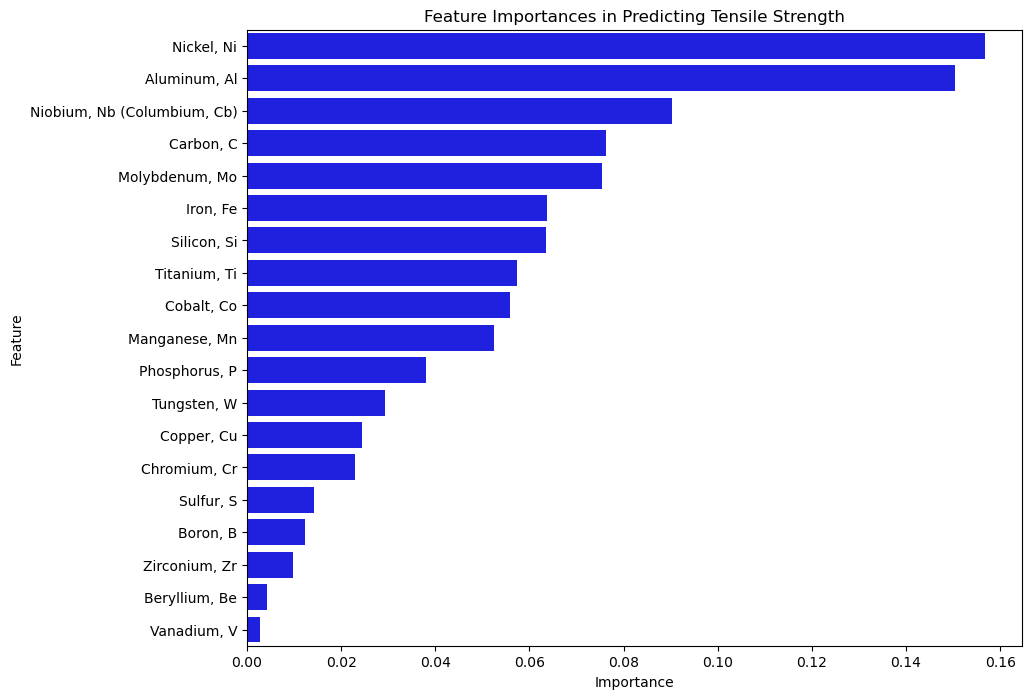

(0.3406379965859202,
                         Feature  Importance
 7                    Nickel, Ni    0.156802
 0                  Aluminum, Al    0.150497
 8   Niobium, Nb (Columbium, Cb)    0.090315
 1                     Carbon, C    0.076350
 6                Molybdenum, Mo    0.075376
 4                      Iron, Fe    0.063639
 9                   Silicon, Si    0.063486
 10                 Titanium, Ti    0.057288
 3                    Cobalt, Co    0.055787
 5                 Manganese, Mn    0.052439
 13                Phosphorus, P    0.038114
 16                  Tungsten, W    0.029245
 12                   Copper, Cu    0.024421
 2                  Chromium, Cr    0.022890
 14                    Sulfur, S    0.014209
 11                     Boron, B    0.012375
 15                Zirconium, Zr    0.009731
 18                Beryllium, Be    0.004228
 17                  Vanadium, V    0.002809)

In [52]:
output_dir = "Images/Nickel/Tensile Strength"
train_and_evaluate_simple_rf(X_train, y_train, X_test, y_test, output_dir, "Tensile Strength")

#### Combination Neural Network Feature Combination Importance

Processing new combinations...
Processing combination: ('Aluminum, Al', 'Chromium, Cr', 'Nickel, Ni')
Processing combination: ('Aluminum, Al', 'Carbon, C', 'Nickel, Ni')
Processing combination: ('Aluminum, Al', 'Niobium, Nb (Columbium, Cb)', 'Nickel, Ni')
Processing combination: ('Aluminum, Al', 'Cobalt, Co', 'Nickel, Ni')
Processing combination: ('Aluminum, Al', 'Molybdenum, Mo', 'Nickel, Ni')
Processing combination: ('Aluminum, Al', 'Iron, Fe', 'Nickel, Ni')
Processing combination: ('Aluminum, Al', 'Manganese, Mn', 'Nickel, Ni')
Processing combination: ('Aluminum, Al', 'Titanium, Ti', 'Nickel, Ni')
Processing combination: ('Chromium, Cr', 'Carbon, C', 'Nickel, Ni')
Processing combination: ('Chromium, Cr', 'Niobium, Nb (Columbium, Cb)', 'Nickel, Ni')
Processing combination: ('Chromium, Cr', 'Cobalt, Co', 'Nickel, Ni')
Processing combination: ('Chromium, Cr', 'Molybdenum, Mo', 'Nickel, Ni')
Processing combination: ('Chromium, Cr', 'Iron, Fe', 'Nickel, Ni')
Processing combination: ('Chr

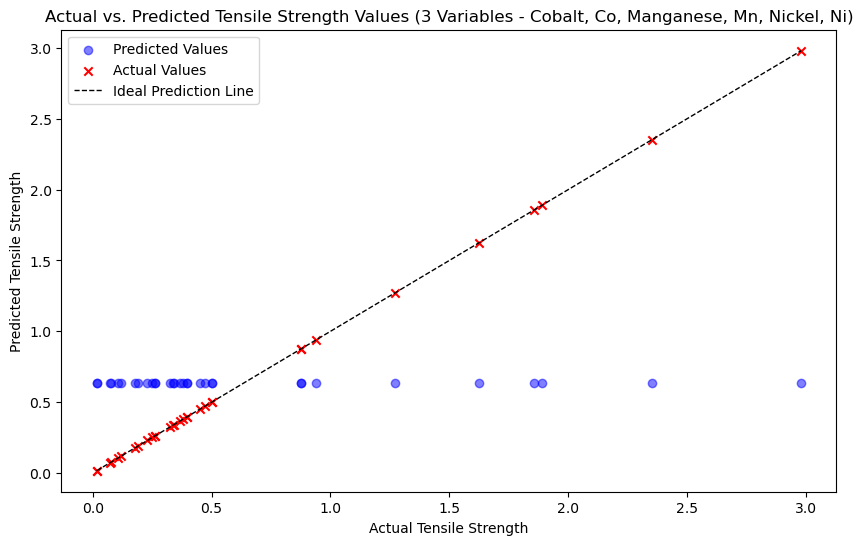

Best combination including Nickel, Ni: ('Cobalt, Co', 'Manganese, Mn', 'Nickel, Ni'), MSE: 0.4303346872329712
Graph and LaTeX file saved with element pair in names: Images/Nickel/Tensile Strength/Nickel_Tensile_Strength_3VariableMLP.png and Images/Nickel/Tensile Strength/Nickel_Tensile_Strength_3VariableMLP.tex


In [53]:
top_features = ['Aluminum, Al', 'Chromium, Cr', 'Carbon, C', 'Niobium, Nb (Columbium, Cb)', 'Cobalt, Co', 'Molybdenum, Mo', 'Iron, Fe', 'Manganese, Mn', 'Titanium, Ti']
fixed_feature = 'Nickel, Ni'
file_path = 'Ni_model_data/mse_scores_with_nickel_3_features_tensile.csv'
plotdir = 'Images/Nickel/Tensile Strength'
process3VariableMLP(metals_and_tensile, top_features, fixed_feature, "Tensile Strength", file_path, plotdir)

Processing new combinations...
Processing combination: ('Silicon, Si', 'Nickel, Ni')
Processing combination: ('Chromium, Cr', 'Nickel, Ni')
Processing combination: ('Aluminum, Al', 'Nickel, Ni')
Processing combination: ('Beryllium, Be', 'Nickel, Ni')
Processing combination: ('Molybdenum, Mo', 'Nickel, Ni')
Processing combination: ('Niobium, Nb (Columbium, Cb)', 'Nickel, Ni')
Processing combination: ('Iron, Fe', 'Nickel, Ni')
Processing combination: ('Boron, B', 'Nickel, Ni')
Processing combination: ('Manganese, Mn', 'Nickel, Ni')
Processing combination: ('Carbon, C', 'Nickel, Ni')
Processing combination: ('Cobalt, Co', 'Nickel, Ni')
Processing combination: ('Titanium, Ti', 'Nickel, Ni')
Processing combination: ('Copper, Cu', 'Nickel, Ni')
Processing combination: ('Phosphorus, P', 'Nickel, Ni')
Processing combination: ('Zirconium, Zr', 'Nickel, Ni')
Processing combination: ('Vanadium, V', 'Nickel, Ni')
Processing combination: ('Sulfur, S', 'Nickel, Ni')
Processing combination: ('Tungste

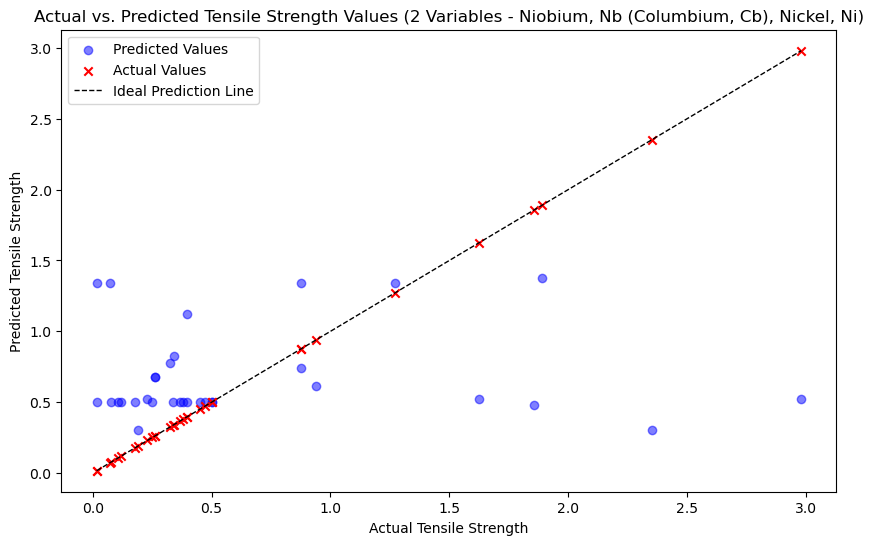

Best combination including Nickel, Ni: ('Niobium, Nb (Columbium, Cb)', 'Nickel, Ni'), MSE: 0.5207850933074951
Graph and LaTeX file saved with element pair in names: Images/Aluminum/Tensile Strength/Nickel_Tensile_Strength_2VariableMLP.png and Images/Aluminum/Tensile Strength/Nickel_Tensile_Strength_2VariableMLP.tex


In [54]:
top_features = ['Silicon, Si', 'Chromium, Cr', 'Aluminum, Al', 'Beryllium, Be', 'Molybdenum, Mo', 'Niobium, Nb (Columbium, Cb)', 
                'Iron, Fe', 'Boron, B', 'Manganese, Mn', 'Carbon, C', 'Cobalt, Co', 'Titanium, Ti', 'Copper, Cu', 'Phosphorus, P', 
                'Zirconium, Zr', 'Vanadium, V', 'Sulfur, S', 'Tungsten, W']
fixed_feature = 'Nickel, Ni'
file_path = 'Ni_model_data/mse_scores_with_nickel_2_features_tensile.csv'
plotdir = 'Images/Aluminum/Tensile Strength'
process2VariableMLP(metals_and_tensile, top_features, fixed_feature, "Tensile Strength", file_path, plotdir)

#### Correlation Matrix 

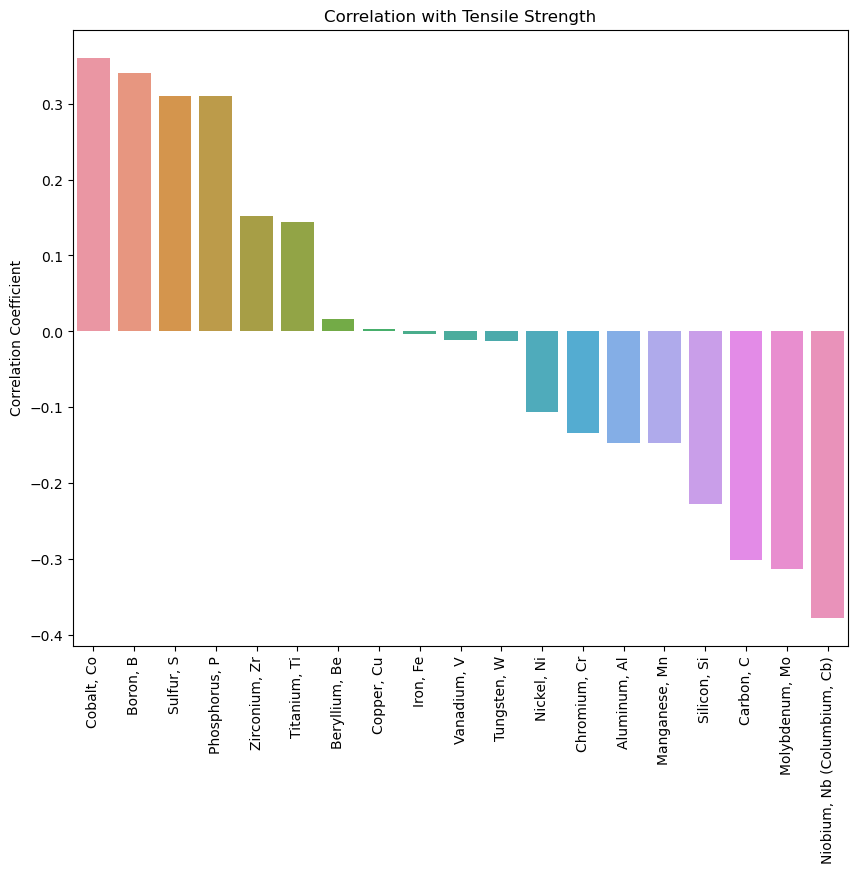

Cobalt, Co                     0.360948
Boron, B                       0.340897
Sulfur, S                      0.310407
Phosphorus, P                  0.310121
Zirconium, Zr                  0.151921
Titanium, Ti                   0.143813
Beryllium, Be                  0.016160
Copper, Cu                     0.003130
Iron, Fe                      -0.003968
Vanadium, V                   -0.012028
Tungsten, W                   -0.012226
Nickel, Ni                    -0.106678
Chromium, Cr                  -0.134186
Aluminum, Al                  -0.147575
Manganese, Mn                 -0.147667
Silicon, Si                   -0.227256
Carbon, C                     -0.301892
Molybdenum, Mo                -0.313406
Niobium, Nb (Columbium, Cb)   -0.377333
Name: Tensile Strength, dtype: float64

In [55]:
target_feature = "Tensile Strength"
output_dir = "Images/Nickel/Tensile Strength"
visualize_correlation(metals_and_tensile, target_feature, output_dir)

#### Regression

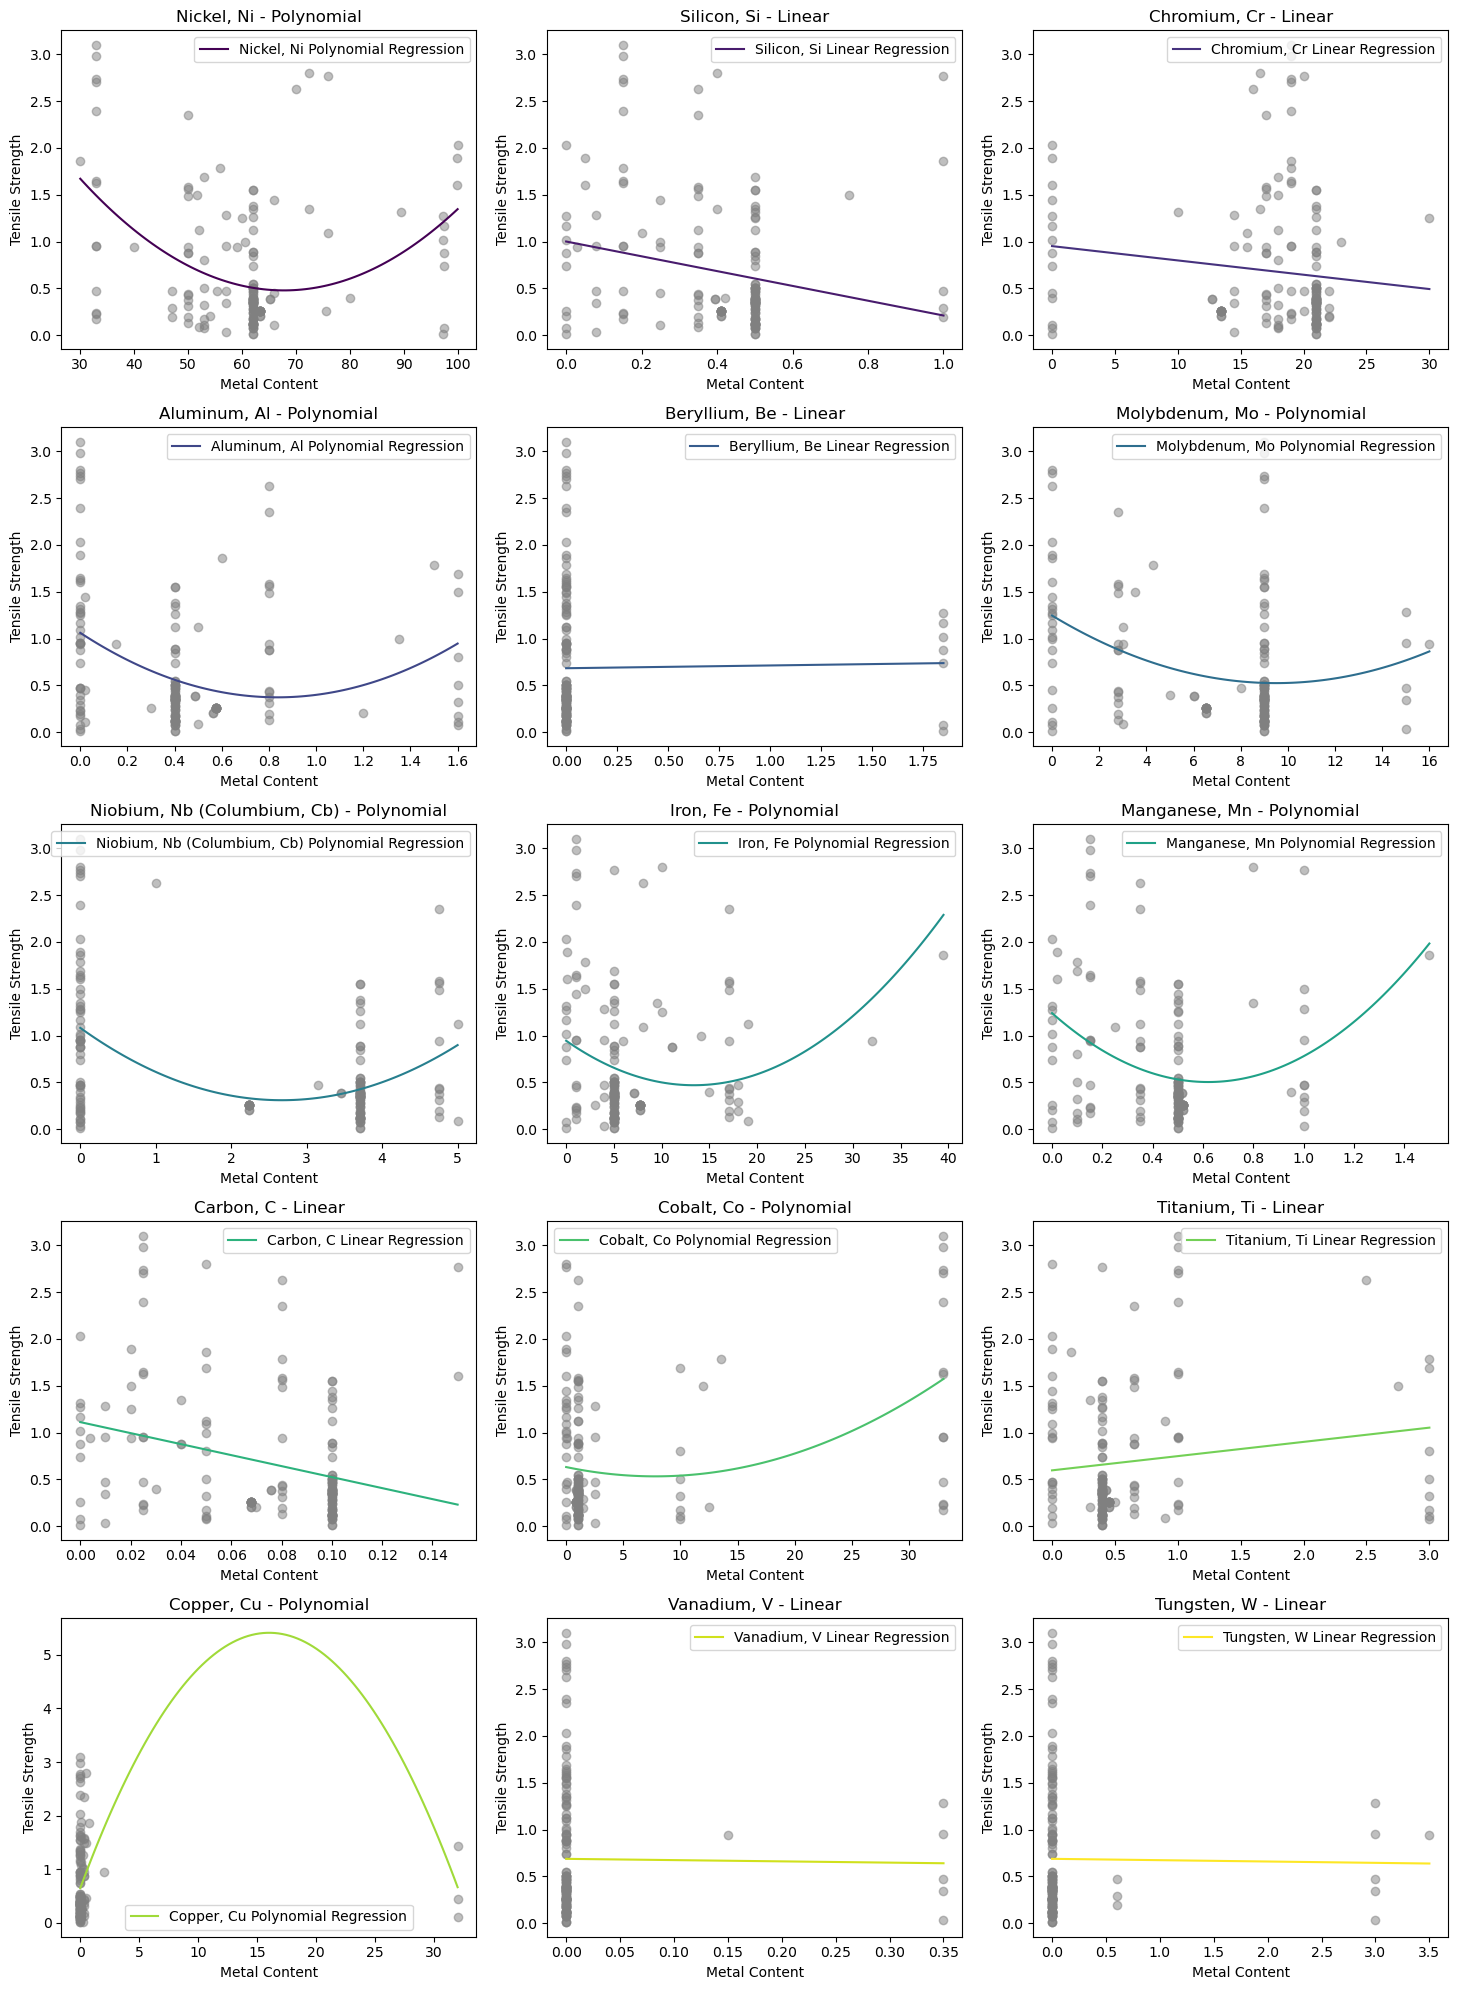

(                          Metal  Coefficient     Effect
 0                    Nickel, Ni     0.000835  Increases
 1                   Silicon, Si    -0.790254  Decreases
 2                  Chromium, Cr    -0.015278  Decreases
 3                  Aluminum, Al     0.984410  Increases
 4                 Beryllium, Be     0.029481  Increases
 5                Molybdenum, Mo     0.008002  Increases
 6   Niobium, Nb (Columbium, Cb)     0.108357  Increases
 7                      Iron, Fe     0.002661  Increases
 8                 Manganese, Mn     1.911607  Increases
 9                     Carbon, C    -5.872705  Decreases
 10                   Cobalt, Co     0.001636  Increases
 11                 Titanium, Ti     0.151965  Increases
 12                   Copper, Cu    -0.018582  Decreases
 13                  Vanadium, V    -0.134206  Decreases
 14                  Tungsten, W    -0.014297  Decreases,
 'Images/Nickel/Tensile Strength/Nickel_Tensile_Strength_IndividualElementRegression.pn

In [56]:
metals = ['Nickel, Ni', 'Silicon, Si', 'Chromium, Cr', 'Aluminum, Al', 'Beryllium, Be', 'Molybdenum, Mo', 'Niobium, Nb (Columbium, Cb)', 
                'Iron, Fe', 'Boron, B', 'Manganese, Mn', 'Carbon, C', 'Cobalt, Co', 'Titanium, Ti', 'Copper, Cu', 'Phosphorus, P', 
                'Zirconium, Zr', 'Vanadium, V', 'Sulfur, S', 'Tungsten, W']
target_feature = "Tensile Strength"
plot_dir = "Images/Nickel/Tensile Strength"
evaluate_and_visualize_impact(metals_and_tensile, metals, target_feature, plot_dir)

In [57]:
## Splitting the DataFrame into positive and negative subsets
#positive_df = impact_summary[impact_summary['Coefficient'] > 0].copy()
#negative_df = impact_summary[impact_summary['Coefficient'] < 0].copy()
#
## Sorting each subset
#positive_df.sort_values(by='Coefficient', ascending=False, inplace=True)
#negative_df.sort_values(by='Coefficient', ascending=False, inplace=True)  # Sort negatives in descending order by value
#
## Concatenating back into a single DataFrame
#sorted_impact_summary = pd.concat([positive_df, negative_df], axis=0)
#
## Define colors based on coefficient sign and set edge colors for better visibility
#colors = ['green' if x > 0 else 'red' for x in sorted_impact_summary['Coefficient']]
#edge_colors = ['darkgreen' if x > 0 else 'darkred' for x in sorted_impact_summary['Coefficient']]
#
## Set up the plot
#plt.figure(figsize=(10, 8))
#bars = plt.barh(sorted_impact_summary['Metal'], sorted_impact_summary['Coefficient'], color=colors, edgecolor=edge_colors)
#plt.xlabel('Coefficient Value')
#plt.title('Impact of Each Metal on Tensile Strength')
#
## Invert y-axis to have the largest impact at the top
#plt.gca().invert_yaxis()
#
## Add text labels to bars for exact coefficient values
#for bar, value in zip(bars, sorted_impact_summary['Coefficient']):
#    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{value:.2f}', va='center', 
#             ha='right' if value < 0 else 'left')
#
## Show the plot
#plt.show()
#
## Optionally, print the DataFrame for a tabular view
#print(sorted_impact_summary[['Metal', 'Coefficient', 'Effect']])

### <span style="color:lime">Optimizing Tensile Strength</span>

#### <span style="color:red">Random Forest</span>

In [58]:
selected_features = ['Nickel, Ni', 'Aluminum, Al', 'Chromium, Cr', 'Carbon, C', 'Niobium, Nb (Columbium, Cb)', 'Cobalt, Co', 'Molybdenum, Mo', 'Iron, Fe', 'Manganese, Mn', 'Titanium, Ti']
target_variable = 'Tensile Strength'
results = analyze_alloy_strength(metals_and_tensile, selected_features, target_variable)
print(results)
model = results['model']

{'mse': 0.5096369601499947, 'rmse': 0.7138886188685142, 'max_youngs_modulus': 1.4056003427778452, 'strongest_composition': Nickel, Ni                     100.0
Aluminum, Al                     0.0
Chromium, Cr                     0.0
Carbon, C                        0.0
Niobium, Nb (Columbium, Cb)      0.0
Cobalt, Co                       0.0
Molybdenum, Mo                   0.0
Iron, Fe                         0.0
Manganese, Mn                    0.0
Titanium, Ti                     0.0
Name: 8, dtype: float64, 'model': RandomForestRegressor(random_state=42)}


In [59]:
#output_path = "Ni_model_data/all_hypothetical_combinations_with_predictions_nickel_tensile.csv"
#metals = ['Aluminum, Al', 'Chromium, Cr', 'Carbon, C', 'Niobium, Nb (Columbium, Cb)', 'Cobalt, Co', 'Molybdenum, Mo', 'Iron, Fe', 'Manganese, Mn', 'Titanium, Ti']
#al_increments = np.arange(75, 101, 5)
#other_increments = np.arange(0, 26, 5)
#
#top_combinations = generate_and_predict_alloy_strength(model, output_path, metals, al_increments, other_increments, 'Tensile Strength')
#print("Top 10 Tensile Strength Combinations:")
#print(top_combinations.head(10))  # Print only the top 10

#### <span style="color:red">MLP</span>

In [60]:
selected_features = ['Nickel, Ni', 'Aluminum, Al', 'Chromium, Cr', 'Carbon, C', 'Niobium, Nb (Columbium, Cb)', 'Cobalt, Co', 'Molybdenum, Mo', 'Iron, Fe', 'Manganese, Mn', 'Titanium, Ti']
target_variable = "Tensile Strength"
layer_configurations = [
    (30, 3, 1), (40, 2), (10, 10), (3, 10, 2),
    (10,), (20,), (30,), (40,), (50,),
    (8,), (8, 8), (8, 5, 2),
    (5, 5), (10, 10), (20, 5), (5, 20),
    (15, 6), (6, 6), (6, 6, 2),
    (5,), (5, 10, 2), (10, 10), (5, 10),
    (2,), (2,2), (2,2,2), (2,2,2,2)
]
max_iter_options = [4000]
results_path = 'Ni_model_data/grid_search_nickel_tensile_results.csv'

# Call the grid search function
result = perform_grid_search_nn(metals_and_tensile, selected_features, target_variable, layer_configurations, max_iter_options, results_path)
X_train, X_test, y_train, y_test = result['X_train'], result['X_test'], result['y_train'], result['y_test']
grid_search_results = result['results_df']
print("Grid search results DataFrame:")
print(grid_search_results)

# Sort the results DataFrame by the 'MSE' column in ascending order
sorted_results = grid_search_results.sort_values(by='MSE', ascending=True)

# Print the sorted results
print("Sorted Grid Search Results by MSE:")
print(sorted_results)

Configuration: Layers=(30, 3, 1), Max_iter=4000, MSE=0.4241684513935825
Configuration: Layers=(40, 2), Max_iter=4000, MSE=0.5182101310004528
Configuration: Layers=(10, 10), Max_iter=4000, MSE=0.5076260601335527
Configuration: Layers=(3, 10, 2), Max_iter=4000, MSE=0.5626255723510993
Configuration: Layers=(10,), Max_iter=4000, MSE=0.534144047862452
Configuration: Layers=(20,), Max_iter=4000, MSE=0.4362560542731211
Configuration: Layers=(30,), Max_iter=4000, MSE=0.47690367419444374
Configuration: Layers=(40,), Max_iter=4000, MSE=0.38746537118696145
Configuration: Layers=(50,), Max_iter=4000, MSE=0.8568708398996902
Configuration: Layers=(8,), Max_iter=4000, MSE=0.40770121724792696
Configuration: Layers=(8, 8), Max_iter=4000, MSE=0.5981002491534939
Configuration: Layers=(8, 5, 2), Max_iter=4000, MSE=0.4277773066295618
Configuration: Layers=(5, 5), Max_iter=4000, MSE=0.4190763956832591
Configuration: Layers=(10, 10), Max_iter=4000, MSE=0.5076260601335527
Configuration: Layers=(20, 5), Max_it

/Users/lukerickard/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4000) reached and the optimization hasn't converged yet.
  warnings.warn(


Configuration: Layers=(2,), Max_iter=4000, MSE=0.5212129400983248
Configuration: Layers=(2, 2), Max_iter=4000, MSE=0.45408237375932786
Configuration: Layers=(2, 2, 2), Max_iter=4000, MSE=0.4902593473997278
Configuration: Layers=(2, 2, 2, 2), Max_iter=4000, MSE=0.504863695165438
Grid search results saved to: Ni_model_data/grid_search_nickel_tensile_results.csv
Best Configuration: Layers=(20, 5), Max_iter=4000, Best MSE=0.3645079515112015
Grid search results DataFrame:
          Layers  Max_iter       MSE
0     (30, 3, 1)      4000  0.424168
1        (40, 2)      4000  0.518210
2       (10, 10)      4000  0.507626
3     (3, 10, 2)      4000  0.562626
4          (10,)      4000  0.534144
5          (20,)      4000  0.436256
6          (30,)      4000  0.476904
7          (40,)      4000  0.387465
8          (50,)      4000  0.856871
9           (8,)      4000  0.407701
10        (8, 8)      4000  0.598100
11     (8, 5, 2)      4000  0.427777
12        (5, 5)      4000  0.419076
13      (1

/Users/lukerickard/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/var/folders/23/prfh1l6n7pxb55snfqs3862m0000gn/T/ipykernel_65554/4064323175.py:46: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(y_test, p(y_test), "r--", label='Regression line - Bagging MLP', color='blue' )
/var/folders/23/prfh1l6n7pxb55snfqs3862m0000gn/T/ipykernel_65554/4064323175.py:51: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  plt.plot(y_te

Mean Squared Error - Huber Regressor: 0.39675661413211694


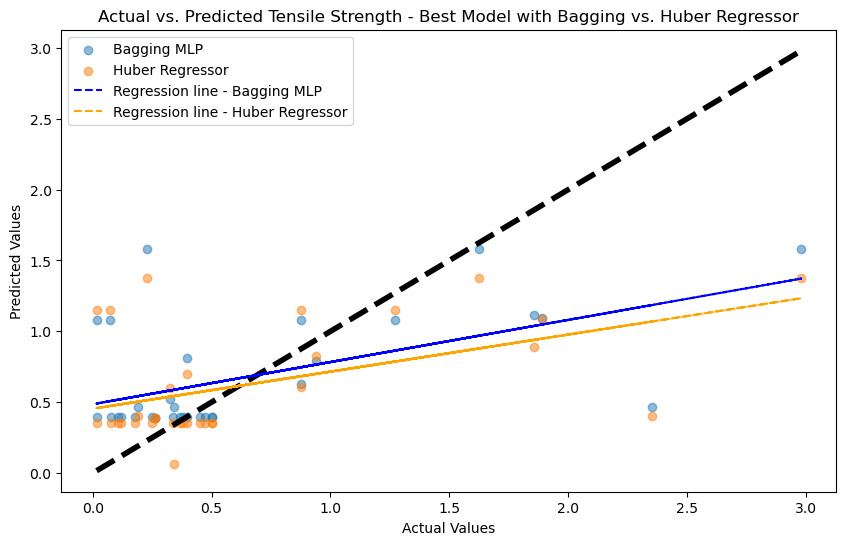

MSE for Huber Regressor: 0.39675661413211694


In [61]:
best_layers = (20, 5)
best_max_iter = 4000
output_dir = 'Images/Nickel/Tensile Strength'
target_variable = "Tensile Strength"
results = compare_bagging_huber(X_train, y_train, X_test, y_test, best_layers, best_max_iter, output_dir, target_variable)
mse_huber = results['mse_huber']
actual = results['actual']
predbag = results['predbag']
predhuber = results['predhuber']
best_model = results['model']
print("MSE for Huber Regressor:", mse_huber)

Spearman's rank correlation coefficient: 0.4123077862578288
P-value of the correlation coefficient: 0.019028710787300045
Plot saved to Images/Nickel/Tensile Strength/Nickel_Tensile_Strength_BaggingMLP.png


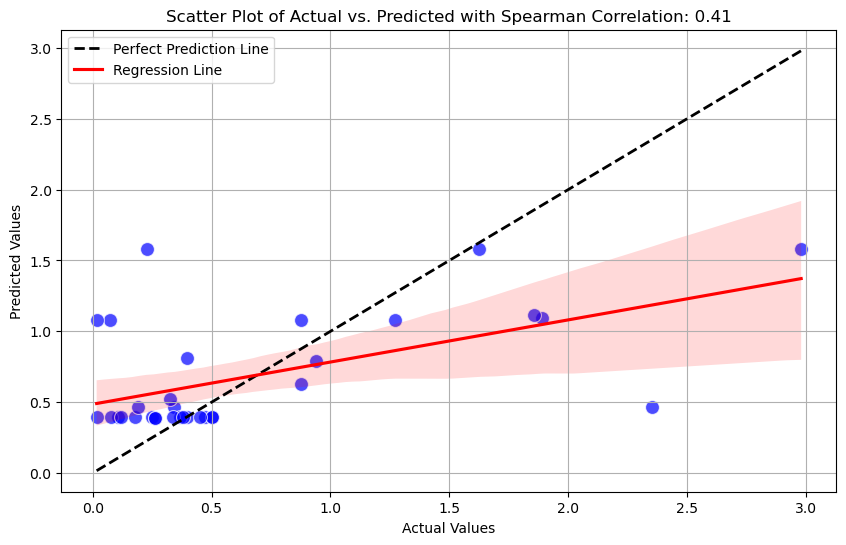

Spearman's rank correlation coefficient: 0.33736015983904166
P-value of the correlation coefficient: 0.05899243090757575
Plot saved to Images/Nickel/Tensile Strength/Nickel_Tensile_Strength_HuberMLP.png


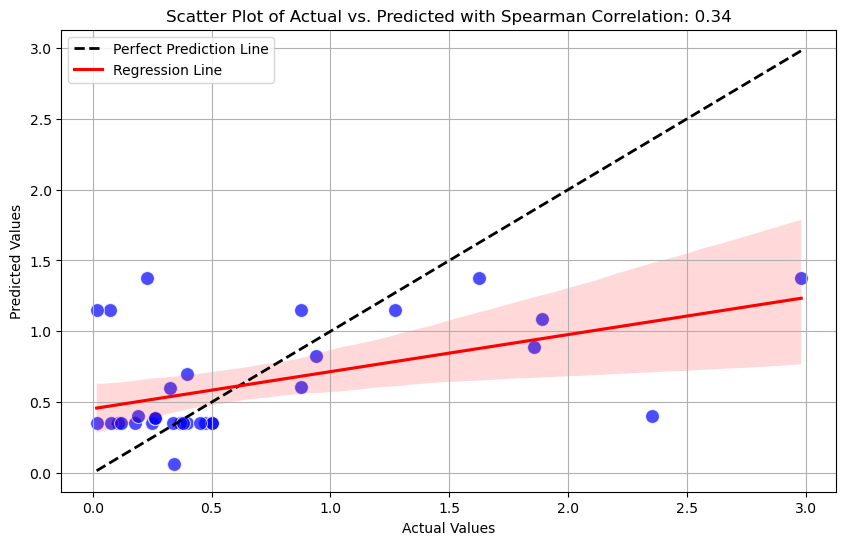

Bagging Model Spearman Correlation: 0.4123077862578288
Huber Model Spearman Correlation: 0.33736015983904166


In [62]:
# Example usage of the generalized function
output_dir = 'Images/Nickel/Tensile Strength'
actuals = actual  # Example actual values from your test set
preds_bagging = predbag  # Example prediction values from the Bagging model
preds_huber = predhuber  # Example prediction values from the Huber model

# For Bagging MLP
correlation_bagging = show_correlation("Bagging", output_dir, actuals, preds_bagging, "Tensile Strength")

# For Huber MLP
correlation_huber = show_correlation("Huber", output_dir, actuals, preds_huber, "Tensile Strength")

print("Bagging Model Spearman Correlation:", correlation_bagging)
print("Huber Model Spearman Correlation:", correlation_huber)

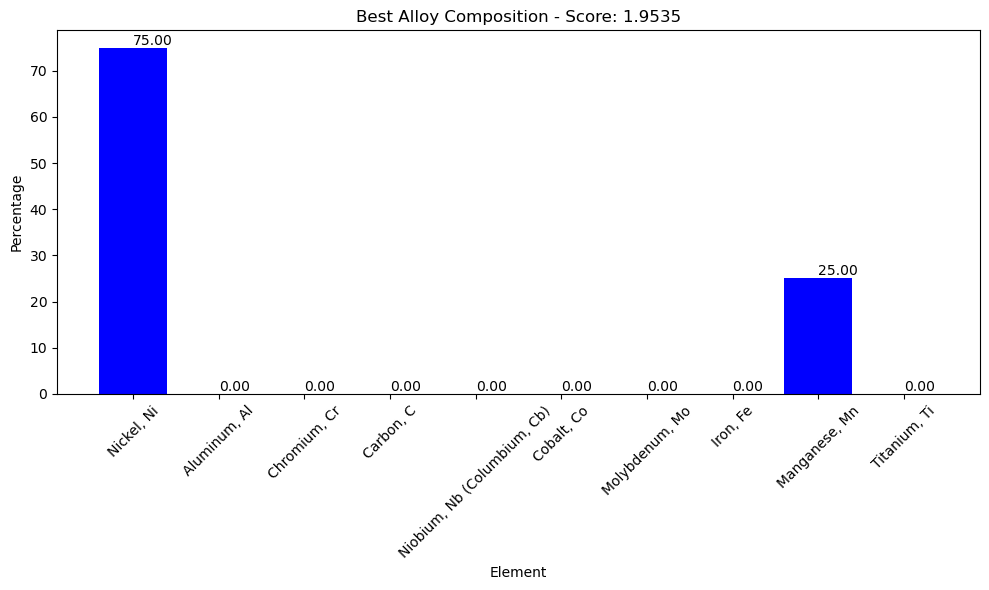

Best Composition: [7.50000000e+01 0.00000000e+00 0.00000000e+00 2.27688308e-12
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.75835937e-11
 2.50000010e+01 0.00000000e+00]
Best Score: 1.953486086564542


In [63]:
output_dir = 'Images/Nickel/Tensile Strength'
target_property = "Tensile Strength"
best_composition, best_score = optimize_alloy_composition(X_train, output_dir, target_property, metal)
print("Best Composition:", best_composition)
print("Best Score:", best_score)

## Specific Heat

### Data Preperation

In [64]:
# Assuming df1 is your DataFrame and it contains the columns 'Specific Heat' 
df['Specific Heat'] = df['Specific Heat'].apply(extract_numeric)

# List all columns to keep (metal percentages and Specific Heat)
columns_to_keep = ['Specific Heat'] + [col for col in df.columns if ',' in col]

# Create a new dataframe with only these columns
metals_and_heat = df[columns_to_keep]

# Check for missing values in the new dataset
missing_values_metals = metals_and_heat.isnull().sum()
missing_values_metals[missing_values_metals > 0], metals_and_heat.head()

(Series([], dtype: int64),
    Specific Heat  Aluminum, Al  Carbon, C  Chromium, Cr  Cobalt, Co  Iron, Fe  \
 0       0.714763           0.4      0.100          21.0         1.0       5.0   
 1       1.698169           1.6      0.020          18.0        12.0       2.0   
 2       0.714763           0.4      0.100          21.0         1.0       5.0   
 3       0.670069           0.8      0.080          17.0         1.0      17.0   
 4       0.116136           0.0      0.004          15.5         0.1       6.0   
 
    Manganese, Mn  Molybdenum, Mo  Nickel, Ni  Niobium, Nb (Columbium, Cb)  \
 0           0.50             9.0        62.0                         3.70   
 1           1.00             3.5        51.6                         0.00   
 2           0.50             9.0        62.0                         3.70   
 3           0.35             2.8        50.0                         4.75   
 4           0.15            16.0        59.0                         0.00   
 
    Silic

In [65]:
# Splitting the dataset into features and target variable
X = metals_and_heat.drop('Specific Heat', axis=1)
y = metals_and_heat['Specific Heat']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head(), y_train.head()

(     Aluminum, Al  Carbon, C  Chromium, Cr  Cobalt, Co  Iron, Fe  \
 60            0.0      0.025          19.0        33.0       1.0   
 115           0.8      0.080          17.0         1.0      17.0   
 2             0.4      0.100          21.0         1.0       5.0   
 123           0.4      0.100          21.0         1.0       5.0   
 45            0.4      0.100          21.0         1.0       5.0   
 
      Manganese, Mn  Molybdenum, Mo  Nickel, Ni  Niobium, Nb (Columbium, Cb)  \
 60            0.15             9.0        33.0                         0.00   
 115           0.35             2.8        50.0                         4.75   
 2             0.50             9.0        62.0                         3.70   
 123           0.50             9.0        62.0                         3.70   
 45            0.50             9.0        62.0                         3.70   
 
      Silicon, Si  Titanium, Ti  Boron, B  Copper, Cu  Phosphorus, P  \
 60          0.15          1.0

### Feature Selection

#### Random Forest Feature Importance

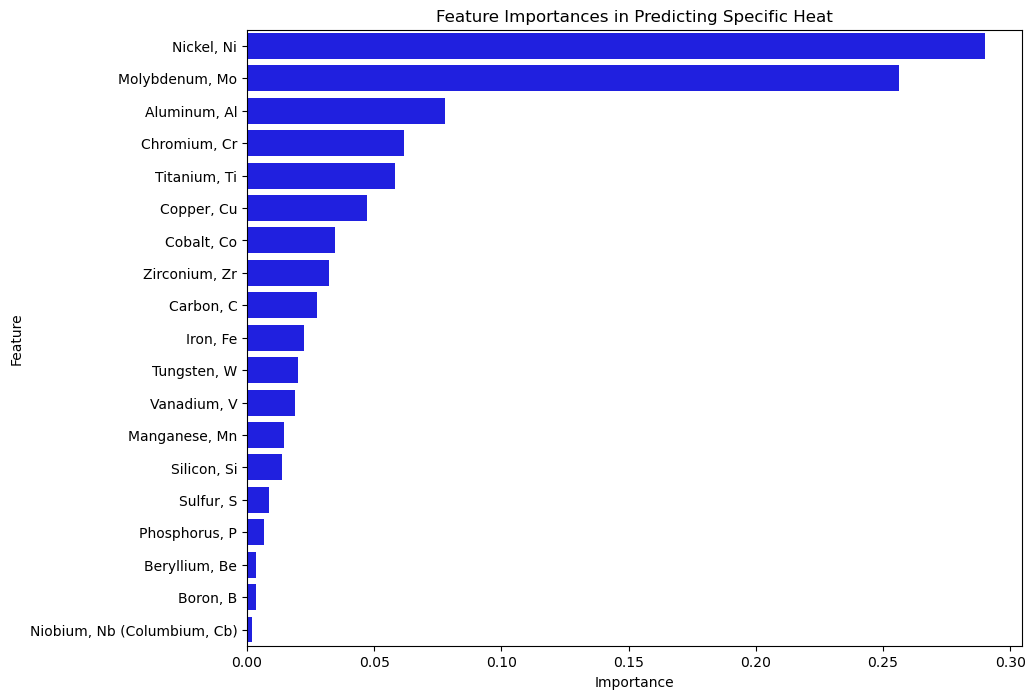

(0.5697717673845775,
                         Feature  Importance
 7                    Nickel, Ni    0.290164
 6                Molybdenum, Mo    0.256246
 0                  Aluminum, Al    0.077702
 2                  Chromium, Cr    0.061654
 10                 Titanium, Ti    0.058295
 12                   Copper, Cu    0.047261
 3                    Cobalt, Co    0.034756
 15                Zirconium, Zr    0.032102
 1                     Carbon, C    0.027579
 4                      Iron, Fe    0.022497
 16                  Tungsten, W    0.020005
 17                  Vanadium, V    0.018993
 5                 Manganese, Mn    0.014647
 9                   Silicon, Si    0.013869
 14                    Sulfur, S    0.008730
 13                Phosphorus, P    0.006530
 18                Beryllium, Be    0.003625
 11                     Boron, B    0.003579
 8   Niobium, Nb (Columbium, Cb)    0.001764)

In [66]:
output_dir = "Images/Nickel/Specific Heat"
train_and_evaluate_simple_rf(X_train, y_train, X_test, y_test, output_dir, "Specific Heat")

#### Combination Neural Network Feature Combination Importance

Processing new combinations...
Processing combination: ('Silicon, Si', 'Nickel, Ni')
Processing combination: ('Chromium, Cr', 'Nickel, Ni')
Processing combination: ('Aluminum, Al', 'Nickel, Ni')
Processing combination: ('Beryllium, Be', 'Nickel, Ni')
Processing combination: ('Molybdenum, Mo', 'Nickel, Ni')
Processing combination: ('Niobium, Nb (Columbium, Cb)', 'Nickel, Ni')
Processing combination: ('Iron, Fe', 'Nickel, Ni')
Processing combination: ('Boron, B', 'Nickel, Ni')
Processing combination: ('Manganese, Mn', 'Nickel, Ni')
Processing combination: ('Carbon, C', 'Nickel, Ni')
Processing combination: ('Cobalt, Co', 'Nickel, Ni')
Processing combination: ('Titanium, Ti', 'Nickel, Ni')
Processing combination: ('Copper, Cu', 'Nickel, Ni')
Processing combination: ('Phosphorus, P', 'Nickel, Ni')
Processing combination: ('Zirconium, Zr', 'Nickel, Ni')
Processing combination: ('Vanadium, V', 'Nickel, Ni')
Processing combination: ('Sulfur, S', 'Nickel, Ni')
Processing combination: ('Tungste

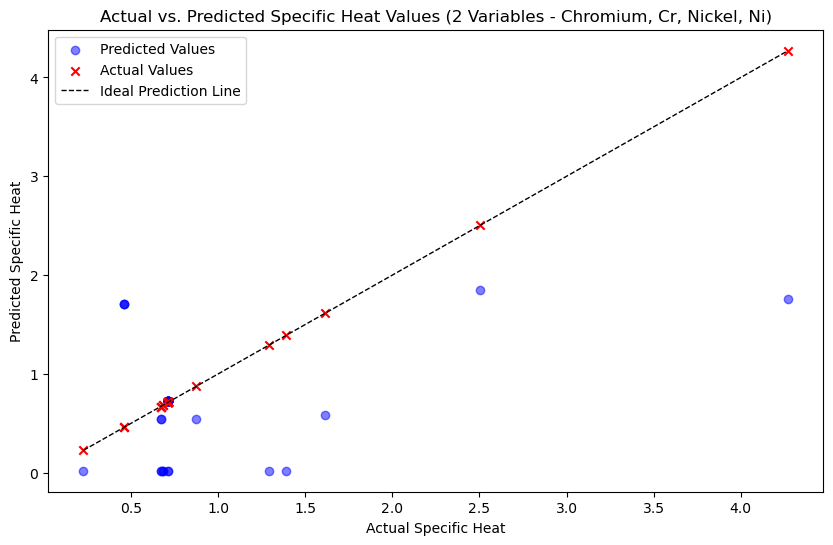

Best combination including Nickel, Ni: ('Chromium, Cr', 'Nickel, Ni'), MSE: 0.5247655510902405
Graph and LaTeX file saved with element pair in names: Images/Nickel/Specific Heat/Nickel_Specific_Heat_2VariableMLP.png and Images/Nickel/Specific Heat/Nickel_Specific_Heat_2VariableMLP.tex


In [67]:
top_features = ['Silicon, Si', 'Chromium, Cr', 'Aluminum, Al', 'Beryllium, Be', 'Molybdenum, Mo', 'Niobium, Nb (Columbium, Cb)', 
                'Iron, Fe', 'Boron, B', 'Manganese, Mn', 'Carbon, C', 'Cobalt, Co', 'Titanium, Ti', 'Copper, Cu', 'Phosphorus, P', 
                'Zirconium, Zr', 'Vanadium, V', 'Sulfur, S', 'Tungsten, W']
fixed_feature = 'Nickel, Ni'
file_path = 'Ni_model_data/mse_scores_with_nickel_2_features_heat.csv'
plotdir = 'Images/Nickel/Specific Heat'
process2VariableMLP(metals_and_heat, top_features, fixed_feature, "Specific Heat", file_path, plotdir)

Processing new combinations...
Processing combination: ('Molybdenum, Mo', 'Phosphorus, P', 'Nickel, Ni')
Processing combination: ('Molybdenum, Mo', 'Cobalt, Co', 'Nickel, Ni')
Processing combination: ('Molybdenum, Mo', 'Aluminum, Al', 'Nickel, Ni')
Processing combination: ('Molybdenum, Mo', 'Silicon, Si', 'Nickel, Ni')
Processing combination: ('Molybdenum, Mo', 'Titanium, Ti', 'Nickel, Ni')
Processing combination: ('Molybdenum, Mo', 'Copper, Cu', 'Nickel, Ni')
Processing combination: ('Molybdenum, Mo', 'Chromium, Cr', 'Nickel, Ni')
Processing combination: ('Molybdenum, Mo', 'Sulfur, S', 'Nickel, Ni')
Processing combination: ('Phosphorus, P', 'Cobalt, Co', 'Nickel, Ni')
Processing combination: ('Phosphorus, P', 'Aluminum, Al', 'Nickel, Ni')
Processing combination: ('Phosphorus, P', 'Silicon, Si', 'Nickel, Ni')
Processing combination: ('Phosphorus, P', 'Titanium, Ti', 'Nickel, Ni')
Processing combination: ('Phosphorus, P', 'Copper, Cu', 'Nickel, Ni')
Processing combination: ('Phosphorus,

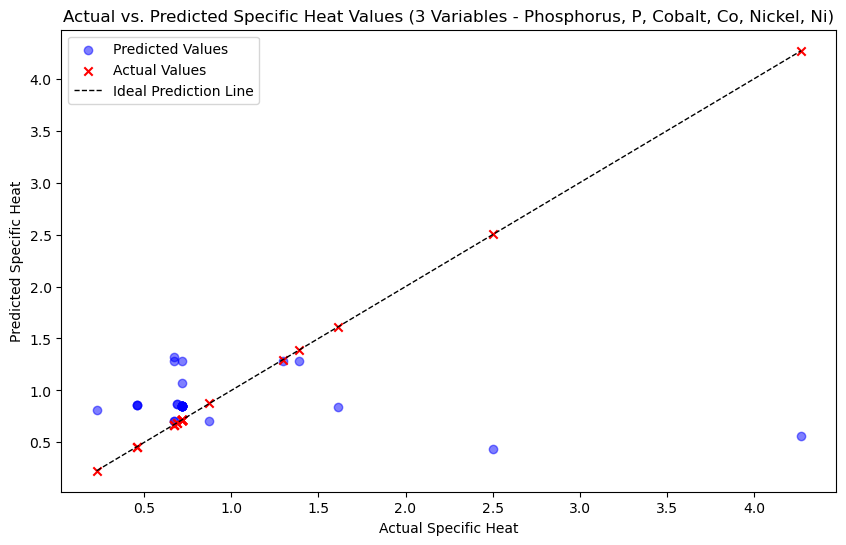

Best combination including Nickel, Ni: ('Phosphorus, P', 'Cobalt, Co', 'Nickel, Ni'), MSE: 0.5169121623039246
Graph and LaTeX file saved with element pair in names: Images/Nickel/Specific Heat/Nickel_Specific_Heat_3VariableMLP.png and Images/Nickel/Specific Heat/Nickel_Specific_Heat_3VariableMLP.tex


In [68]:
top_features = ['Molybdenum, Mo', 'Phosphorus, P', 'Cobalt, Co', 'Aluminum, Al', 'Silicon, Si', 'Titanium, Ti', 'Copper, Cu', 'Chromium, Cr', 'Sulfur, S']
fixed_feature = 'Nickel, Ni'
file_path = 'Ni_model_data/mse_scores_with_nickel_3_features_heat.csv'
plotdir = 'Images/Nickel/Specific Heat'
process3VariableMLP(metals_and_heat, top_features, fixed_feature, "Specific Heat", file_path, plotdir)

#### Correlation Matrix 

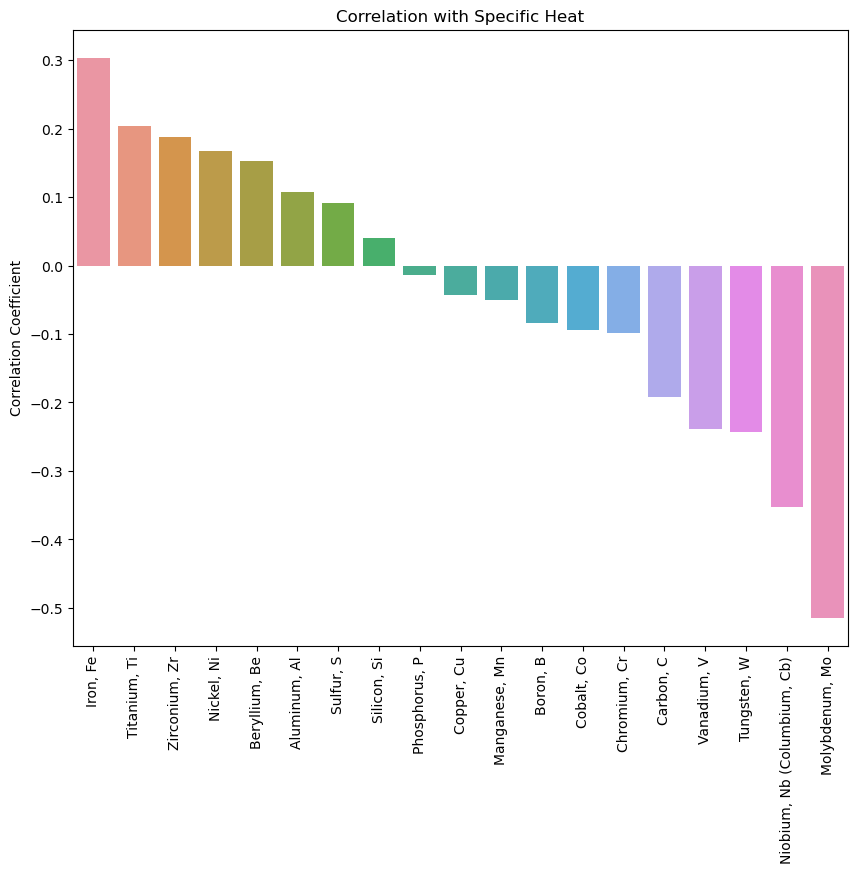

Iron, Fe                       0.303693
Titanium, Ti                   0.203835
Zirconium, Zr                  0.188376
Nickel, Ni                     0.166977
Beryllium, Be                  0.153122
Aluminum, Al                   0.106853
Sulfur, S                      0.091787
Silicon, Si                    0.039636
Phosphorus, P                 -0.014381
Copper, Cu                    -0.043350
Manganese, Mn                 -0.051065
Boron, B                      -0.084298
Cobalt, Co                    -0.094353
Chromium, Cr                  -0.098290
Carbon, C                     -0.191290
Vanadium, V                   -0.239017
Tungsten, W                   -0.243705
Niobium, Nb (Columbium, Cb)   -0.352073
Molybdenum, Mo                -0.513993
Name: Specific Heat, dtype: float64

In [69]:
target_feature = "Specific Heat"
output_dir = "Images/Nickel/Specific Heat"
visualize_correlation(metals_and_heat, target_feature, output_dir)

#### Regression

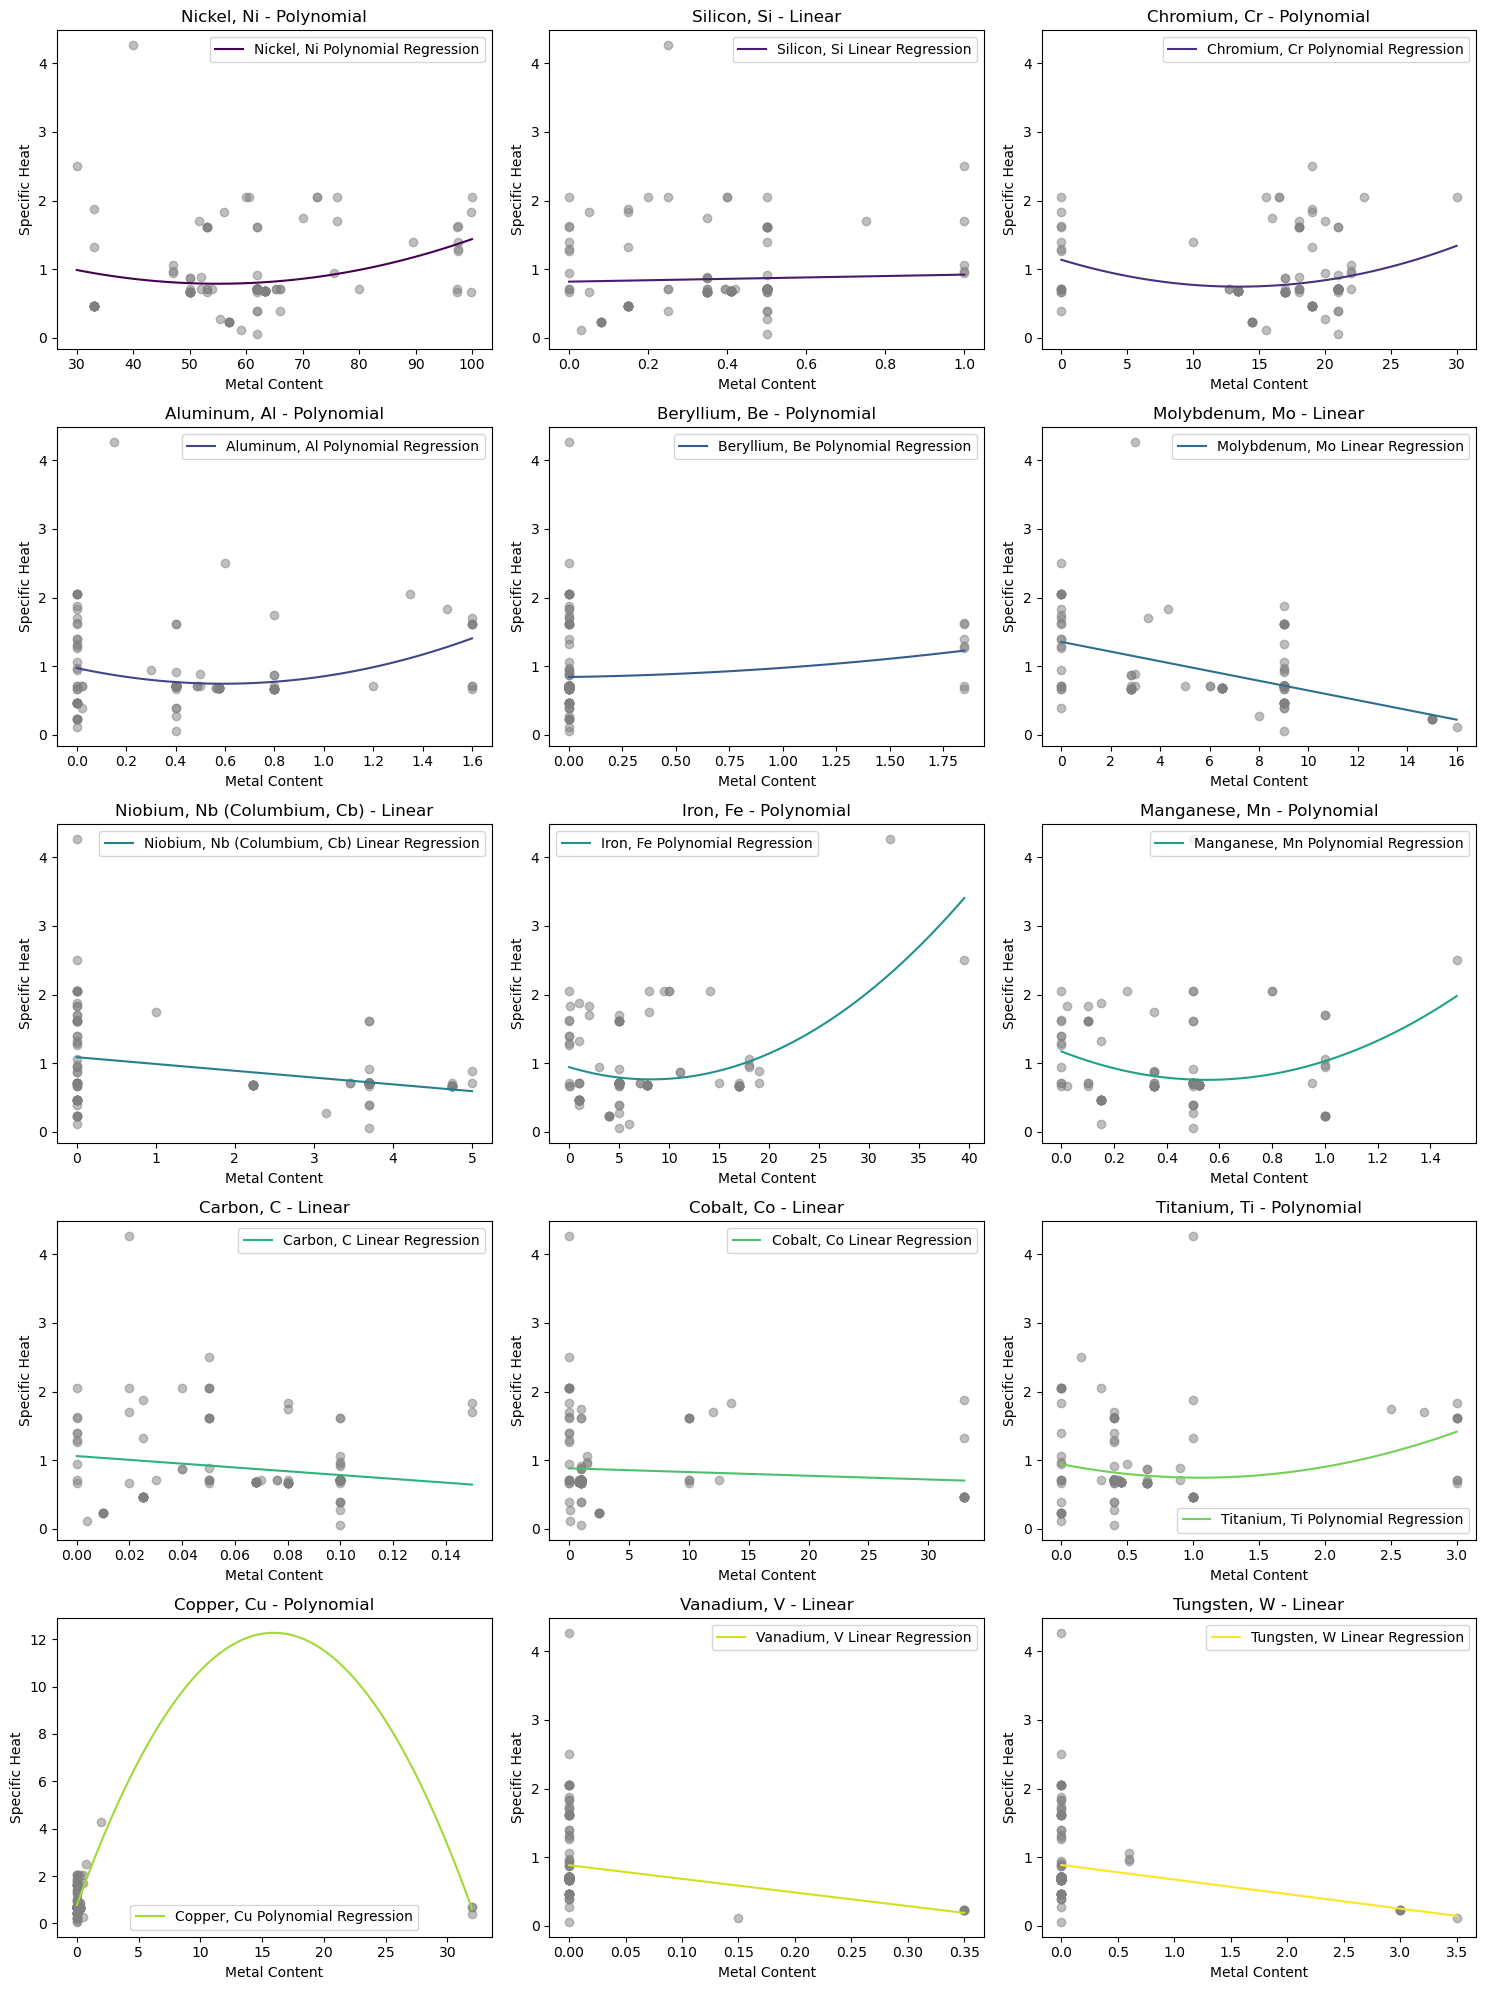

(                          Metal  Coefficient     Effect
 0                    Nickel, Ni     0.000321  Increases
 1                   Silicon, Si     0.102579  Increases
 2                  Chromium, Cr     0.002169  Increases
 3                  Aluminum, Al     0.651093  Increases
 4                 Beryllium, Be     0.086966  Increases
 5                Molybdenum, Mo    -0.070911  Decreases
 6   Niobium, Nb (Columbium, Cb)    -0.099039  Decreases
 7                      Iron, Fe     0.002692  Increases
 8                 Manganese, Mn     1.359148  Increases
 9                     Carbon, C    -2.769415  Decreases
 10                   Cobalt, Co    -0.005421  Decreases
 11                 Titanium, Ti     0.176721  Increases
 12                   Copper, Cu    -0.045226  Decreases
 13                  Vanadium, V    -1.984773  Decreases
 14                  Tungsten, W    -0.212098  Decreases,
 'Images/Nickel/Specific Heat/Nickel_Specific_Heat_IndividualElementRegression.png')

In [70]:
metals = ['Nickel, Ni', 'Silicon, Si', 'Chromium, Cr', 'Aluminum, Al', 'Beryllium, Be', 'Molybdenum, Mo', 'Niobium, Nb (Columbium, Cb)', 
                'Iron, Fe', 'Boron, B', 'Manganese, Mn', 'Carbon, C', 'Cobalt, Co', 'Titanium, Ti', 'Copper, Cu', 'Phosphorus, P', 
                'Zirconium, Zr', 'Vanadium, V', 'Sulfur, S', 'Tungsten, W']
target_feature = "Specific Heat"
plot_dir = "Images/Nickel/Specific Heat"
evaluate_and_visualize_impact(metals_and_heat, metals, target_feature, plot_dir)

In [71]:
## Splitting the DataFrame into positive and negative subsets
#positive_df = impact_summary[impact_summary['Coefficient'] > 0].copy()
#negative_df = impact_summary[impact_summary['Coefficient'] < 0].copy()
#
## Sorting each subset
#positive_df.sort_values(by='Coefficient', ascending=False, inplace=True)
#negative_df.sort_values(by='Coefficient', ascending=False, inplace=True)  # Sort negatives in descending order by value
#
## Concatenating back into a single DataFrame
#sorted_impact_summary = pd.concat([positive_df, negative_df], axis=0)
#
## Define colors based on coefficient sign and set edge colors for better visibility
#colors = ['green' if x > 0 else 'red' for x in sorted_impact_summary['Coefficient']]
#edge_colors = ['darkgreen' if x > 0 else 'darkred' for x in sorted_impact_summary['Coefficient']]
#
## Set up the plot
#plt.figure(figsize=(10, 8))
#bars = plt.barh(sorted_impact_summary['Metal'], sorted_impact_summary['Coefficient'], color=colors, edgecolor=edge_colors)
#plt.xlabel('Coefficient Value')
#plt.title('Impact of Each Metal on Specific Heat')
#
## Invert y-axis to have the largest impact at the top
#plt.gca().invert_yaxis()
#
## Add text labels to bars for exact coefficient values
#for bar, value in zip(bars, sorted_impact_summary['Coefficient']):
#    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{value:.2f}', va='center', 
#             ha='right' if value < 0 else 'left')
#
## Show the plot
#plt.show()
#
## Optionally, print the DataFrame for a tabular view
#print(sorted_impact_summary[['Metal', 'Coefficient', 'Effect']])

### <span style="color:lime">Optmizing Specific Heat</span>

#### <span style="color:red">Random Forest</span>

In [72]:
selected_features = ['Nickel, Ni', 'Molybdenum, Mo', 'Phosphorus, P', 'Cobalt, Co', 'Aluminum, Al', 'Silicon, Si', 'Titanium, Ti', 'Copper, Cu', 'Chromium, Cr', 'Sulfur, S']
target_variable = 'Specific Heat'
results = analyze_alloy_strength(metals_and_heat, selected_features, target_variable)
print(results)
model = results['model']

{'mse': 0.4222103598571039, 'rmse': 0.6497771616924558, 'max_youngs_modulus': 1.3992330679367941, 'strongest_composition': Nickel, Ni        97.5
Molybdenum, Mo     0.0
Phosphorus, P      0.0
Cobalt, Co         0.0
Aluminum, Al       0.0
Silicon, Si        0.0
Titanium, Ti       0.4
Copper, Cu         0.0
Chromium, Cr       0.0
Sulfur, S          0.0
Name: 108, dtype: float64, 'model': RandomForestRegressor(random_state=42)}


In [73]:
#output_path = "Ni_model_data/all_hypothetical_combinations_with_predictions_aluminum_heat.csv"
#metals = ['Molybdenum, Mo', 'Phosphorus, P', 'Cobalt, Co', 'Aluminum, Al', 'Silicon, Si', 'Titanium, Ti', 'Copper, Cu', 'Chromium, Cr', 'Sulfur, S']
#al_increments = np.arange(75, 101, 5)
#other_increments = np.arange(0, 26, 5)
#
#top_combinations = generate_and_predict_alloy_strength(model, output_path, metals, al_increments, other_increments, 'Specific Heat')
#print("Top 10 Yield Strength Combinations:")
#print(top_combinations.head(10))  # Print only the top 10

#### <span style="color:red">MLP</span>

In [74]:
selected_features = ['Nickel, Ni', 'Molybdenum, Mo', 'Phosphorus, P', 'Cobalt, Co', 'Aluminum, Al', 'Silicon, Si', 'Titanium, Ti', 'Copper, Cu', 'Chromium, Cr', 'Sulfur, S']
target_variable = 'Specific Heat'
layer_configurations = [
    (30, 3, 1), (40, 2), (10, 10), (3, 10, 2),
    (10,), (20,), (30,), (40,), (50,),
    (8,), (8, 8), (8, 5, 2),
    (5, 5), (10, 10), (20, 5), (5, 20),
    (15, 6), (6, 6), (6, 6, 2),
    (5,), (5, 10, 2), (10, 10), (5, 10),
    (2,), (2,2), (2,2,2), (2,2,2,2)
]
max_iter_options = [4000]
results_path = 'Ni_model_data/grid_search_nickel_heat_results.csv'

# Call the grid search function
result = perform_grid_search_nn(metals_and_heat, selected_features, target_variable, layer_configurations, max_iter_options, results_path)
X_train, X_test, y_train, y_test = result['X_train'], result['X_test'], result['y_train'], result['y_test']
grid_search_results = result['results_df']
print("Grid search results DataFrame:")
print(grid_search_results)

# Sort the results DataFrame by the 'MSE' column in ascending order
sorted_results = grid_search_results.sort_values(by='MSE', ascending=True)

# Print the sorted results
print("Sorted Grid Search Results by MSE:")
print(sorted_results)

Configuration: Layers=(30, 3, 1), Max_iter=4000, MSE=0.5111906726101246
Configuration: Layers=(40, 2), Max_iter=4000, MSE=0.6638979231310885
Configuration: Layers=(10, 10), Max_iter=4000, MSE=0.7604498405262042
Configuration: Layers=(3, 10, 2), Max_iter=4000, MSE=0.6031186129367085
Configuration: Layers=(10,), Max_iter=4000, MSE=0.7162277590233301
Configuration: Layers=(20,), Max_iter=4000, MSE=0.5464888940914945
Configuration: Layers=(30,), Max_iter=4000, MSE=0.6863231882599536
Configuration: Layers=(40,), Max_iter=4000, MSE=0.5300221474298461
Configuration: Layers=(50,), Max_iter=4000, MSE=0.700622077758049
Configuration: Layers=(8,), Max_iter=4000, MSE=0.5932325334311178
Configuration: Layers=(8, 8), Max_iter=4000, MSE=0.6269384212226982
Configuration: Layers=(8, 5, 2), Max_iter=4000, MSE=0.5413495151310048
Configuration: Layers=(5, 5), Max_iter=4000, MSE=0.5337644197705684
Configuration: Layers=(10, 10), Max_iter=4000, MSE=0.7604498405262042
Configuration: Layers=(20, 5), Max_iter=

/Users/lukerickard/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4000) reached and the optimization hasn't converged yet.
  warnings.warn(


Configuration: Layers=(2,), Max_iter=4000, MSE=0.5644354908330543
Configuration: Layers=(2, 2), Max_iter=4000, MSE=0.549327882508633
Configuration: Layers=(2, 2, 2), Max_iter=4000, MSE=0.5259983446291078
Configuration: Layers=(2, 2, 2, 2), Max_iter=4000, MSE=0.5300621851141367
Grid search results saved to: Ni_model_data/grid_search_nickel_heat_results.csv
Best Configuration: Layers=(20, 5), Max_iter=4000, Best MSE=0.44960161415440447
Grid search results DataFrame:
          Layers  Max_iter       MSE
0     (30, 3, 1)      4000  0.511191
1        (40, 2)      4000  0.663898
2       (10, 10)      4000  0.760450
3     (3, 10, 2)      4000  0.603119
4          (10,)      4000  0.716228
5          (20,)      4000  0.546489
6          (30,)      4000  0.686323
7          (40,)      4000  0.530022
8          (50,)      4000  0.700622
9           (8,)      4000  0.593233
10        (8, 8)      4000  0.626938
11     (8, 5, 2)      4000  0.541350
12        (5, 5)      4000  0.533764
13      (10, 

/Users/lukerickard/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/var/folders/23/prfh1l6n7pxb55snfqs3862m0000gn/T/ipykernel_65554/4064323175.py:46: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(y_test, p(y_test), "r--", label='Regression line - Bagging MLP', color='blue' )
/var/folders/23/prfh1l6n7pxb55snfqs3862m0000gn/T/ipykernel_65554/4064323175.py:51: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  plt.plot(y_te

Mean Squared Error - Huber Regressor: 0.5634759586014311


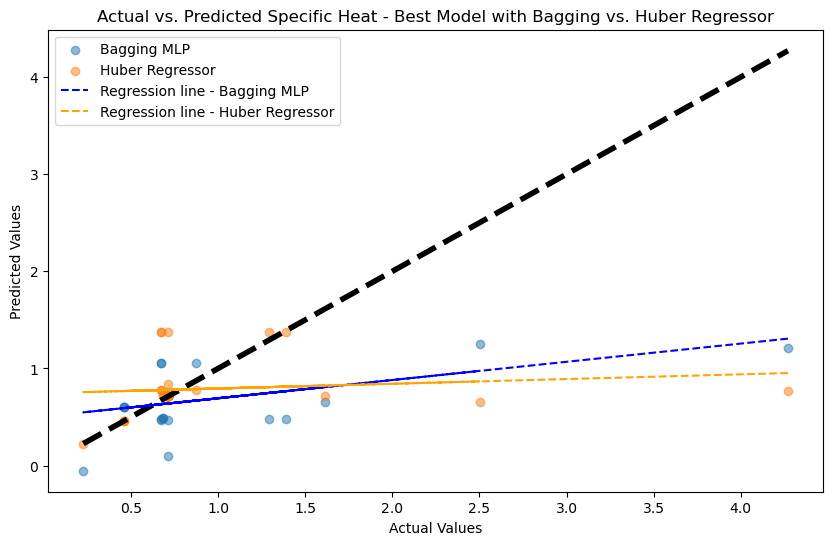

MSE for Huber Regressor: 0.5634759586014311


In [75]:
best_layers = (20, 5)
best_max_iter = 4000
output_dir = 'Images/Nickel/Specific Heat'
target_variable = "Specific Heat"
results = compare_bagging_huber(X_train, y_train, X_test, y_test, best_layers, best_max_iter, output_dir, target_variable)
mse_huber = results['mse_huber']
actual = results['actual']
predbag = results['predbag']
predhuber = results['predhuber']
best_model = results['model']
print("MSE for Huber Regressor:", mse_huber)

Spearman's rank correlation coefficient: 0.35965206030407176
P-value of the correlation coefficient: 0.04319968681051518
Plot saved to Images/Nickel/Specific Heat/Nickel_Specific_Heat_BaggingMLP.png


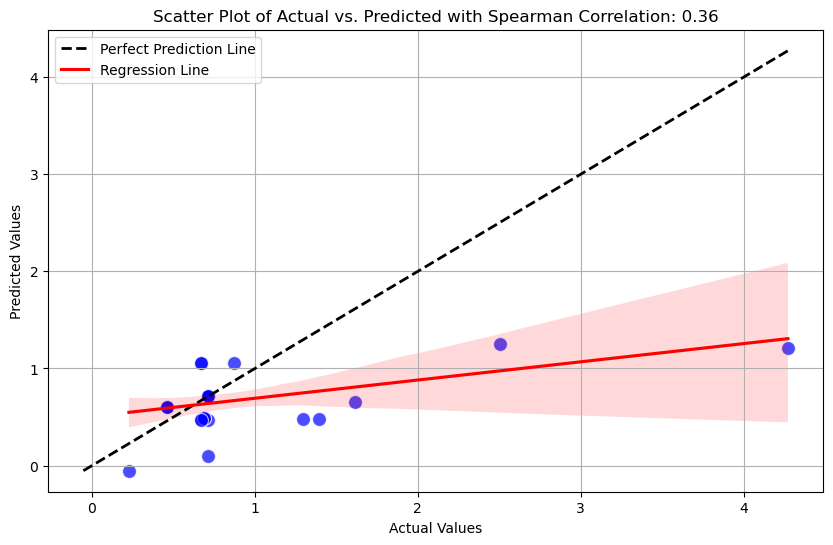

Spearman's rank correlation coefficient: 0.202906952447648
P-value of the correlation coefficient: 0.2653721295914586
Plot saved to Images/Nickel/Specific Heat/Nickel_Specific_Heat_HuberMLP.png


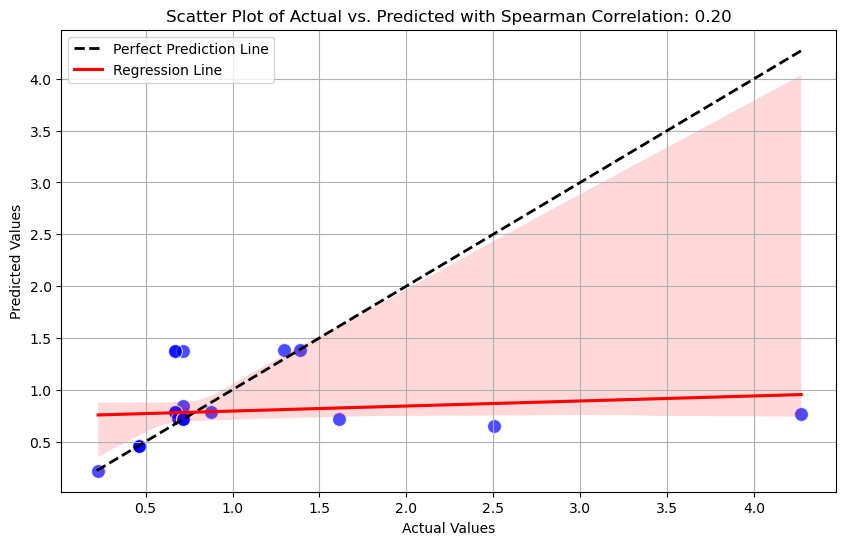

Bagging Model Spearman Correlation: 0.35965206030407176
Huber Model Spearman Correlation: 0.202906952447648


In [76]:
# Example usage of the generalized function
output_dir = 'Images/Nickel/Specific Heat'
actuals = actual  # Example actual values from your test set
preds_bagging = predbag  # Example prediction values from the Bagging model
preds_huber = predhuber  # Example prediction values from the Huber model

# For Bagging MLP
correlation_bagging = show_correlation("Bagging", output_dir, actuals, preds_bagging, "Specific Heat")

# For Huber MLP
correlation_huber = show_correlation("Huber", output_dir, actuals, preds_huber, "Specific Heat")

print("Bagging Model Spearman Correlation:", correlation_bagging)
print("Huber Model Spearman Correlation:", correlation_huber)

Spearman's rank correlation coefficient: 0.35965206030407176
P-value of the correlation coefficient: 0.04319968681051518
Plot saved to Images/Nickel/Specific Heat/Nickel_Specific_Heat_BaggingMLP.png


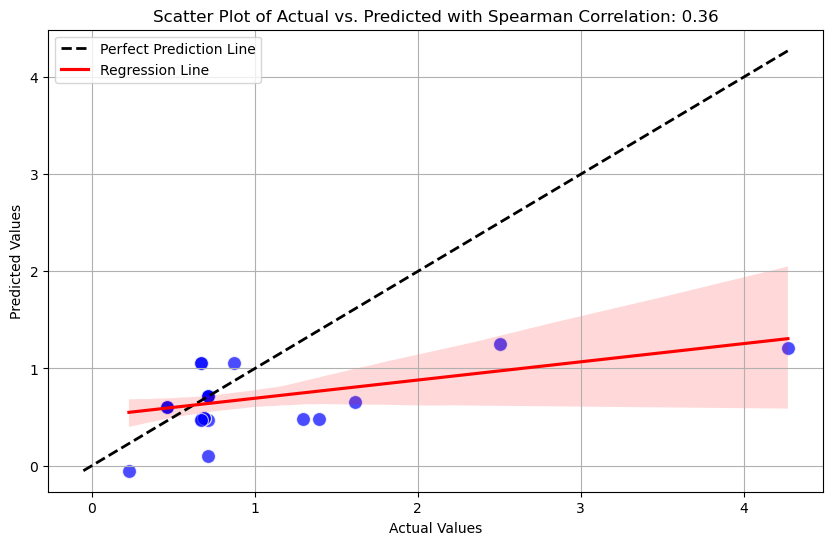

Spearman's rank correlation coefficient: 0.202906952447648
P-value of the correlation coefficient: 0.2653721295914586
Plot saved to Images/Nickel/Specific Heat/Nickel_Specific_Heat_HuberMLP.png


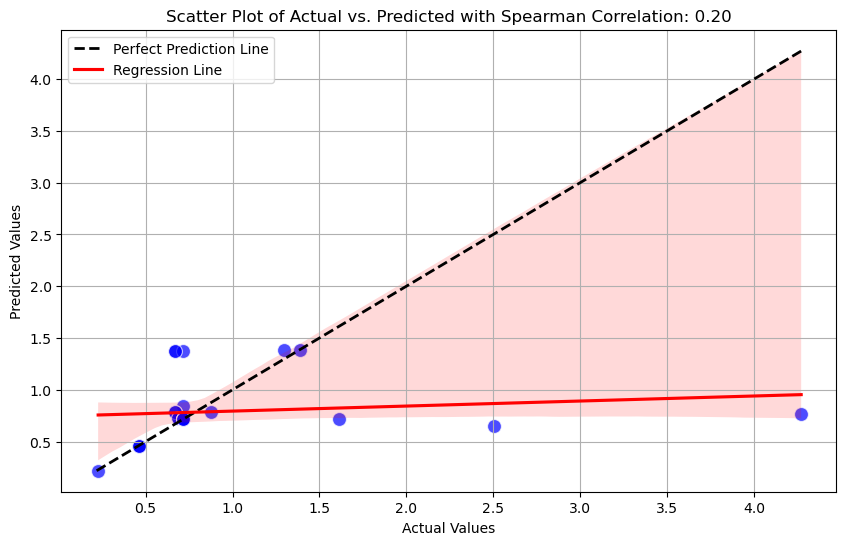

Bagging Model Spearman Correlation: 0.35965206030407176
Huber Model Spearman Correlation: 0.202906952447648


In [77]:
# Example usage of the generalized function
output_dir = 'Images/Nickel/Specific Heat'
actuals = actual  # Example actual values from your test set
preds_bagging = predbag  # Example prediction values from the Bagging model
preds_huber = predhuber  # Example prediction values from the Huber model

# For Bagging MLP
correlation_bagging = show_correlation("Bagging", output_dir, actuals, preds_bagging, "Specific Heat")

# For Huber MLP
correlation_huber = show_correlation("Huber", output_dir, actuals, preds_huber, "Specific Heat")

print("Bagging Model Spearman Correlation:", correlation_bagging)
print("Huber Model Spearman Correlation:", correlation_huber)

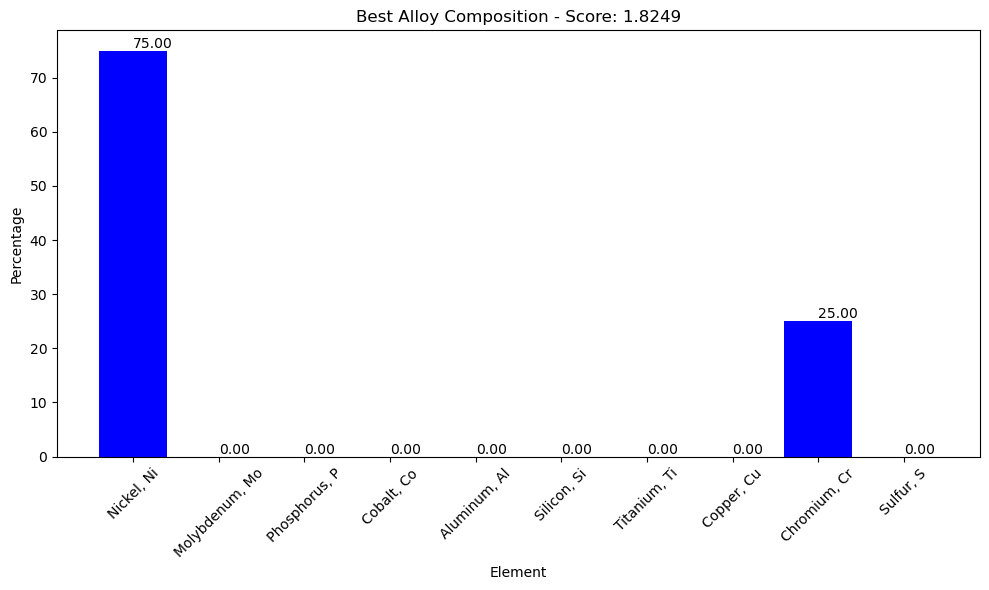

Best Composition: [7.50000000e+01 0.00000000e+00 8.82133620e-14 7.50880721e-15
 0.00000000e+00 0.00000000e+00 8.37237453e-12 0.00000000e+00
 2.50000000e+01 2.83898519e-15]
Best Score: 1.8248720597730852


In [78]:
output_dir = 'Images/Nickel/Specific Heat'
target_property = "Specific Heat"
best_composition, best_score = optimize_alloy_composition(X_train, output_dir, target_property, metal)
print("Best Composition:", best_composition)
print("Best Score:", best_score)

## Coefficient of Thermal Expansion

### Data Preperation

In [79]:
# Assuming df1 is your DataFrame and it contains the columns 'Coefficient of Thermal Expansion''
df['Coefficient of Thermal Expansion'] = df['Coefficient of Thermal Expansion'].apply(extract_numeric)

# List all columns to keep (metal percentages and Coefficient of Thermal Expansion)
columns_to_keep = ['Coefficient of Thermal Expansion'] + [col for col in df.columns if ',' in col]

# Create a new dataframe with only these columns
metals_and_thermalE = df[columns_to_keep]

# Check for missing values in the new dataset
missing_values_metals = metals_and_thermalE.isnull().sum()
missing_values_metals[missing_values_metals > 0], metals_and_thermalE.head()

(Series([], dtype: int64),
    Coefficient of Thermal Expansion  Aluminum, Al  Carbon, C  Chromium, Cr  \
 0                          0.267663           0.4      0.100          21.0   
 1                          0.527369           1.6      0.020          18.0   
 2                          0.596916           0.4      0.100          21.0   
 3                          0.598240           0.8      0.080          17.0   
 4                          2.849458           0.0      0.004          15.5   
 
    Cobalt, Co  Iron, Fe  Manganese, Mn  Molybdenum, Mo  Nickel, Ni  \
 0         1.0       5.0           0.50             9.0        62.0   
 1        12.0       2.0           1.00             3.5        51.6   
 2         1.0       5.0           0.50             9.0        62.0   
 3         1.0      17.0           0.35             2.8        50.0   
 4         0.1       6.0           0.15            16.0        59.0   
 
    Niobium, Nb (Columbium, Cb)  Silicon, Si  Titanium, Ti  Boron, B 

In [80]:
# Splitting the dataset into features and target variable
X = metals_and_thermalE.drop('Coefficient of Thermal Expansion', axis=1)
y = metals_and_thermalE['Coefficient of Thermal Expansion']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head(), y_train.head()

(     Aluminum, Al  Carbon, C  Chromium, Cr  Cobalt, Co  Iron, Fe  \
 60            0.0      0.025          19.0        33.0       1.0   
 115           0.8      0.080          17.0         1.0      17.0   
 2             0.4      0.100          21.0         1.0       5.0   
 123           0.4      0.100          21.0         1.0       5.0   
 45            0.4      0.100          21.0         1.0       5.0   
 
      Manganese, Mn  Molybdenum, Mo  Nickel, Ni  Niobium, Nb (Columbium, Cb)  \
 60            0.15             9.0        33.0                         0.00   
 115           0.35             2.8        50.0                         4.75   
 2             0.50             9.0        62.0                         3.70   
 123           0.50             9.0        62.0                         3.70   
 45            0.50             9.0        62.0                         3.70   
 
      Silicon, Si  Titanium, Ti  Boron, B  Copper, Cu  Phosphorus, P  \
 60          0.15          1.0

### Feature Selection

#### Random Forest Feature Importance

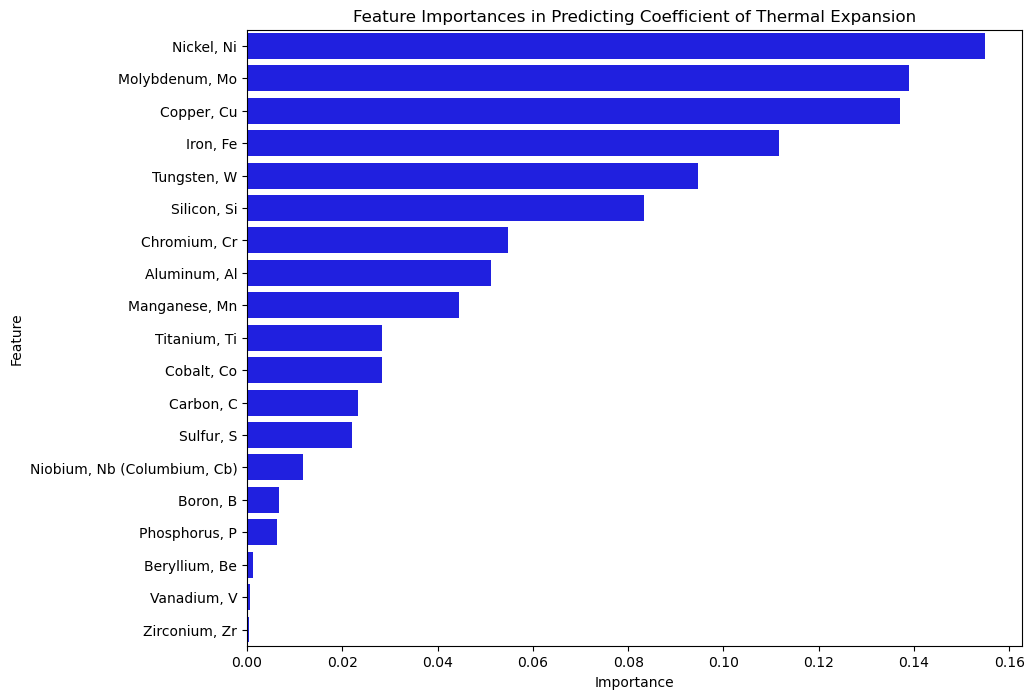

(0.26698290482534837,
                         Feature  Importance
 7                    Nickel, Ni    0.154936
 6                Molybdenum, Mo    0.139041
 12                   Copper, Cu    0.136994
 4                      Iron, Fe    0.111619
 16                  Tungsten, W    0.094651
 9                   Silicon, Si    0.083320
 2                  Chromium, Cr    0.054776
 0                  Aluminum, Al    0.051234
 5                 Manganese, Mn    0.044521
 10                 Titanium, Ti    0.028352
 3                    Cobalt, Co    0.028302
 1                     Carbon, C    0.023223
 14                    Sulfur, S    0.022060
 8   Niobium, Nb (Columbium, Cb)    0.011793
 11                     Boron, B    0.006701
 13                Phosphorus, P    0.006323
 18                Beryllium, Be    0.001177
 17                  Vanadium, V    0.000561
 15                Zirconium, Zr    0.000416)

In [81]:
output_dir = "Images/Nickel/COTE"
train_and_evaluate_simple_rf(X_train, y_train, X_test, y_test, output_dir, "Coefficient of Thermal Expansion")

#### Combination Neural Network Feature Combination Importance

Processing new combinations...
Processing combination: ('Silicon, Si', 'Nickel, Ni')
Processing combination: ('Chromium, Cr', 'Nickel, Ni')
Processing combination: ('Aluminum, Al', 'Nickel, Ni')
Processing combination: ('Beryllium, Be', 'Nickel, Ni')
Processing combination: ('Molybdenum, Mo', 'Nickel, Ni')
Processing combination: ('Niobium, Nb (Columbium, Cb)', 'Nickel, Ni')
Processing combination: ('Iron, Fe', 'Nickel, Ni')
Processing combination: ('Boron, B', 'Nickel, Ni')
Processing combination: ('Manganese, Mn', 'Nickel, Ni')
Processing combination: ('Carbon, C', 'Nickel, Ni')
Processing combination: ('Cobalt, Co', 'Nickel, Ni')
Processing combination: ('Titanium, Ti', 'Nickel, Ni')
Processing combination: ('Copper, Cu', 'Nickel, Ni')
Processing combination: ('Phosphorus, P', 'Nickel, Ni')
Processing combination: ('Zirconium, Zr', 'Nickel, Ni')
Processing combination: ('Vanadium, V', 'Nickel, Ni')
Processing combination: ('Sulfur, S', 'Nickel, Ni')
Processing combination: ('Tungste

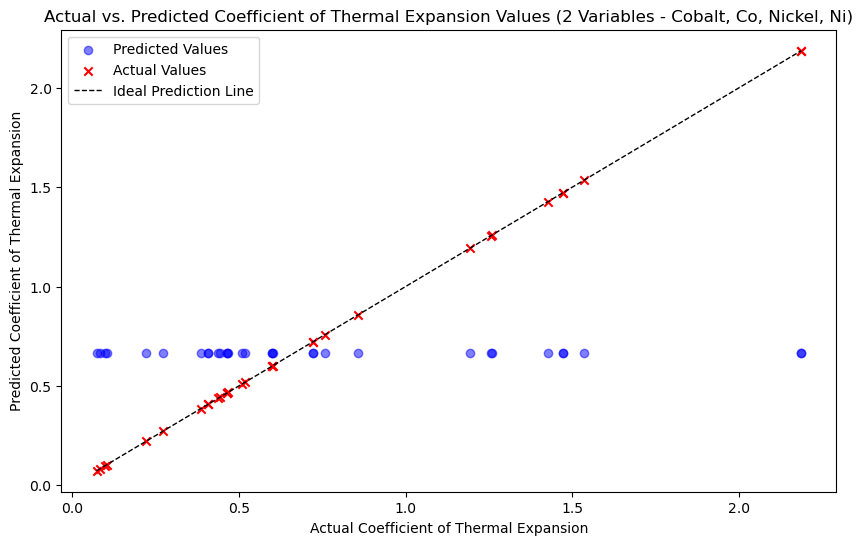

Best combination including Nickel, Ni: ('Cobalt, Co', 'Nickel, Ni'), MSE: 0.2590751051902771
Graph and LaTeX file saved with element pair in names: Images/Nickel/COTE/Nickel_Coefficient_of_Thermal_Expansion_2VariableMLP.png and Images/Nickel/COTE/Nickel_Coefficient_of_Thermal_Expansion_2VariableMLP.tex


In [82]:
top_features = [ 'Silicon, Si', 'Chromium, Cr', 'Aluminum, Al', 'Beryllium, Be', 'Molybdenum, Mo', 'Niobium, Nb (Columbium, Cb)', 
            'Iron, Fe', 'Boron, B', 'Manganese, Mn', 'Carbon, C', 'Cobalt, Co', 'Titanium, Ti', 'Copper, Cu', 'Phosphorus, P', 
            'Zirconium, Zr', 'Vanadium, V', 'Sulfur, S', 'Tungsten, W']
fixed_feature = 'Nickel, Ni'
file_path = 'Ni_model_data/mse_scores_with_nickel_2_features_COTE.csv'
plotdir = 'Images/Nickel/COTE'
process2VariableMLP(metals_and_thermalE, top_features, fixed_feature, "Coefficient of Thermal Expansion", file_path, plotdir)

Processing new combinations...
Processing combination: ('Chromium, Cr', 'Iron, Fe', 'Nickel, Ni')
Processing combination: ('Chromium, Cr', 'Copper, Cu', 'Nickel, Ni')
Processing combination: ('Chromium, Cr', 'Molybdenum, Mo', 'Nickel, Ni')
Processing combination: ('Chromium, Cr', 'Aluminum, Al', 'Nickel, Ni')
Processing combination: ('Chromium, Cr', 'Tungsten, W', 'Nickel, Ni')
Processing combination: ('Chromium, Cr', 'Carbon, C', 'Nickel, Ni')
Processing combination: ('Chromium, Cr', 'Silicon, Si', 'Nickel, Ni')
Processing combination: ('Chromium, Cr', 'Manganese, Mn', 'Nickel, Ni')
Processing combination: ('Iron, Fe', 'Copper, Cu', 'Nickel, Ni')
Processing combination: ('Iron, Fe', 'Molybdenum, Mo', 'Nickel, Ni')
Processing combination: ('Iron, Fe', 'Aluminum, Al', 'Nickel, Ni')
Processing combination: ('Iron, Fe', 'Tungsten, W', 'Nickel, Ni')
Processing combination: ('Iron, Fe', 'Carbon, C', 'Nickel, Ni')
Processing combination: ('Iron, Fe', 'Silicon, Si', 'Nickel, Ni')
Processing c

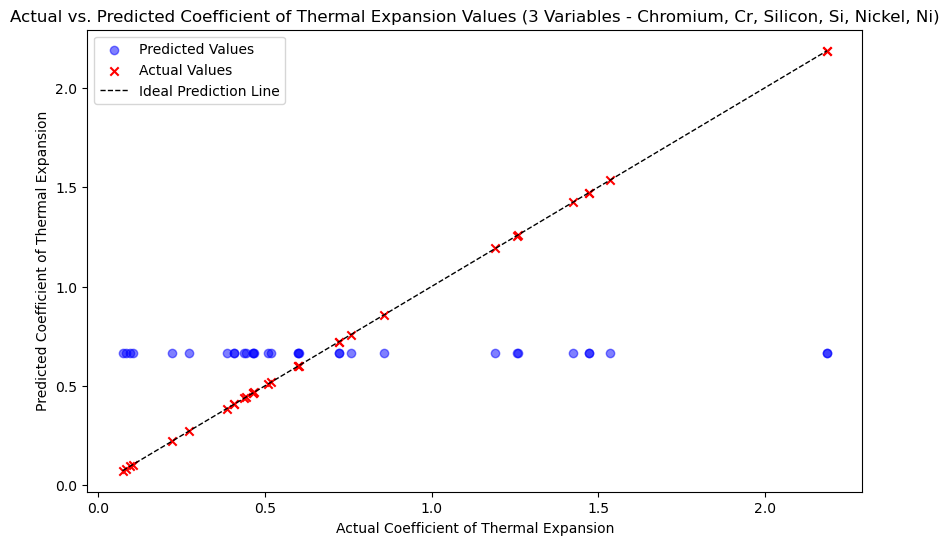

Best combination including Nickel, Ni: ('Chromium, Cr', 'Silicon, Si', 'Nickel, Ni'), MSE: 0.26633673906326294
Graph and LaTeX file saved with element pair in names: Images/Nickel/COTE/Nickel_Coefficient_of_Thermal_Expansion_3VariableMLP.png and Images/Nickel/COTE/Nickel_Coefficient_of_Thermal_Expansion_3VariableMLP.tex


In [83]:
top_features = ['Chromium, Cr', 'Iron, Fe', 'Copper, Cu', 'Molybdenum, Mo', 'Aluminum, Al', 'Tungsten, W', 'Carbon, C', 'Silicon, Si', 'Manganese, Mn']
fixed_feature = 'Nickel, Ni'
file_path = 'Ni_model_data/mse_scores_with_nickel_3_features_COTE.csv'
plotdir = 'Images/Nickel/COTE'
process3VariableMLP(metals_and_thermalE, top_features, fixed_feature, "Coefficient of Thermal Expansion", file_path, plotdir)

#### Correlation Matrix 

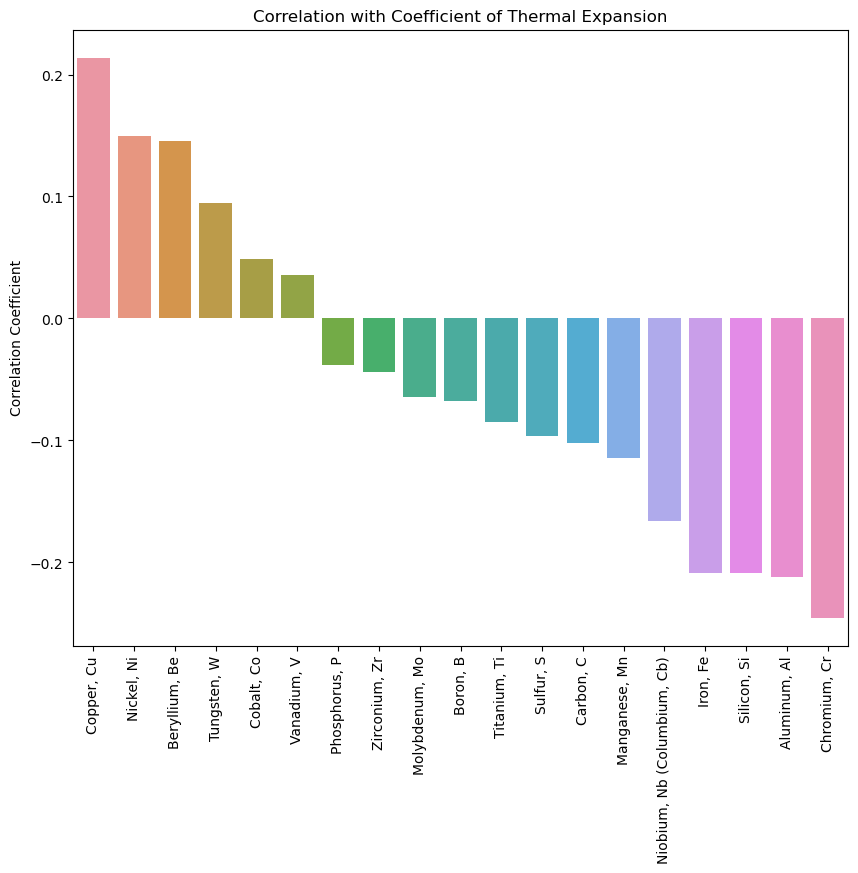

Copper, Cu                     0.213955
Nickel, Ni                     0.150002
Beryllium, Be                  0.145234
Tungsten, W                    0.095036
Cobalt, Co                     0.048643
Vanadium, V                    0.035364
Phosphorus, P                 -0.037813
Zirconium, Zr                 -0.043626
Molybdenum, Mo                -0.064650
Boron, B                      -0.067322
Titanium, Ti                  -0.084611
Sulfur, S                     -0.096031
Carbon, C                     -0.102487
Manganese, Mn                 -0.114581
Niobium, Nb (Columbium, Cb)   -0.165951
Iron, Fe                      -0.208658
Silicon, Si                   -0.208938
Aluminum, Al                  -0.212416
Chromium, Cr                  -0.245275
Name: Coefficient of Thermal Expansion, dtype: float64

In [84]:
target_feature = "Coefficient of Thermal Expansion"
output_dir = "Images/Nickel/COTE"
visualize_correlation(metals_and_thermalE, target_feature, output_dir)

#### Regression

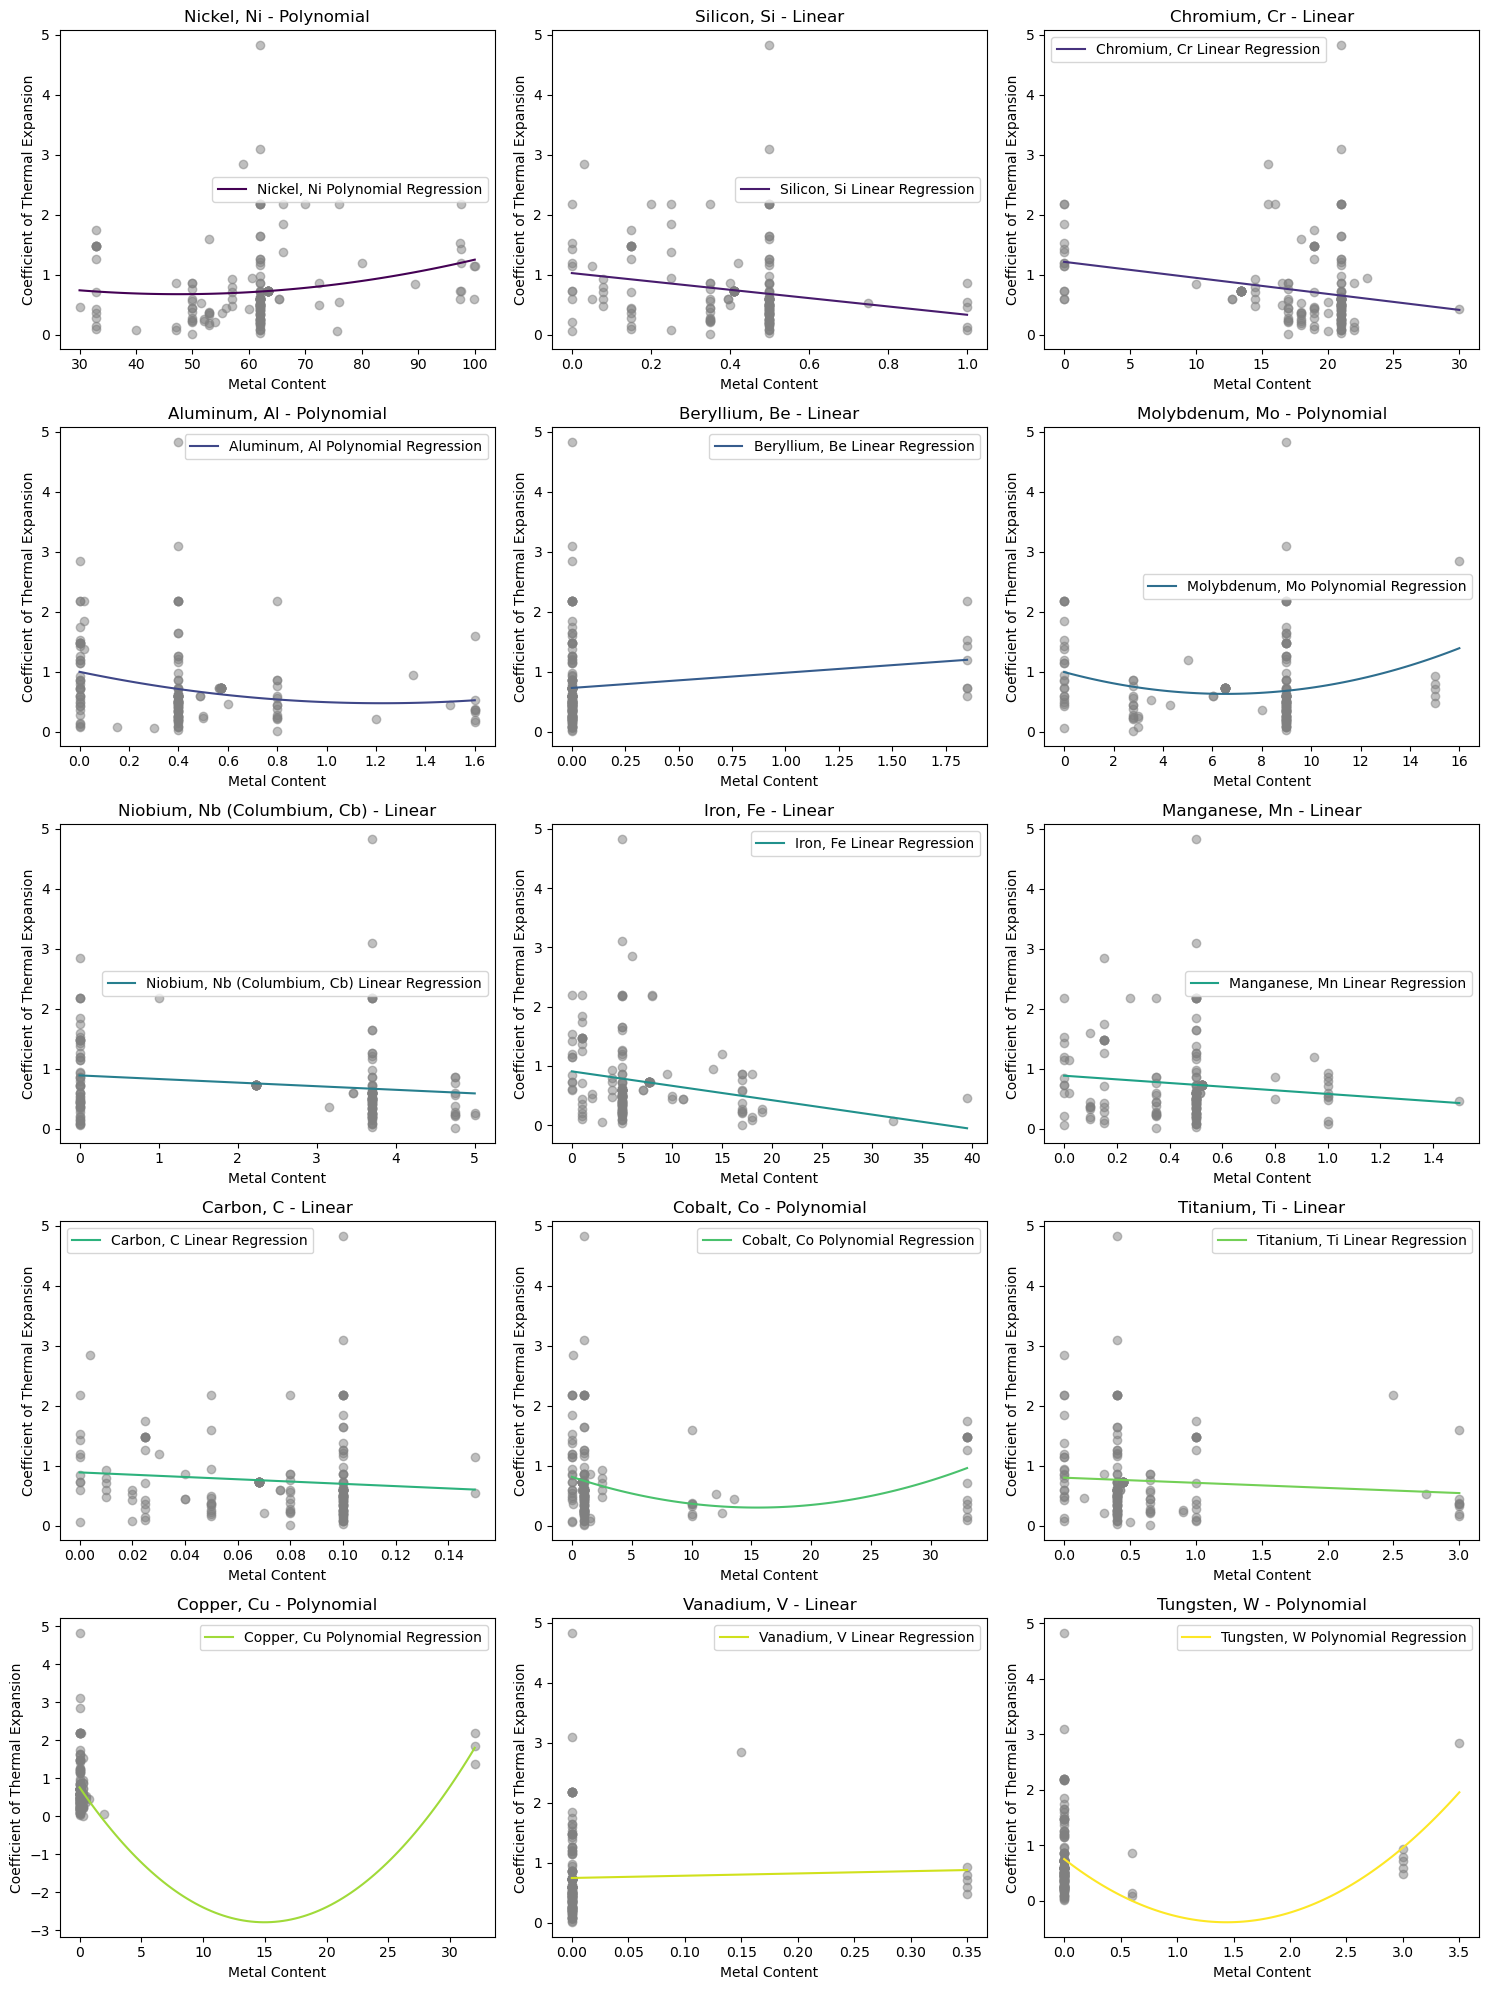

(                          Metal  Coefficient     Effect
 0                    Nickel, Ni     0.000209  Increases
 1                   Silicon, Si    -0.694448  Decreases
 2                  Chromium, Cr    -0.026692  Decreases
 3                  Aluminum, Al     0.349167  Increases
 4                 Beryllium, Be     0.253241  Increases
 5                Molybdenum, Mo     0.008505  Increases
 6   Niobium, Nb (Columbium, Cb)    -0.059953  Decreases
 7                      Iron, Fe    -0.024299  Decreases
 8                 Manganese, Mn    -0.303755  Decreases
 9                     Carbon, C    -1.905561  Decreases
 10                   Cobalt, Co     0.002139  Increases
 11                 Titanium, Ti    -0.085456  Decreases
 12                   Copper, Cu     0.015843  Increases
 13                  Vanadium, V     0.377138  Increases
 14                  Tungsten, W     0.551384  Increases,
 'Images/Aluminum/COTE/Nickel_Coefficient_of_Thermal_Expansion_IndividualElementRegress

In [85]:
metals = ['Nickel, Ni', 'Silicon, Si', 'Chromium, Cr', 'Aluminum, Al', 'Beryllium, Be', 'Molybdenum, Mo', 'Niobium, Nb (Columbium, Cb)', 
            'Iron, Fe', 'Boron, B', 'Manganese, Mn', 'Carbon, C', 'Cobalt, Co', 'Titanium, Ti', 'Copper, Cu', 'Phosphorus, P', 
            'Zirconium, Zr', 'Vanadium, V', 'Sulfur, S', 'Tungsten, W']
target_feature = "Coefficient of Thermal Expansion"
plot_dir = "Images/Aluminum/COTE"
evaluate_and_visualize_impact(metals_and_thermalE, metals, target_feature, plot_dir)

In [86]:
## Splitting the DataFrame into positive and negative subsets
#positive_df = impact_summary[impact_summary['Coefficient'] > 0].copy()
#negative_df = impact_summary[impact_summary['Coefficient'] < 0].copy()
#
## Sorting each subset
#positive_df.sort_values(by='Coefficient', ascending=False, inplace=True)
#negative_df.sort_values(by='Coefficient', ascending=False, inplace=True)  # Sort negatives in descending order by value
#
## Concatenating back into a single DataFrame
#sorted_impact_summary = pd.concat([positive_df, negative_df], axis=0)
#
## Define colors based on coefficient sign and set edge colors for better visibility
#colors = ['green' if x > 0 else 'red' for x in sorted_impact_summary['Coefficient']]
#edge_colors = ['darkgreen' if x > 0 else 'darkred' for x in sorted_impact_summary['Coefficient']]
#
## Set up the plot
#plt.figure(figsize=(10, 8))
#bars = plt.barh(sorted_impact_summary['Metal'], sorted_impact_summary['Coefficient'], color=colors, edgecolor=edge_colors)
#plt.xlabel('Coefficient Value')
#plt.title('Impact of Each Metal on Coefficient of Thermal Expansion')
#
## Invert y-axis to have the largest impact at the top
#plt.gca().invert_yaxis()
#
## Add text labels to bars for exact coefficient values
#for bar, value in zip(bars, sorted_impact_summary['Coefficient']):
#    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{value:.2f}', va='center', 
#             ha='right' if value < 0 else 'left')
#
## Show the plot
#plt.show()
#
## Optionally, print the DataFrame for a tabular view
#print(sorted_impact_summary[['Metal', 'Coefficient', 'Effect']])

### <span style="color:lime">Optimizing Thermal Expansion</span>

#### <span style="color:red">Random Forest</span>

In [87]:
selected_features = ['Nickel, Ni', 'Chromium, Cr', 'Iron, Fe', 'Copper, Cu', 'Molybdenum, Mo', 'Aluminum, Al', 'Tungsten, W', 'Carbon, C', 'Silicon, Si', 'Manganese, Mn']
target_variable = 'Coefficient of Thermal Expansion'
results = analyze_alloy_strength(metals_and_thermalE, selected_features, target_variable)
print(results)
model = results['model']

{'mse': 0.19026546806338487, 'rmse': 0.43619430081488325, 'max_youngs_modulus': 1.3838859969853436, 'strongest_composition': Nickel, Ni        97.5
Chromium, Cr       0.0
Iron, Fe           0.0
Copper, Cu         0.0
Molybdenum, Mo     0.0
Aluminum, Al       0.0
Tungsten, W        0.0
Carbon, C          0.0
Silicon, Si        0.0
Manganese, Mn      0.0
Name: 108, dtype: float64, 'model': RandomForestRegressor(random_state=42)}


In [88]:
#output_path = "Ni_model_data/all_hypothetical_combinations_with_predictions_nickel_COTE.csv"
#metals = ['Chromium, Cr', 'Iron, Fe', 'Copper, Cu', 'Molybdenum, Mo', 'Aluminum, Al', 'Tungsten, W', 'Carbon, C', 'Silicon, Si', 'Manganese, Mn']
#al_increments = np.arange(75, 101, 5)
#other_increments = np.arange(0, 26, 5)
#
#top_combinations = generate_and_predict_alloy_strength(model, output_path, metals, al_increments, other_increments, 'Coefficient of Thermal Expansion')
#print("Top 10 Coefficient of Thermal Expansion Combinations:")
#print(top_combinations.head(10))  # Print only the top 10

#### <span style="color:red">MLP</span>

In [89]:
# Assuming metals_and_thermalE is preloaded with the relevant data
selected_features = ['Nickel, Ni', 'Chromium, Cr', 'Iron, Fe', 'Copper, Cu', 'Molybdenum, Mo', 'Aluminum, Al', 'Tungsten, W', 'Carbon, C', 'Silicon, Si', 'Manganese, Mn']
target_variable = 'Coefficient of Thermal Expansion'

layer_configurations = [
    (30, 3, 1), (40, 2), (10, 10), (3, 10, 2),
    (10,), (20,), (30,), (40,), (50,),
    (8,), (8, 8), (8, 5, 2),
    (5, 5), (10, 10), (20, 5), (5, 20),
    (15, 6), (6, 6), (6, 6, 2),
    (5,), (5, 10, 2), (10, 10), (5, 10),
    (2,), (2,2), (2,2,2), (2,2,2,2)
]
max_iter_options = [4000]
results_path = 'Ni_model_data/grid_search_nickel_COTE_results.csv'

# Call the grid search function
result = perform_grid_search_nn(metals_and_thermalE, selected_features, target_variable, layer_configurations, max_iter_options, results_path)
X_train, X_test, y_train, y_test = result['X_train'], result['X_test'], result['y_train'], result['y_test']
grid_search_results = result['results_df']
print("Grid search results DataFrame:")
print(grid_search_results)

# Sort the results DataFrame by the 'MSE' column in ascending order
sorted_results = grid_search_results.sort_values(by='MSE', ascending=True)

# Print the sorted results
print("Sorted Grid Search Results by MSE:")
print(sorted_results)

Configuration: Layers=(30, 3, 1), Max_iter=4000, MSE=0.2926685468604629
Configuration: Layers=(40, 2), Max_iter=4000, MSE=0.3268290924434346
Configuration: Layers=(10, 10), Max_iter=4000, MSE=0.790067256840523
Configuration: Layers=(3, 10, 2), Max_iter=4000, MSE=0.2769118202085852
Configuration: Layers=(10,), Max_iter=4000, MSE=0.2811552217286326
Configuration: Layers=(20,), Max_iter=4000, MSE=0.3305642551344091
Configuration: Layers=(30,), Max_iter=4000, MSE=0.3952764574529235
Configuration: Layers=(40,), Max_iter=4000, MSE=0.8035459642898855
Configuration: Layers=(50,), Max_iter=4000, MSE=2.1658679385836117
Configuration: Layers=(8,), Max_iter=4000, MSE=0.2872352827381912
Configuration: Layers=(8, 8), Max_iter=4000, MSE=0.45624181054034024
Configuration: Layers=(8, 5, 2), Max_iter=4000, MSE=0.379041788675398
Configuration: Layers=(5, 5), Max_iter=4000, MSE=0.27225870683780046
Configuration: Layers=(10, 10), Max_iter=4000, MSE=0.790067256840523
Configuration: Layers=(20, 5), Max_iter=

/Users/lukerickard/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4000) reached and the optimization hasn't converged yet.
  warnings.warn(


Configuration: Layers=(2,), Max_iter=4000, MSE=0.32239057455820674
Configuration: Layers=(2, 2), Max_iter=4000, MSE=0.31395593118682974
Configuration: Layers=(2, 2, 2), Max_iter=4000, MSE=0.2871110086897185
Configuration: Layers=(2, 2, 2, 2), Max_iter=4000, MSE=0.29619989876380465
Grid search results saved to: Ni_model_data/grid_search_nickel_COTE_results.csv
Best Configuration: Layers=(5, 5), Max_iter=4000, Best MSE=0.27225870683780046
Grid search results DataFrame:
          Layers  Max_iter       MSE
0     (30, 3, 1)      4000  0.292669
1        (40, 2)      4000  0.326829
2       (10, 10)      4000  0.790067
3     (3, 10, 2)      4000  0.276912
4          (10,)      4000  0.281155
5          (20,)      4000  0.330564
6          (30,)      4000  0.395276
7          (40,)      4000  0.803546
8          (50,)      4000  2.165868
9           (8,)      4000  0.287235
10        (8, 8)      4000  0.456242
11     (8, 5, 2)      4000  0.379042
12        (5, 5)      4000  0.272259
13      (1

/Users/lukerickard/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/var/folders/23/prfh1l6n7pxb55snfqs3862m0000gn/T/ipykernel_65554/4064323175.py:46: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(y_test, p(y_test), "r--", label='Regression line - Bagging MLP', color='blue' )
/var/folders/23/prfh1l6n7pxb55snfqs3862m0000gn/T/ipykernel_65554/4064323175.py:51: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  plt.plot(y_te

Mean Squared Error - Huber Regressor: 0.2764058515017319


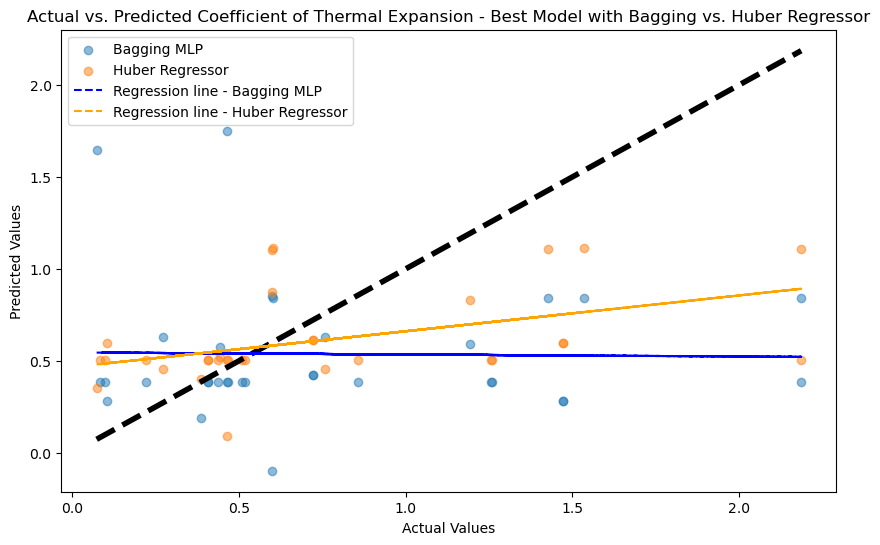

MSE for Huber Regressor: 0.2764058515017319


In [90]:
best_layers = (20, 5)
best_max_iter = 4000
output_dir = 'Images/Nickel/COTE'
target_variable = "Coefficient of Thermal Expansion"
results = compare_bagging_huber(X_train, y_train, X_test, y_test, best_layers, best_max_iter, output_dir, target_variable)
mse_huber = results['mse_huber']
actual = results['actual']
predbag = results['predbag']
predhuber = results['predhuber']
best_model = results['model']
print("MSE for Huber Regressor:", mse_huber)

Spearman's rank correlation coefficient: 0.11347569012767768
P-value of the correlation coefficient: 0.5363256486640862
Plot saved to Images/Nickel/COTE/Nickel_Coefficient_of_Thermal_Expansion_BaggingMLP.png


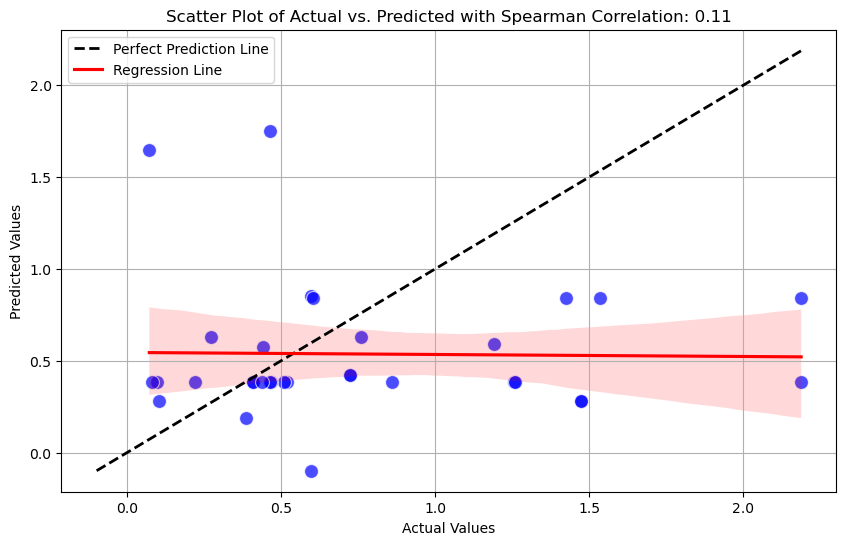

Spearman's rank correlation coefficient: 0.5280836592935
P-value of the correlation coefficient: 0.001892966554369605
Plot saved to Images/Nickel/COTE/Nickel_Coefficient_of_Thermal_Expansion_HuberMLP.png


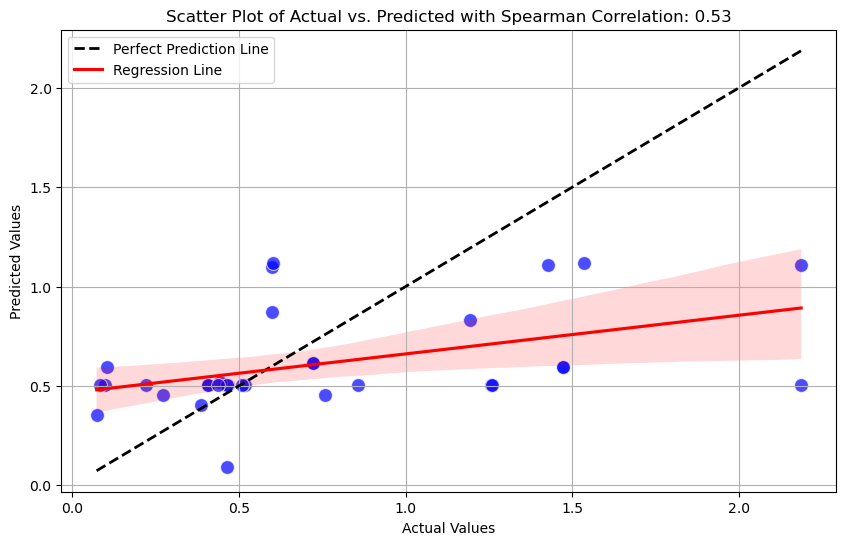

Bagging Model Spearman Correlation: 0.11347569012767768
Huber Model Spearman Correlation: 0.5280836592935


In [91]:
# Example usage of the generalized function
output_dir = 'Images/Nickel/COTE'
actuals = actual  # Example actual values from your test set
preds_bagging = predbag  # Example prediction values from the Bagging model
preds_huber = predhuber  # Example prediction values from the Huber model

# For Bagging MLP
correlation_bagging = show_correlation("Bagging", output_dir, actuals, preds_bagging, "Coefficient of Thermal Expansion")

# For Huber MLP
correlation_huber = show_correlation("Huber", output_dir, actuals, preds_huber, "Coefficient of Thermal Expansion")

print("Bagging Model Spearman Correlation:", correlation_bagging)
print("Huber Model Spearman Correlation:", correlation_huber)

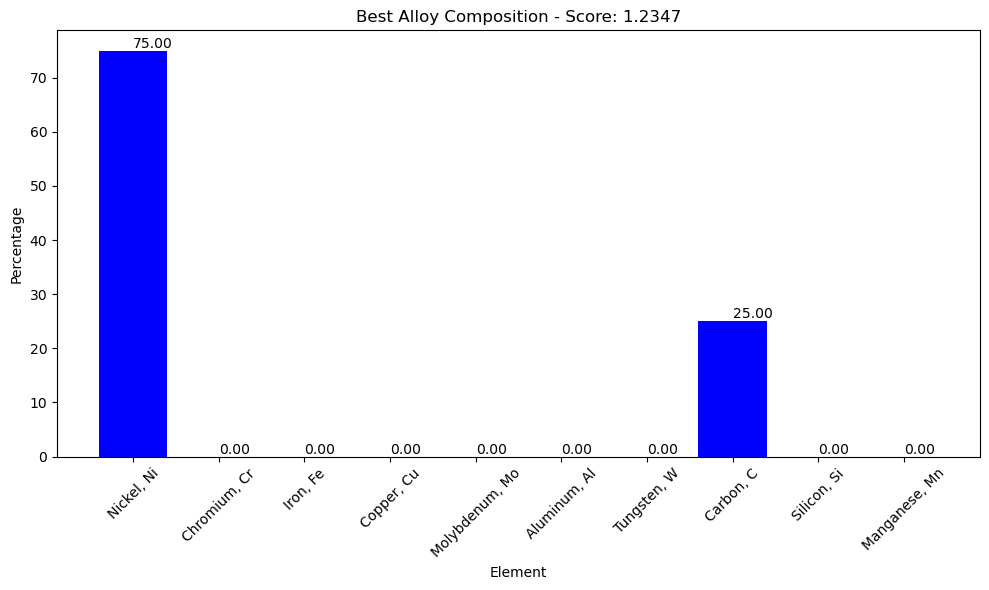

Best Composition: [7.50000000e+01 0.00000000e+00 0.00000000e+00 3.24624216e-14
 4.74314210e-13 0.00000000e+00 6.97170438e-10 2.50000004e+01
 4.94569083e-10 0.00000000e+00]
Best Score: 1.2347405872272055


In [92]:
output_dir = 'Images/Nickel/COTE'
target_property = "Coefficient of Thermal Expansion"
best_composition, best_score = optimize_alloy_composition(X_train, output_dir, target_property, metal)
print("Best Composition:", best_composition)
print("Best Score:", best_score)

## Overall Best Aluminium

In [94]:
# Define target columns
target_columns = ['Young\'s Modulus', 'Yield Strength', 'Tensile Strength', 'Specific Heat', 'Coefficient of Thermal Expansion']

# Define input features
input_features = ['Nickel, Ni', 'Tungsten, W', 'Beryllium, Be', 'Cobalt, Co', 'Niobium, Nb (Columbium, Cb)', 'Manganese, Mn']  # List of input feature columns

# Select input features and targets from the DataFrame
input_data = df[input_features]
targets = df[target_columns]

# Split the data into training, validation, and test sets
train_data, test_data, train_targets, test_targets = train_test_split(input_data, targets, test_size=0.3, random_state=42)
train_data, val_data, train_targets, val_targets = train_test_split(train_data, train_targets, test_size=0.2, random_state=42)

# Output the shapes of each set to confirm the sizes
train_data.shape, val_data.shape, test_data.shape

((89, 6), (23, 6), (48, 6))

In [95]:
# Number of input features
input_dim = train_data.shape[1]

# Create the MLP model
model = Sequential([
    Dense(20, input_dim=input_dim, activation='relu'),  # First hidden layer
    Dense(5, activation='linear'),                       # Second hidden layer
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

No existing model found. Training a new model.
Epoch 1/350
3/3 [==============================] - 1s 162ms/step - loss: 250.2338 - val_loss: 221.8560
Epoch 2/350
3/3 [==============================] - 0s 31ms/step - loss: 234.3725 - val_loss: 207.8885
Epoch 3/350
3/3 [==============================] - 0s 37ms/step - loss: 219.3861 - val_loss: 194.6125
Epoch 4/350
3/3 [==============================] - 0s 34ms/step - loss: 205.4847 - val_loss: 182.0098
Epoch 5/350
3/3 [==============================] - 0s 31ms/step - loss: 191.9650 - val_loss: 170.1325
Epoch 6/350
3/3 [==============================] - 0s 30ms/step - loss: 179.5685 - val_loss: 158.9151
Epoch 7/350
3/3 [==============================] - 0s 31ms/step - loss: 167.5648 - val_loss: 148.4082
Epoch 8/350
3/3 [==============================] - 0s 36ms/step - loss: 156.5338 - val_loss: 138.5478
Epoch 9/350
3/3 [==============================] - 0s 35ms/step - loss: 146.3148 - val_loss: 129.3065
Epoch 10/350
3/3 [================

/Users/lukerickard/opt/anaconda3/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


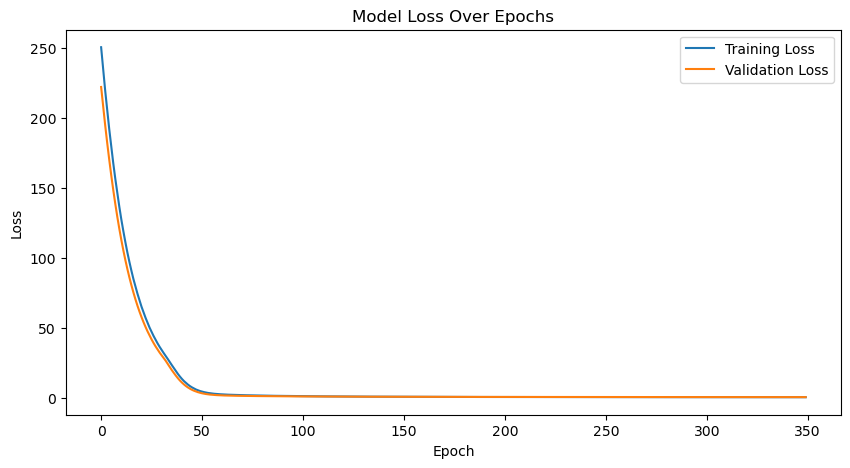

In [96]:
model_path = 'Ni_model_data/Finalmodel.h5'  # Path where the model is saved

# Check if the model file exists
if os.path.exists(model_path):
    print("Model exists. Loading the model...")
    model = load_model(model_path)
    # Optional: Evaluate the model or continue training
else:
    print("No existing model found. Training a new model.")
    # Model training code
    history = model.fit(train_data, train_targets, epochs=350, validation_data=(val_data, val_targets))

    # Save the model after training
    model.save(model_path)
    print("Model saved at:", model_path)

    # Plotting the training and validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss Over Epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

In [97]:
# Assuming df is already defined and includes the necessary properties
min_values = np.array([df['Young\'s Modulus'].min(), df['Yield Strength'].min(), 
                       df['Tensile Strength'].min(), df['Specific Heat'].min(), 
                       df['Coefficient of Thermal Expansion'].min()])
max_values = np.array([df['Young\'s Modulus'].max(), df['Yield Strength'].max(), 
                       df['Tensile Strength'].max(), df['Specific Heat'].max(), 
                       df['Coefficient of Thermal Expansion'].max()])
# Print the minimum and maximum values
print("Minimum Values:", min_values)
print("Maximum Values:", max_values)

def objective_function(composition):
    composition = np.array(composition).reshape(1, -1)
    properties = model.predict(composition, verbose=0).flatten()

    # Normalize each property to the range [0, 1] based on its min and max values
    normalized_properties = (properties - min_values) / (max_values - min_values)

    # Apply weights to the normalized properties
    # Assuming properties are now correctly scaled between 0 and 1
    weighted_score = (normalized_properties[0] +
                      normalized_properties[1] +
                      normalized_properties[2] +
                      normalized_properties[3] +
                      normalized_properties[4])

    # Calculate the diversity penalty to encourage a diverse composition
    diversity_penalty = -np.sum((composition[1:] - np.mean(composition[1:]))**2)

    # The function aims to maximize the score (thus the negative sign for minimization)
    return -(weighted_score + diversity_penalty)

Minimum Values: [0.04600127 0.00697808 0.00989562 0.0500437  0.00932418]
Maximum Values: [3.61225982 3.22567177 3.10026214 4.27063414 4.83116907]


In [98]:
bounds = [(75, 100)] + [(0, 100) for _ in range(1, 6)]
cons = {'type': 'eq', 'fun': lambda x: 100 - np.sum(x)}

results = []
initial_compositions = []
final_compositions = []

for i in range(25):
    initial_composition_random = [75] + [rand()*25 for _ in range(1, 6)]
    initial_composition_random = np.array(initial_composition_random)
    initial_composition_random /= np.sum(initial_composition_random) / 100

    initial_compositions.append(initial_composition_random.copy())

    result_random = minimize(
        objective_function, 
        initial_composition_random, 
        method='SLSQP', 
        bounds=bounds, 
        constraints=cons, 
        options={'disp': True, 'maxiter': 1000}
    )

    if result_random.success:
        final_compositions.append(result_random.x)
        best_score_random = -result_random.fun
        results.append((result_random.x, best_score_random))
    else:
        final_compositions.append(None)

# Save results to a text file
with open('Ni_model_data/alloy_optimization_results.txt', 'w') as f:
    for idx, (composition, score) in enumerate(results):
        f.write(f"Alloy {idx+1}: Composition = {composition}, Score = {score}\n")

# Find the best alloy
best_alloy_index = np.argmax([score for _, score in results])
best_alloy, best_score = results[best_alloy_index]

/Users/lukerickard/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/lukerickard/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Optimization terminated successfully    (Exit mode 0)
            Current function value: -2.4754720663920566
            Iterations: 2
            Function evaluations: 14
            Gradient evaluations: 2
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2.176132387560053
            Iterations: 2
            Function evaluations: 14
            Gradient evaluations: 2
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2.070464449442231
            Iterations: 2
            Function evaluations: 14
            Gradient evaluations: 2
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3.484348126816219
            Iterations: 2
            Function evaluations: 14
            Gradient evaluations: 2
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3.2973526271701448
            Iterations: 2
            Function evaluation

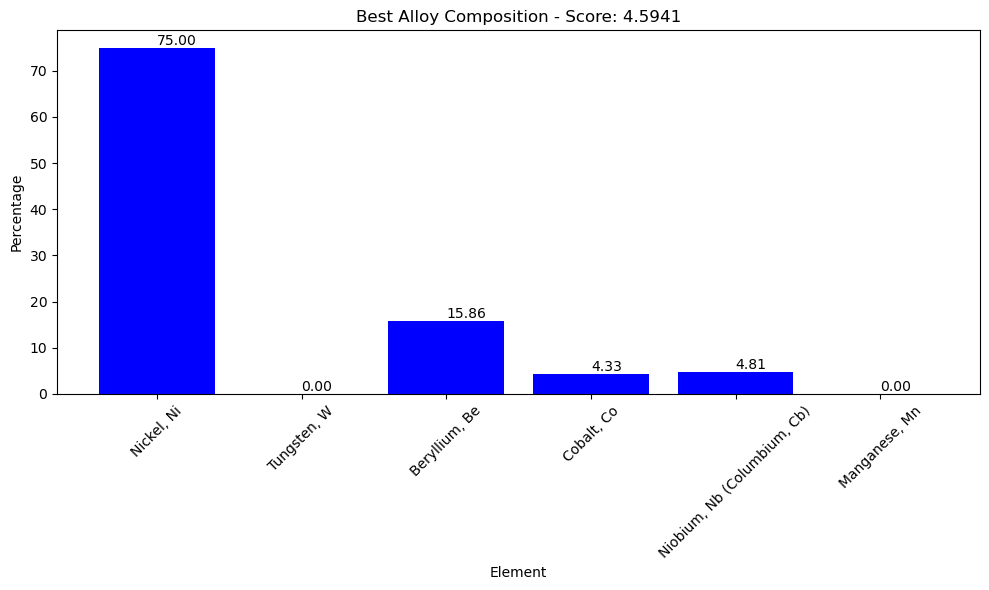

In [99]:
# Assuming we already have the best alloy and its score from the earlier setup
best_alloy_index = np.argmax([score for _, score in results])
best_alloy, best_score = results[best_alloy_index]

# Plot the best alloy composition along with its score
plt.figure(figsize=(10, 6))
bars = plt.bar(input_features, best_alloy, color='blue')
plt.xlabel('Element')
plt.ylabel('Percentage')
plt.title(f'Best Alloy Composition - Score: {best_score:.4f}')
plt.xticks(rotation=45)

# Add the score to each bar in the graph
for bar, percentage in zip(bars, best_alloy):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{percentage:.2f}', va='bottom')  # for composition percentage

plt.tight_layout()
plt.savefig('best_alloy_composition_with_score.png')
plt.show()


Normalized Predictions: [ 2.9415662  1.9210565 -2.7149515 10.499445   7.692517 ]
Min Values Used for Scaling: [0.04600127 0.00697808 0.00989562 0.0500437  0.00932418]
Max Values Used for Scaling: [3.61225982 3.22567177 3.10026214 4.27063414 4.83116907]


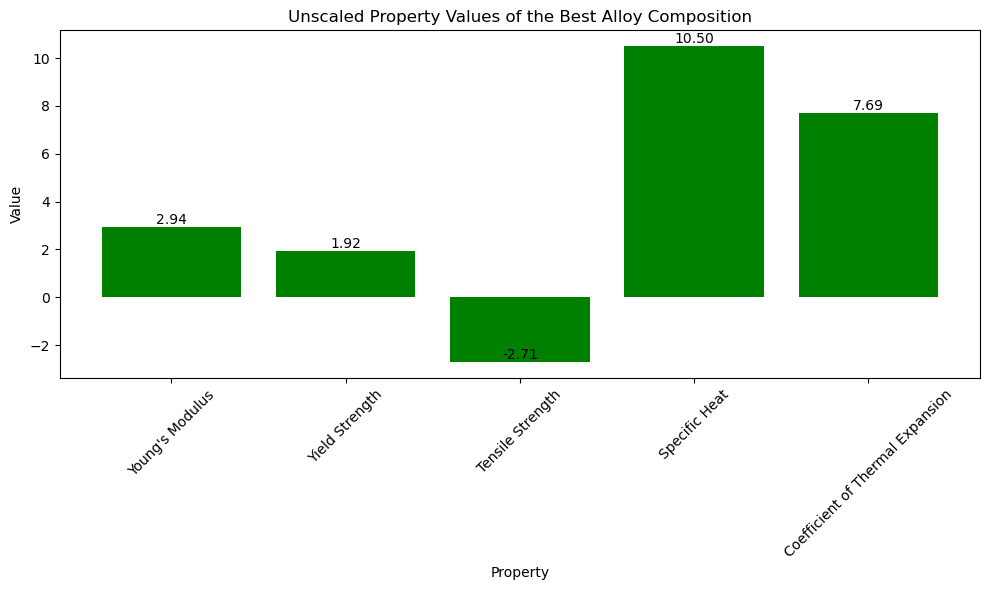

In [100]:
properties_normalized = model.predict(np.array([best_alloy]), verbose=0).flatten()
print("Normalized Predictions:", properties_normalized)  # Check the range of these values

# Print both normalized and actual values for verification
print("Min Values Used for Scaling:", min_values)
print("Max Values Used for Scaling:", max_values)


# Property names corresponding to min_values and max_values
property_names = ['Young\'s Modulus', 'Yield Strength', 'Tensile Strength', 'Specific Heat', 'Coefficient of Thermal Expansion']

# Plot the properties
plt.figure(figsize=(10, 6))
bars = plt.bar(property_names, properties_normalized, color='green')
plt.xlabel('Property')
plt.ylabel('Value')
plt.title('Unscaled Property Values of the Best Alloy Composition')

# Add the actual values to each bar in the graph
for bar, value in zip(bars, properties_normalized):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', va='bottom', ha='center')

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('unscaled_properties_of_best_alloy.png')
plt.show()

In [101]:
bounds = [(0, 100) for _ in range(6)]  # This assumes you have 10 elements total

# Constraint to ensure the total percentage is 100%
constraint = {'type': 'eq', 'fun': lambda x: 100 - np.sum(x)}

results = []
initial_compositions = []
final_compositions = []

# Perform the optimization 200 times with random initial compositions
for i in range(200):
    # Generate random values for each element
    initial_composition_random = np.random.rand(6) * 100
    # Normalize to ensure they sum to 100
    initial_composition_random /= np.sum(initial_composition_random) / 100

    initial_compositions.append(initial_composition_random.copy())

    # Minimize the objective function
    result_random = minimize(
        objective_function, 
        initial_composition_random, 
        method='SLSQP', 
        bounds=bounds, 
        constraints=constraint, 
        options={'disp': True, 'maxiter': 1000}
    )

    # Store the results
    if result_random.success:
        final_compositions.append(result_random.x)
        best_score_random = -result_random.fun
        results.append((result_random.x, best_score_random))
    else:
        final_compositions.append(None)

# Save results to a text file
with open('Ni_model_data/random_alloy_optimization_results2.txt', 'w') as f:
    for idx, (composition, score) in enumerate(results):
        f.write(f"Alloy {idx+1}: Composition = {composition}, Score = {score}\n")

# Find the best performing alloy
best_alloy_index = np.argmax([score for _, score in results])
best_alloy, best_score = results[best_alloy_index]

print(f"Best Alloy Composition: {best_alloy}")
print(f"Best Alloy Score: {best_score}")

Optimization terminated successfully    (Exit mode 0)
            Current function value: -5.163746241786351
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4.189712018310663
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.11745533242487971
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2.433601974993831
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3.9378059432242756
            Iterations: 1
            Function evaluations: 7